<div align="right">Wanchana Ponthongmak<br>
6136168 RADS/D<br>
RADS611 Advance Modeling</div>

# <b> Sentiment Analysis of Three University Hospitals in Thailand by Deep learning

## <b>Introduction

<p style="text-indent: 2.5em;">
    One of the most important elements for businesses is to understand what their customers or clients think about the products or services that they create (customer's voice). The business owner will be able to improve their products and services with more cost-effectiveness. Thanks to the advent of online social networks which has produced online customer expression of the products or services. The sentiment analysis is one way to extract customer opinion.
<p style="text-indent: 2.5em;">
    Sentiment analysis is also known as opinion mining is a field within Natural Language Processing (NLP) which builds systems to identify and extract opinions within sentences. Sentiment analysis is widely applied to the voice of the customer materials such as reviews and survey responses, and social media. For the health care sector, the applications range from marketing to customer service to clinical medicine.
<p style="text-indent: 2.5em;"> 
    This study aims to understand the patient's opinion in three large university hospitals, including Ramathibodi hospital, Siriraj hospital, and Chulalongkorn hospital and use that knowledge to improve hospital services and operations quality. The patient's comments on social media are retrieved, then summarize into two groups, positive, and negative sentiments. The deep learning approaches are used to create models to predict the patient's opinion. The word cloud is used to visualize the positive and negative views of each hospital.

## <b>Methodology

<p style="text-indent: 2.5em;">
The study methodology consists of ten phases, range from web scraping which retrieves patient's comments on social media to word cloud that visualizes the top ten positive and negative opinions of the patient who receives care or interact with a service provided by three large university hospitals in Thailand.

<b>1.  Data Retrieval
<p style="text-indent: 2.5em;">
    The patient's comments with satisfaction scores of three hospitals were retrieved from www.honestdocs.co, the score range from one (low satisfaction) to five (high satisfaction).

<b>2. Data Translation
<p style="text-indent: 2.5em;">
    Since the www.honestdocs.co reviews all Thai's hospitals, most of the comments are written in Thai. In this study, we aim to analyze the document in English. As a result, we used Google cloud translate API to translate Thai's comments into English.

<b>3.  Data Preparation
<p style="text-indent: 2.5em;">
    There are four steps for preparing data,

>   3.1) Deduplication
<p style="text-indent: 5em;"> 
    The duplicated samples will be removed from the data set.

>   3.2) Merging Database
<p style="text-indent: 5em;"> 
    The data from three different sites were merged.

>    3.3) Class Labeling
<p style="text-indent: 5em;"> 
    The comment's score will be transformed into three categories, including negative sentiment, neutral sentiment, and positive sentiment. The neutral sentiment will be excluded from this study as the study aims to discover positive and negative opinions.
   
>    3.4) Class Balancing
<p style="text-indent: 5em;"> 
    The dataset's classes will be balanced by using the number of smallest class as the class balancing number.

<b> 4. Data Splitting 
<p style="text-indent: 2.5em;">
    The dataset was split into three sets, including train set, validate set, and test set with splitting ratio at 60: 20: 20

<b>5.  Data Preprocessing 
<p style="text-indent: 2.5em;">
    The data preprocessing consist of 6 steps including,

>       5.1) Lower Case
<p style="text-indent: 5em;">
    The capital letter will be lower case to the non-capital letter.
  
>       5.2) Word Normalization
<p style="text-indent: 5em;">
    The word such as "I'll", "I'm" will be normalized to the full sentence (I will, and I am).

>       5.3) Word Lemmatization
<p style="text-indent: 5em;">
    The process of grouping the inflected forms of a word so they can be analysed as a single item. for example, "nation", "national", and "nationality" will be arranged into the word "nation".

>       5.4) Punctuation Removal
<p style="text-indent: 5em;">
    All punctuation will be removed.

>       5.5) Stopword Removal
<p style="text-indent: 5em;">
    A stop word is a commonly used word (such as "the", "a", "an", "in") that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. These kinds of words will be removed.

>       5.6) Sequence Padding
<p style="text-indent: 5em;">
    The sequence padding helps input data contains the same length according to the deep learning model requirement.

<b>6.  Pre-trained Embedding 
<p style="text-indent: 2.5em;">
    The word embeddings, also called word vectors, is one of the powerful ways to associate a vector with a word. The word embeddings are learned from data. Sometimes, we have an inadequate number of samples in training data that could not learn an appropriate task-specific embedding of your vocabulary. Instead of learning word embeddings from our data, we could be loading embedding vectors from a pre-trained embedding. In this study, the GloVe (Global Vectors for Word Representation), the popular pre-trained embedding is used to vectorize word in dataset.

<b> 7. Model Experiment 
<p style="text-indent: 2.5em;">
    The model experiment consists of three components, firstly, create a list of hyperparameter combination, secondly, create the model for the experiment, lastly, execute the model.

>       7.1) Hyperparameter Combination
<p style="text-indent: 5em;">
    The list of hyperparameter combination is created in order to perform fine-tune hyperparameters.
  
>       7.2) Model Building
<p style="text-indent: 5em;">
    The sequencing model, such as GRU and LSTM, will be used to build a model structure.

>       7.3) Model Compile
<p style="text-indent: 5em;">
    Run the models then prepare to the evaluation phase.

<b>8. Model Evaluation and Visualization
<p style="text-indent: 2.5em;">
    The model evaluation and visualization are used several matrices to assess model performance, such as accuracy, ROC curve, PR curve. Moreover, the performance of two models (GRU and LSTM models) will be shown in several visualizations, including confusion matric, and line graph.

<b>9. Analysis of Errors
<p style="text-indent: 2.5em;">
    The misclassification cases will be explored further in order to get the trail of errors by  comparing y-predict with y-true of the test set for each model.

<b>10. Word Cloud
<p style="text-indent: 2.5em;">
The top ten most frequent word appear in dataset of each hospitals will be represent in word cloud.

<b>11. Discussions & Suggestions & Limitations

## <b>Get Start

### Required Libraries

In [1]:
## retrieve data (web scraping)
from bs4 import BeautifulSoup as bs
import requests
from google.cloud import translate
import os

## modeling 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
from itertools import product
import keras
from tensorflow import set_random_seed
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import contractions
from keras_tqdm import TQDMNotebookCallback
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GRU, BatchNormalization
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from textblob.np_extractors import ConllExtractor
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from sklearn.externals import joblib

cwd = os.getcwd()
print(cwd)

Using TensorFlow backend.
C:\Users\GL63\Anaconda3\envs\keras-gpu\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


C:\Users\GL63\OneDrive\RADS611


In [2]:
# Set dataframe display
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)

## 1) Data Retrieval and 2) Data Translation

In [3]:
# calling google cloud API to translate Thai's comments to English
# create google credential key for accessing google cloud API
# to used this method you need to register google.cloud then create your own credential key as json file
credential_path = r"data\ID.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

In [4]:
# define URL to download (comments of three university hospital in Thailand)
url_rama = 'https://www.honestdocs.co/hospitals/ramathibodi-hospital'
url_siri = 'https://www.honestdocs.co/hospitals/siriraj-hospital'
url_chula = 'https://www.honestdocs.co/hospitals/king-chulalongkorn-memorial-hospital'

In [5]:
# create def for downloading patient's comment on the website and translate to English
def tran2eng(url):
    # set variables to store comment and score
    comment = []
    score = []
    for i in range(100):
        r = requests.get(url, params=dict(query="web scraping",page=i))
        soup = bs(r.text,'html.parser')
        j = len(soup.find_all('div',{'class':'comments__content'})) # count number of comments
        for i in range(j): 
            comment.append(soup.find_all('div',{'class':'comments__content'})[i].get_text())
            score.append(soup.find_all('span',{'class':'stars star-rating'})[i].attrs['data-score'])
            i +=1
        i +=1
        if len(soup.find_all('div',{'class':'comments__content'})) <= 0:
            break       
    df = pd.DataFrame({'comment': comment, 'score' : score})  
    # Instantiates a client
    translator = translate.Client()
    # translate Thai to English
    df['en_com'] = df['comment'].apply(translator.translate, target_language='en').apply(lambda x : x['translatedText'])
    return df

In [ ]:
#### download and translate comment into the dataset
rama = tran2eng(url_rama)
siri = tran2eng(url_siri)
chula = tran2eng(url_chula)

In [ ]:
#### export data set
rama.to_csv(r"data\rama.csv", sep=';', index=False, encoding='utf-8', chunksize=100)
siri.to_csv(r"data\siri.csv", sep=';', index=False, encoding='utf-8', chunksize=100)
chula.to_csv(r"data\chula.csv", sep=';', index=False, encoding='utf-8', chunksize=100)

In [6]:
#### import data set 
    # help to reduce time to complie tran2eng def
rama = pd.read_csv(r"data\rama.csv", sep = ';')
siri = pd.read_csv(r"data\siri.csv", sep = ';')
chula = pd.read_csv(r"data\chula.csv", sep = ';')

#### explore how the data look like

In [7]:
rama.head()

,comment,score,en_com
0,\n ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีผลค้างเคียงอะไรและราคาก็ถูกดีด้วย ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ เพราะมีการหยอดยาชาก่อนผ่า \n,4,"I used to go to LASIK here. Very good. Now, it has been 2 years since it has no outstanding results and the price is also good. The cut may look scary. But when it was really time to do it, it didn&#39;t hurt. Because there was a drop of anesthetic before dissection"
1,\nรักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญาตรีแล้ว ตั้งแต่นอนแอดมิดที่ รพ จนหายดีออกมาใช้ชีวิตได้เป็นปกติ โดยเฉพาะคลินิกพรีเมี่ยม ไม่ต้องรอนาน มีความสะดวกรวดเร็วทุกขั้นตอนตั้งแต่จ่ายเงินไปถึงจ่ายยา ค่ารักษาไม่ได้แพงเกินไปเมื่อเทียบเท่ากับเอกชนหลายๆที่ บริการดีมากๆ คุณหมอดูแลเอาใจใส่ดี อยากให้ทุกคนมารักษาที่นี่\n,5,"Maintained for many years since the age of 14 Will now have a bachelor&#39;s degree From sleeping in the midst of the arthropod until he recovered, he could live a normal life. In particular, premium clinics do not have to wait for a long time. There are convenient, fast, every step from paying to dispensing. The treatment fee is not too expensive when compared to many private services that are very good. Want everyone to come here"
2,\nที่ตึกพระเทพชั้น 2 สถานที่เครื่องมือดูทันสมัย \rแต่ที่ห้องวัดความดัน มีคนที่วัด(คิดว่าไม่ใช่พยาบาลเพราะใส่ชุดสีม่วง) ชอบดุคนที่มาวัด พูดเสียงแข็งใส่คนที่มาวัดความดัน ทั้งๆที่พยาบาลอีกคนที่ใส่ชุดพยาบาลพูดเพราะ อยากให้ปรับปรุง \r มาหาหมอที่แผนกศัลยกรรม อาจารย์หมอตรวตแล้วบอกต้องผ่าตัด บอกแค่ว่าต้องผ่าตัดถึงจะหายตอนนั้นช็อคเรื่องผ่าตัดอยู่เลยไม่ได้ถามอะไรเลย แล้วหมอกก็ไปเลยไม่ได้บอกว่าจริงๆเป็นอะไร ระยะไหน (ริดสีดวง) แล้วก็นัดวันผ่า พยาบาลที่นัดคิวก็ไม่สนเวลาเราทวนสิ่งที่บอกมาว่าถูกต้องไหม บอกแค่ว่าตามนั้นแหละ สรุปแล้วเหมือนจะดีแต่รอดูช่วงผ่าตัดก่อน\n,3,"At the 2nd floor of Phra Thep building, the place looks modern. But at the pressure measuring room There are people at the temple (thinking that it&#39;s not a nurse because wearing a purple dress) likes to scold people who come to the temple. Speak stiffly to people who come to measure pressure. In spite of the other nurses who put on a nursing gown, said because Want to improve Come to the doctor at the surgery department Dr. Tawut, then told to have surgery. Just saying that he had to surgery to be healed at that time, he was shocked about the surgery. And the fog went, not really telling what was the distance (Roi-Laem) and then meeting The nurse at Nuek Kyu doesn&#39;t care when we repeat what he says is correct. Just saying that In conclusion, it seems to be good, but waiting to see the surgery before"
3,\n ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีผลค้างเคียงอะไรและราคาก็ถูกดีด้วย ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ เพราะมีการหยอดยาชาก่อนผ่า \n,4,"I used to go to LASIK here. Very good. Now, it has been 2 years since it has no outstanding results and the price is also good. The cut may look scary. But when it was really time to do it, it didn&#39;t hurt. Because there was a drop of anesthetic before dissection"
4,\nรักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญาตรีแล้ว ตั้งแต่นอนแอดมิดที่ รพ จนหายดีออกมาใช้ชีวิตได้เป็นปกติ โดยเฉพาะคลินิกพรีเมี่ยม ไม่ต้องรอนาน มีความสะดวกรวดเร็วทุกขั้นตอนตั้งแต่จ่ายเงินไปถึงจ่ายยา ค่ารักษาไม่ได้แพงเกินไปเมื่อเทียบเท่ากับเอกชนหลายๆที่ บริการดีมากๆ คุณหมอดูแลเอาใจใส่ดี อยากให้ทุกคนมารักษาที่นี่\n,5,"Maintained for many years since the age of 14 Will now have a bachelor&#39;s degree From sleeping in the midst of the arthropod until he recovered, he could live a normal life. In particular, premium clinics do not have to wait for a long time. There are convenient, fast, every step from paying to dispensing. The treatment fee is not too expensive when compared to many private services that are very good. Want everyone to come here"


In [8]:
siri.head()

,comment,score,en_com
0,\nเป็นโรงพยาบาลที่ดีมากๆคะเคยรักษาเนื้องอกที่มดลูกพยาบาลเอาใจใส่คนไข้มากๆๆถึงมากที่สุดนอนห้องรวมเหมือนห้องพิเศษเลยคะอยู่ใกล้ชิดพยาบาลตลอดเวลาพยาบาลถามอาการทุกๆ1ชม.ห้องน้ำ เตียงนอน อาหารการกินเค้าดูแลเราเหมือนญาติจริงๆนะคะอาบน้ำเช็ดตัวขอปรบมือให้พยาบาลทุกๆคนจริงๆคะไม่ผิดหวังเลยคะที่เข้ารักษาตัวที่รพ.นี้นะคะประทับใจมากๆคะอยากรักษาที่ศิริราชต่อไปคะขอบคุณคะ\n,5,"It is a very good hospital. I used to treat tumors in the uterus. The nurse is very patient. The most up to date sleeping room is like a special room. Stay close to the nurse all the time. Take care of us like a real relative. Take a shower. Wipe yourself. I applaud for every nurse. Really, not disappointed at being treated at this hospital. Very impressed. I want to treat Sirirat. Thank you to the punch"
1,\nรพ.ศิริราช คุณหมอและพยาบาลน่ารักมากค่ะ ให้คำแนะนำเกี่ยวกับฌรคดีมาก พาลูกไปตรวจตามนัดคุณหมอให้คำอธิบายดีทุกครั้ง ขั้นตอนการตรวจไม่ยุ่งยากห้องรับยาแยกเป็นสัดส่วน เจ้าหน้าที่ห้องยาให้คำอธิบายยาดี ถึงแม้เวลาเดินทางไป รพ.จะไกลแต่ก็ไม่เหนื่อยค่ะกลับมาสบายใจทุกครั้งคุณหมออธิบายแนวทางการรักษาดีมากไม่ต้องกังวลเรื่องโรค\n,5,"Siriraj Hospital, doctor and nurse are very cute. Give much advice about the case Take the child to check by appointment. The doctor gives a good explanation every time. Check procedure is not complicated, the room is separated separately. Drug room staff gave a good drug description Even when traveling The hospital will be far away, but not tired. Come back and feel comfortable every time. The doctor explains the treatment method very well. No need to worry about the disease."
2,\nพาคุณย่าไปรักษาโรคมะเร็ง บริการดี รวดเร็วเป็นกันเอง น่ารักมากเลยค่ะ จากคุณย่าหมอ\rบอกเป็นมะเร็งเต้านมระยะสุดท้ายอยู่ได้อีกไม่นานต้องนอนติดเตียงร้องเจ็บตลอดบอกทรมาร พาย่าไปให้คีโม พาไปรักษาหมอให้ยามาทานเรื่อยๆ จนตอนนี้ย่าดีขึ้นเรื่อยๆแล้วค่ะ จากที่เป็นตอนนั้นตอนนี้ผ่านมา2ปีแล้วค่ะ ย่าแข็งแรง เดินได้ กินได้ปกติจนถึงวันนี้เลย เพราะมีหมอและการให้บริการที่ดีจากทางโรงพยาบาล\n,5,"Take Grandma to cure cancer, good service, fast, friendly Very cute. From Grandma, the doctor told me that her breast cancer could last for a long time. Paya went to chemo. Take to treat the doctor, give medicine to eat continuously Until now, my grandmother is getting better From that moment, now, 2 years ago Because there is a doctor and good service from the hospital"
3,\nเป็นโรงพยาบาลที่ดีมากๆคะเคยรักษาเนื้องอกที่มดลูกพยาบาลเอาใจใส่คนไข้มากๆๆถึงมากที่สุดนอนห้องรวมเหมือนห้องพิเศษเลยคะอยู่ใกล้ชิดพยาบาลตลอดเวลาพยาบาลถามอาการทุกๆ1ชม.ห้องน้ำ เตียงนอน อาหารการกินเค้าดูแลเราเหมือนญาติจริงๆนะคะอาบน้ำเช็ดตัวขอปรบมือให้พยาบาลทุกๆคนจริงๆคะไม่ผิดหวังเลยคะที่เข้ารักษาตัวที่รพ.นี้นะคะประทับใจมากๆคะอยากรักษาที่ศิริราชต่อไปคะขอบคุณคะ\n,5,"It is a very good hospital. I used to treat tumors in the uterus. The nurse is very patient. The most up to date sleeping room is like a special room. Stay close to the nurse all the time. Take care of us like a real relative. Take a shower. Wipe yourself. I applaud for every nurse. Really, not disappointed at being treated at this hospital. Very impressed. I want to treat Sirirat. Thank you to the punch"
4,\nรพ.ศิริราช คุณหมอและพยาบาลน่ารักมากค่ะ ให้คำแนะนำเกี่ยวกับฌรคดีมาก พาลูกไปตรวจตามนัดคุณหมอให้คำอธิบายดีทุกครั้ง ขั้นตอนการตรวจไม่ยุ่งยากห้องรับยาแยกเป็นสัดส่วน เจ้าหน้าที่ห้องยาให้คำอธิบายยาดี ถึงแม้เวลาเดินทางไป รพ.จะไกลแต่ก็ไม่เหนื่อยค่ะกลับมาสบายใจทุกครั้งคุณหมออธิบายแนวทางการรักษาดีมากไม่ต้องกังวลเรื่องโรค\n,5,"Siriraj Hospital, doctor and nurse are very cute. Give much advice about the case Take the child to check by appointment. The doctor gives a good explanation every time. Check procedure is not complicated, the room is separated separately. Drug room staff gave a good drug description Even when traveling The hospital will be far away, but not tired. Come back and feel comfortable every time. The doctor explains the treatment method very well. No need to worry about the disease."


In [9]:
chula.head()

,comment,score,en_com
0,\nบริการค่อยข้างดีค่ะ แต่รอคิวนานนิดหน่อย แต่วินิจฉัยผลแม่นยำ เจ็บป่วยไปรพ. จุฬาทีไร หายทุกครั้งค่ะ แถมราคาไม่แพงด้วยค่ะ เหมาะกับเด็กต่างจังหวัดที่เข้ามาอาศัยในกรุงเทพได้มากเลยค่ะ ตอนแรกหนูก็กังวลว่าจะแพง\rอาหารที่จำหน่ายก็อนามัยมากค่ะ มีปริมาณและจำนวนแคลอรี่บอกด้วย รสชาติค่อนข้างดีค่ะ ไม่จัดจ้านจนเกินไป แอร์หนาวมาก55555555555 \n,5,"Service is good. But wait for a long time But accurate diagnosis Ill go to the hospital Chulalongkorn, which is lost every time Plus not too expensive Suitable for provincial children who come to live in Bangkok a lot. At first I was worried that it would be expensive. Food sold is very hygienic. With the amount and amount of calories said The taste is quite good. Not too bold Very cold air 55555555555"
1,\nได้มีอาการอาหารเป็นพิษและเข้าทำการรักษาที่โรงพยาบาบแห่งนี้ ทางคุณหมอแลัพยาบาลดูแลดีมาก พร้อมกับแนะนำการรักษาเบื้องต้น โดยที่ทางผมนั้นได้ปฏิบัติตามคำแนะนำของคุณหมอแบะทานยาควบคู่กับที่คุณหมอได้แจ้งไว้ ใช้เวลาไม่ถึง 2 วัน อาการอาหารเป็นพิษก็หายเป็นปลิดทิ้ง ต้องขอบคุณทางโรงพยาบาลที่ช่วยดูแลมากแบบนี้ครับ\n,5,Have food poisoning and take treatment at this hospital The doctor is very good. Along with the introduction of primary treatment By which I followed the instructions of the doctor and took the medicine along with the doctor informed It takes less than 2 days. The food poisoning has disappeared. Thanks to the hospital that helps take care of this.
2,\nมีบริการดีในระดับนึงเลยครับ เรยไปอยู่หลายครั้ง ประทับใจทุกครั้งครับ พอถึงคิวตรวจ เข้าไปคุยกับคุณหมอ ตอนแรกก็ไม่รู้อาการว่าตัวเองเป็นโรคอะไรเพราะปกติจะมีอาการแบบโรคกระเพาะมักจะนึกว่าตนเองเป็นโรคกระเพาะตลอด พอมาตรวจกับคุณหมอจึงรู้เลยว่าตัวเองเป็นโรคเกี่ยวกับลำไส้ คุณหมอเก่งมากรักษาถูกจุด อาการก็ดีขึ้นเรื่อยๆ\n,5,"There is a good service at a certain level. Many times Impressed every time. When the queue was checked, went to talk to the doctor. At first I didn&#39;t know what the disease was because I had a stomach ulcer. I usually thought I had gastritis all the time. When he came to check with the doctor, he knew that he was a bowel disease. The doctor is very good at keeping the point. The condition is getting better."
3,\nบริการค่อยข้างดีค่ะ แต่รอคิวนานนิดหน่อย แต่วินิจฉัยผลแม่นยำ เจ็บป่วยไปรพ. จุฬาทีไร หายทุกครั้งค่ะ แถมราคาไม่แพงด้วยค่ะ เหมาะกับเด็กต่างจังหวัดที่เข้ามาอาศัยในกรุงเทพได้มากเลยค่ะ ตอนแรกหนูก็กังวลว่าจะแพง\rอาหารที่จำหน่ายก็อนามัยมากค่ะ มีปริมาณและจำนวนแคลอรี่บอกด้วย รสชาติค่อนข้างดีค่ะ ไม่จัดจ้านจนเกินไป แอร์หนาวมาก55555555555 \n,5,"Service is good. But wait for a long time But accurate diagnosis Ill go to the hospital Chulalongkorn, which is lost every time Plus not too expensive Suitable for provincial children who come to live in Bangkok a lot. At first I was worried that it would be expensive. Food sold is very hygienic. With the amount and amount of calories said The taste is quite good. Not too bold Very cold air 55555555555"
4,\nได้มีอาการอาหารเป็นพิษและเข้าทำการรักษาที่โรงพยาบาบแห่งนี้ ทางคุณหมอแลัพยาบาลดูแลดีมาก พร้อมกับแนะนำการรักษาเบื้องต้น โดยที่ทางผมนั้นได้ปฏิบัติตามคำแนะนำของคุณหมอแบะทานยาควบคู่กับที่คุณหมอได้แจ้งไว้ ใช้เวลาไม่ถึง 2 วัน อาการอาหารเป็นพิษก็หายเป็นปลิดทิ้ง ต้องขอบคุณทางโรงพยาบาลที่ช่วยดูแลมากแบบนี้ครับ\n,5,Have food poisoning and take treatment at this hospital The doctor is very good. Along with the introduction of primary treatment By which I followed the instructions of the doctor and took the medicine along with the doctor informed It takes less than 2 days. The food poisoning has disappeared. Thanks to the hospital that helps take care of this.


## 3) Data Preparation

### 3.1 Deduplication

##### Ramathibodi Hopsital dataset

In [10]:
rama.isnull().sum()

comment    0
score      0
en_com     0
dtype: int64

In [11]:
rama.shape

(226, 3)

In [12]:
rama = rama.drop_duplicates()

In [13]:
rama.shape

(221, 3)

In [14]:
print('There are 5 duplicated samples were removed')

There are 5 duplicated samples were removed


##### Siriraj Hopsital dataset

In [15]:
siri.isnull().sum()

comment    0
score      0
en_com     0
dtype: int64

In [16]:
siri.shape

(133, 3)

In [17]:
siri = siri.drop_duplicates()

In [18]:
siri.shape

(130, 3)

In [19]:
print('There are 3 duplicated samples were removed')

There are 3 duplicated samples were removed


##### Chulalongkorn Hopsital dataset

In [20]:
chula.isnull().sum()

comment    0
score      0
en_com     0
dtype: int64

In [21]:
chula.shape

(300, 3)

In [22]:
chula = chula.drop_duplicates()

In [23]:
chula.shape

(297, 3)

In [24]:
print('There are 3 duplicated samples were removed')

There are 3 duplicated samples were removed


### 3.2 Merging Database

In [25]:
df = pd.concat([rama, siri, chula])

In [26]:
df['score'] = pd.to_numeric(df['score'])

In [27]:
df.head()

,comment,score,en_com
0,\n ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีผลค้างเคียงอะไรและราคาก็ถูกดีด้วย ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ เพราะมีการหยอดยาชาก่อนผ่า \n,4,"I used to go to LASIK here. Very good. Now, it has been 2 years since it has no outstanding results and the price is also good. The cut may look scary. But when it was really time to do it, it didn&#39;t hurt. Because there was a drop of anesthetic before dissection"
1,\nรักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญาตรีแล้ว ตั้งแต่นอนแอดมิดที่ รพ จนหายดีออกมาใช้ชีวิตได้เป็นปกติ โดยเฉพาะคลินิกพรีเมี่ยม ไม่ต้องรอนาน มีความสะดวกรวดเร็วทุกขั้นตอนตั้งแต่จ่ายเงินไปถึงจ่ายยา ค่ารักษาไม่ได้แพงเกินไปเมื่อเทียบเท่ากับเอกชนหลายๆที่ บริการดีมากๆ คุณหมอดูแลเอาใจใส่ดี อยากให้ทุกคนมารักษาที่นี่\n,5,"Maintained for many years since the age of 14 Will now have a bachelor&#39;s degree From sleeping in the midst of the arthropod until he recovered, he could live a normal life. In particular, premium clinics do not have to wait for a long time. There are convenient, fast, every step from paying to dispensing. The treatment fee is not too expensive when compared to many private services that are very good. Want everyone to come here"
2,\nที่ตึกพระเทพชั้น 2 สถานที่เครื่องมือดูทันสมัย \rแต่ที่ห้องวัดความดัน มีคนที่วัด(คิดว่าไม่ใช่พยาบาลเพราะใส่ชุดสีม่วง) ชอบดุคนที่มาวัด พูดเสียงแข็งใส่คนที่มาวัดความดัน ทั้งๆที่พยาบาลอีกคนที่ใส่ชุดพยาบาลพูดเพราะ อยากให้ปรับปรุง \r มาหาหมอที่แผนกศัลยกรรม อาจารย์หมอตรวตแล้วบอกต้องผ่าตัด บอกแค่ว่าต้องผ่าตัดถึงจะหายตอนนั้นช็อคเรื่องผ่าตัดอยู่เลยไม่ได้ถามอะไรเลย แล้วหมอกก็ไปเลยไม่ได้บอกว่าจริงๆเป็นอะไร ระยะไหน (ริดสีดวง) แล้วก็นัดวันผ่า พยาบาลที่นัดคิวก็ไม่สนเวลาเราทวนสิ่งที่บอกมาว่าถูกต้องไหม บอกแค่ว่าตามนั้นแหละ สรุปแล้วเหมือนจะดีแต่รอดูช่วงผ่าตัดก่อน\n,3,"At the 2nd floor of Phra Thep building, the place looks modern. But at the pressure measuring room There are people at the temple (thinking that it&#39;s not a nurse because wearing a purple dress) likes to scold people who come to the temple. Speak stiffly to people who come to measure pressure. In spite of the other nurses who put on a nursing gown, said because Want to improve Come to the doctor at the surgery department Dr. Tawut, then told to have surgery. Just saying that he had to surgery to be healed at that time, he was shocked about the surgery. And the fog went, not really telling what was the distance (Roi-Laem) and then meeting The nurse at Nuek Kyu doesn&#39;t care when we repeat what he says is correct. Just saying that In conclusion, it seems to be good, but waiting to see the surgery before"
6,"\nIts a public hospital so service is bad (nurses are completely unfriendly and doctors have god complex plus horrifying bed side manner) but they will keep you alive (nothing to do with quality of life) with decent drug collection. Young doctors are generally very friendly but they are busy all the time due to the amount of patients (like canned tuna) so don't expect them to spend too much time diagnosing you. You have to come early in the morning to ensure you're in queue and the wait 1-2 (bad days) hours behind schedule to get to see the doctor for < 15 min or less (all together door to door 8-9hrs). \r Additionally you can call all the 8 numbers on the websites from normal clinic to Premium and wait 15 minutes on each number just for them to hang up on you or divert you elsewhere then hang up on you.....\r Worst are the guys doing the schedule because they are very consistent in demonstrating the inability to manage schedules (or not) because you will ""always"" have to wait 1-2 hours ""after"" your appointment schedule to see the doctor but they also cant tell you that so you cant go anywhere and have to hang around the front door. \r In the better days you will get to sit inside the doctor's room to wait because the doctor is no where to be found and nobody will know when he/she will come back. If you ask the nurse they will give yo

### 3.3 Class Labeling

In [28]:
# convert sentiment type
# less than 3 is a negative sentiment = 0
df.loc[df['score'] < 3, 'sentiment'] = 0
# equal to 3 is a neutral sentiment, this group will not be used to build the model
df.loc[df['score'] == 3, 'sentiment'] = 'nan'
# more than 3 is a positive sentiment = 1
df.loc[df['score'] > 3, 'sentiment'] = 1

In [29]:
df.head()

,comment,score,en_com,sentiment
0,\n ผมเคยไปทำเลสิกที่นี้ ดีมากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีผลค้างเคียงอะไรและราคาก็ถูกดีด้วย ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ เพราะมีการหยอดยาชาก่อนผ่า \n,4,"I used to go to LASIK here. Very good. Now, it has been 2 years since it has no outstanding results and the price is also good. The cut may look scary. But when it was really time to do it, it didn&#39;t hurt. Because there was a drop of anesthetic before dissection",1
1,\nรักษามาหลายปีแล้วตั้งแต่อายุ14 ตอนนี้จะจบปริญญาตรีแล้ว ตั้งแต่นอนแอดมิดที่ รพ จนหายดีออกมาใช้ชีวิตได้เป็นปกติ โดยเฉพาะคลินิกพรีเมี่ยม ไม่ต้องรอนาน มีความสะดวกรวดเร็วทุกขั้นตอนตั้งแต่จ่ายเงินไปถึงจ่ายยา ค่ารักษาไม่ได้แพงเกินไปเมื่อเทียบเท่ากับเอกชนหลายๆที่ บริการดีมากๆ คุณหมอดูแลเอาใจใส่ดี อยากให้ทุกคนมารักษาที่นี่\n,5,"Maintained for many years since the age of 14 Will now have a bachelor&#39;s degree From sleeping in the midst of the arthropod until he recovered, he could live a normal life. In particular, premium clinics do not have to wait for a long time. There are convenient, fast, every step from paying to dispensing. The treatment fee is not too expensive when compared to many private services that are very good. Want everyone to come here",1
2,\nที่ตึกพระเทพชั้น 2 สถานที่เครื่องมือดูทันสมัย \rแต่ที่ห้องวัดความดัน มีคนที่วัด(คิดว่าไม่ใช่พยาบาลเพราะใส่ชุดสีม่วง) ชอบดุคนที่มาวัด พูดเสียงแข็งใส่คนที่มาวัดความดัน ทั้งๆที่พยาบาลอีกคนที่ใส่ชุดพยาบาลพูดเพราะ อยากให้ปรับปรุง \r มาหาหมอที่แผนกศัลยกรรม อาจารย์หมอตรวตแล้วบอกต้องผ่าตัด บอกแค่ว่าต้องผ่าตัดถึงจะหายตอนนั้นช็อคเรื่องผ่าตัดอยู่เลยไม่ได้ถามอะไรเลย แล้วหมอกก็ไปเลยไม่ได้บอกว่าจริงๆเป็นอะไร ระยะไหน (ริดสีดวง) แล้วก็นัดวันผ่า พยาบาลที่นัดคิวก็ไม่สนเวลาเราทวนสิ่งที่บอกมาว่าถูกต้องไหม บอกแค่ว่าตามนั้นแหละ สรุปแล้วเหมือนจะดีแต่รอดูช่วงผ่าตัดก่อน\n,3,"At the 2nd floor of Phra Thep building, the place looks modern. But at the pressure measuring room There are people at the temple (thinking that it&#39;s not a nurse because wearing a purple dress) likes to scold people who come to the temple. Speak stiffly to people who come to measure pressure. In spite of the other nurses who put on a nursing gown, said because Want to improve Come to the doctor at the surgery department Dr. Tawut, then told to have surgery. Just saying that he had to surgery to be healed at that time, he was shocked about the surgery. And the fog went, not really telling what was the distance (Roi-Laem) and then meeting The nurse at Nuek Kyu doesn&#39;t care when we repeat what he says is correct. Just saying that In conclusion, it seems to be good, but waiting to see the surgery before",nan
6,"\nIts a public hospital so service is bad (nurses are completely unfriendly and doctors have god complex plus horrifying bed side manner) but they will keep you alive (nothing to do with quality of life) with decent drug collection. Young doctors are generally very friendly but they are busy all the time due to the amount of patients (like canned tuna) so don't expect them to spend too much time diagnosing you. You have to come early in the morning to ensure you're in queue and the wait 1-2 (bad days) hours behind schedule to get to see the doctor for < 15 min or less (all together door to door 8-9hrs). \r Additionally you can call all the 8 numbers on the websites from normal clinic to Premium and wait 15 minutes on each number just for them to hang up on you or divert you elsewhere then hang up on you.....\r Worst are the guys doing the schedule because they are very consistent in demonstrating the inability to manage schedules (or not) because you will ""always"" have to wait 1-2 hours ""after"" your appointment schedule to see the doctor but they also cant tell you that so you cant go anywhere and have to hang around the front door. \r In the better days you will get to sit inside the doctor's room to wait because the doctor is no where to be found and nobody will know when he/she will come back. If you ask the nurse

### 3.4 Class Balancing

In [30]:
bag_neg = df[df['sentiment'] == 0]
bag_neu = df[df['sentiment'] == 'nan']
bag_pos = df[df['sentiment'] == 1]

#### inspect size of sample in each group

In [31]:
bag_neg.shape

(118, 4)

In [32]:
bag_pos.shape

(474, 4)

In [33]:
# random sampling to balance positive and negative class
bag = []
# using n = number of negative class which is the smallest group
bag.append(bag_neg.sample(n = len(bag_neg), replace = None, random_state = 6))
bag.append(bag_pos.sample(n = len(bag_neg), replace = None, random_state = 6))
samples = pd.concat(bag)
samples = samples.reset_index(drop=True)

In [34]:
samples.head()

,comment,score,en_com,sentiment
0,\nเคยได้ยิน แต่ไม่อยากไป\n,1,Had heard but didn&#39;t want to go,0
1,\nทำฟันฝีมือเยี่ยม คุณหมอ คุณพยาบาลก็มีคุณภาพนี่นา แล้วอะไรที่ไม่ดี แจ้งหัวหน้าเจ้าหน้าทีไปเลยค่ะ\n,1,"Doing good work, visiting the doctor, the nurse is quality. Then what is bad Inform the chief officer",0
2,\nไปตรวจตามนัด แล้วมีอาการใจสั่น หมอเลยให้ไปตรวจคลื่นไฟฟ้าหัวใจ ห้องตรวจอยู่ชั้น 2 แต่กลับต้องไปจ่ายเงินค่าทำที่การเงินชั้น 1 ก่อน จากนั้นกลับมาชั้น 2 พยาบาลก็ค่อยบอกว่าต้องขึ้นไปทำชั้น 3 ไม่เข้าใจว่าทำไม่ไม่ทำให้เรียบร้อย ตรวจให้เสร็จแล้วค่อยไปจ่ายเงินทีเดียว ถ้าเป็นโรคหัวใจจริงคงหัวใจวายตายไปแล้ว\n,2,"Went to check on the appointment and had a palpitation The doctor then went to check the ECG. The examination room is on the second floor, but has to go to pay for the money at the first floor. First, then back to the 2nd floor. Complete the examination and pay for it. If the heart disease is true, the heart attack is dead.",0
3,"\nผ่าคลอดฉุกเฉินเมื่อต.คที่ผ่านมาค่ะพักห้องธรรมดาชั้น5รู้สึกตัดสินใจผิดมากที่เลือกคลอดที่นี่การดูแลของพยาบาลชั้น5แย่มากๆหลายๆอย่างเลยจริงๆ พยาบาลห้องเด็กก็พูดจาไม่ดีเลย ทั้งที่เราคลอดก็ใช้เงินสดค่าผ่า17,800 แถมผ่าแนวตั้งอีกโบราณมากแผลไม่สวยเลยพอวันกลับบ้านหน้าตึกไม่มีแท็กซี่บอกร.ป.ภเขาก็บอกให้เดินออกไปเรียกรถเองคือเดินไกลมากๆ\n",2,"Emergency emergency surgery at the end of the previous period. Stay in the 5th floor of the normal room. It feels very wrong to choose to give birth here. Nursing care of the 5th floor is really bad. The nurses in the children&#39;s room did not speak well. Both we gave birth to 17,800 cash. Free from other vertical cuts, the wound is not beautiful at all. On the day of returning home, the front of the building does not have a taxi. He told the hospital. He told me to walk out and call the car itself.",0
4,\nนางพยาบาลหน่วยคัดกรองศูนย์อุบัติเหตุและเวชศาสตร์ฉุกเฉิน ช่วงเวลา16.00น. วันที่21พ.ย.58 พยาบาลนั่งเล่นแต่มือถือขณะที่ปฏิบัติงาน พอคนไข้มาตรวจอาการชักสีหน้าใส่ ตรวจแบบขอไปที ไม่ถามอาการคนไข้ บอกว่าไม่เป็นอะไรให้ไปรอตรวจที่คลินิกดาวเหลือง แต่พอหมอตรวจบอกว่าติดเชื้อที่ปอด (ระหว่างรอมีชาวต่างชาติพาลูกมาตรวจสื่อสารภาษาอังกฤษไม่ได้ ไม่ยอมเรียกคนอื่นมาคุย จนผู้เป็นแม่เดินออกไปนั่งร้องไห้) ไม่ทราบว่าผู้บริหารของโรงพยาบาลจ้างพยาบาลคนนี้ มาได้อย่างไร เคยดูการทำงานของพยาบาลคนนี้บ้างหรือป่าว เข้าใจว่าคนไข้เยอะ แต่ต้องเข้าใจว่าเป็นงานที่บริการสาธารณะ ในเมื่อเลือกอาชีพนี้แล้วควรทำให้ดีไหม (ถ้าอยากทราบชื่อพยาบาลคนนั้น inboxมาได้)\n,1,"Nurse, screening unit, accident center and emergency medicine 4:00 pm 21 November 2015 Nurse sitting on the phone while working When the patient comes to check for facial seizures Check-up Don&#39;t ask the patient Said that it was nothing to wait for the Yellow Star Clinic But when the doctor said that he had lung infections (While waiting for foreigners to take their children to check in English Refused to call other people to talk Until the mother walked out to sit and cry Understand that many patients But must understand that it is a public service When choosing this career, should you make it better? (If you want to know the name of that nurse inbox)",0


## 4) Data Spliting

In [35]:
X_raw = samples.drop(columns = ['score', 'sentiment'])
y = samples.iloc[:,3]
y = y.astype(int).values

In [36]:
# splitting data using stratify class
def split(X, y, test_size = 0.20):
    Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size = test_size,
                                              random_state = 6, stratify = y)
    return Xtrn, Xtst, ytrn, ytst

In [37]:
# the train test and validate sets ratio is 60 20 20
Xtrn_raw, Xtst_raw, ytrn, ytst = split(X_raw, y, test_size = 0.20)
Xtrn_raw, Xval_raw, ytrn, yval = split(Xtrn_raw, ytrn, test_size = 0.251)

In [38]:
# reset sample index in order to tract back the error
Xtrn_raw = Xtrn_raw.reset_index(drop=True)
Xtst_raw = Xtst_raw.reset_index(drop=True)
Xval_raw = Xval_raw.reset_index(drop=True)

#### check number of sample in each class of each data set (all classes are balance)

##### train set

In [39]:
list(ytrn).count(0)

70

In [40]:
list(ytrn).count(1)

70

##### test set

In [41]:
list(ytst).count(0)

24

In [42]:
list(ytst).count(1)

24

##### validate set

In [43]:
list(yval).count(0)

24

In [44]:
list(yval).count(1)

24

## 5) Data preprocessing

In [45]:
# list of stopword
stopWords = set(stopwords.words('english'))

In [46]:
# show first ten words in the stopword list
pd.DataFrame(stopWords).head(10)

,0
0,through
1,ma
2,yours
3,it's
4,weren
5,aren't
6,here
7,did
8,of
9,most


In [47]:
# show first 10 word in negation handling list (contractions)
pd.DataFrame(list(contractions.contractions_dict)).head(10)

,0
0,ain't
1,aren't
2,can't
3,can't've
4,'cause
5,could've
6,couldn't
7,couldn't've
8,didn't
9,doesn't


### 5.1 Lower Case
### 5.2 Word Normalization
### 5.3 Word Lemmatization
### 5.4 Punctuation Removal
### 5.5 Stopword Removal

In [48]:
## preprocessing
def prep(df):
    # lower case, lower the capital letter
    df['low'] = df['en_com'].astype(str).str.lower()
    # handle abnormal case, change '&#39;' to apostrophe
    df['low'] = df['low'].str.replace("&#39;","'")
    # word normalization (includes apostrophes)
    df['normalize'] = df['low'].apply(lambda x : contractions.fix(x))
    # lemmatization, standardize similar word
    lemmatizer = WordNetLemmatizer()
    df['lemmatization'] = df['normalize'].apply(lambda x : lemmatizer.lemmatize(x))
    # Removing Punctuation
    df['punctuation'] = df['lemmatization'].str.replace('[^\w\s]','')
    # Removing stopword
    df['finalprep'] = df['punctuation'].apply(lambda x : " ".join(x for x in x.split() if x not in stopWords))
    return df['finalprep']

In [49]:
X = prep(X_raw)
Xtrn = prep(Xtrn_raw)
Xtst = prep(Xtst_raw)
Xval = prep(Xval_raw)

### 5.6 Sequence Padding

In [50]:
max_features = 2000 # top nb_words most common words in the dataset
# create number of max word (can be used any number that larger than longest sentence in data set)
max_length = max([len(s.split()) for s in X])
max_length

121

In [51]:
tokenizer = Tokenizer(num_words = max_features, split = ' ')
tokenizer.fit_on_texts(Xtrn)

##### After padding the feature of each data set will be equal to max length by padding 0 in the former features

In [52]:
Xtrn = tokenizer.texts_to_sequences(Xtrn)
Xtrn = pad_sequences(Xtrn, maxlen=max_length)

In [53]:
Xtrn.shape

(140, 121)

In [54]:
Xtrn

array([[   0,    0,    0, ...,  213,   89,   23],
       [   0,    0,    0, ...,    1,  126,   17],
       [   0,    0,    0, ...,    1,   63,  513],
       ...,
       [   0,    0,    0, ..., 1206, 1207,   41],
       [   0,    0,    0, ..., 1209,    5,  387],
       [   0,    0,    0, ...,  501,   24,   23]])

In [55]:
Xtst = tokenizer.texts_to_sequences(Xtst)
Xtst = pad_sequences(Xtst, maxlen=max_length)

In [56]:
Xtst.shape

(48, 121)

In [57]:
Xtst

array([[  0,   0,   0, ...,  25,  48,   3],
       [  0,   0,   0, ...,   1, 160, 160],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 117,  10],
       [  0,   0,   0, ...,  12, 670,  75],
       [  0,   0,   0, ..., 204, 239, 197]])

In [58]:
Xval = tokenizer.texts_to_sequences(Xval)
Xval = pad_sequences(Xval, maxlen=max_length)

In [59]:
Xval.shape

(48, 121)

In [60]:
Xval

array([[  0,   0,   0, ..., 166,   1,   3],
       [  0,   0,   0, ...,   3, 211, 317],
       [  0,   0,   0, ..., 313, 888, 186],
       ...,
       [  0,   0,   0, ...,   0,   0, 888],
       [  0,   0,   0, ..., 540,  44, 534],
       [  0,   0,   0, ...,  40, 394,  68]])

## 6) Pre-trained Embedding

#### Pre-trained embedding for weight matrix (vetorization)

In [61]:
# create vocab size (number of the unique word in the train set)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

1210

In [62]:
# create word embedding index from GloVe 100-Dimensional Word Vectors
# the GloVe 100d file is too big; you need to download via this link "https://www.kaggle.com/terenceliu4444/glove6b100dtxt" and put it in folder data.
embedding_index = {}
f = open(r"data\glove.6B.100d.txt", encoding = 'utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embedding_index[word] = coefs
f.close()

In [63]:
# Create a weight matrix
# set unique word weight according to weight matrix in GloVe 100-Dimensional Word Vectors
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i > vocab_size:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [64]:
embedding_matrix

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [-0.030769,  0.11993 ,  0.53909 , ..., -0.52878 ,  0.17584 ,
         1.065   ],
       [-0.045471, -0.049121, -0.72643 , ..., -0.047243,  0.66042 ,
        -0.54007 ],
       ...,
       [ 0.14858 ,  0.32091 ,  0.15595 , ..., -0.026288,  1.1047  ,
         0.65284 ],
       [-0.61034 ,  0.60236 ,  0.61765 , ..., -0.13958 ,  0.72138 ,
         0.52252 ],
       [-0.99117 , -0.61421 ,  0.63231 , ..., -0.4934  ,  1.0302  ,
        -0.22534 ]])

## 7) Model Experiment

### 7.1 Hyperparameter Combination

In [65]:
# set hyperparameter tuning range
n_hidden = np.array([1, 2])
units = np.array([96, 128])
unitout = np.array([64, 96])
optimizer = ['RMSprop', 'Adam']
batch_size = np.array([32, 64])

In [66]:
# create a list of hyperparameter combination
Hparam = list(product(*[n_hidden, units, unitout, optimizer, batch_size]))

In [67]:
# first ten hyperparameter combination in the list
pd.DataFrame(Hparam).head(10)

,0,1,2,3,4
0,1,96,64,RMSprop,32
1,1,96,64,RMSprop,64
2,1,96,64,Adam,32
3,1,96,64,Adam,64
4,1,96,96,RMSprop,32
5,1,96,96,RMSprop,64
6,1,96,96,Adam,32
7,1,96,96,Adam,64
8,1,128,64,RMSprop,32
9,1,128,64,RMSprop,64


In [68]:
print('The number of hyperparameter combination is ' + str(len(Hparam)))

The number of hyperparameter combination is 32


### 7.2 Model Building

#### 7.2.1 GRU model
<p>
    GRU model comprises of Model, Embedding layer, GRU layer, Output layer, and Complie. The details are shown below,
<p style="text-indent: 2.5em;">
    1) Model using Sequential modeling for text analysis
<p style="text-indent: 2.5em;">
    2) Embedding layer using the pre-trained GloVe 100-D to set wieght of the input
<p style="text-indent: 2.5em;">
    3) GRU layer using for loop to add a number of GRU layer and the last GRU layer is set without return_sequences
<p style="text-indent: 2.5em;">
    4) Output layer using only 1 output node (binary classification problem) and the activation fuction using sigmoid
<p style="text-indent: 2.5em;">
    5) Compile using the binary_crossentropy as loss monitoring and using accuracy metrics 

In [69]:
def GRU_model(n_hidden = 1, units = 1, unitout = 1, optimizer = 'rmsprop'):
    model = Sequential()
    embedding_layer = Embedding(vocab_size, 
                                embedding_dim,
                                embeddings_initializer = Constant(embedding_matrix),
                                input_length = max_length,
                                trainable = False)
    model.add(embedding_layer)
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    for layer in range(n_hidden):
        model.add(GRU(units = int(units), return_sequences = True))
        model.add(Dropout(0.5))
    model.add(GRU(units = int(unitout)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy']) 
    return model

#### 7.2.2 LSTM model
<p>
    LSTM model comprises of Model, Embedding layer, LSTM layer, Output layer, and Complie. The details are shown below,
<p style="text-indent: 2.5em;">
    1) Model using Sequential modeling for text analysis
<p style="text-indent: 2.5em;">
    2) Embedding layer using the pre-trained GloVe 100-D to set wieght of the input
<p style="text-indent: 2.5em;">
    3) LSTM layer using for loop to add a number of LSTM layer and the last LSTM layer is set without return_sequences
<p style="text-indent: 2.5em;">
    4) Output layer using only 1 output node (binary classification problem) and the activation fuction using sigmoid
<p style="text-indent: 2.5em;">
    5) Compile using the binary_crossentropy as loss monitoring and using accuracy metrics 

In [70]:
def LSTM_model(n_hidden = 1, units = 1, unitout = 1, optimizer = 'rmsprop'):
    model = Sequential()
    embedding_layer = Embedding(vocab_size, 
                                embedding_dim,
                                embeddings_initializer = Constant(embedding_matrix),
                                input_length = max_length,
                                trainable = False)
    model.add(embedding_layer)
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    for layer in range(n_hidden):
        model.add(LSTM(units = int(units), return_sequences = True))
        model.add(Dropout(0.5))
    model.add(LSTM(units = int(unitout)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy']) 
    return model

### 7.3 Model Complie

In [71]:
def modeling(modeling):
    # set random seed at 6
    np.random.seed(6)
    set_random_seed(6)
    matrix = pd.DataFrame()
    cal_fact = pd.DataFrame()
    # apply early stop at 10 times validation loss has no improvement larger or smaller than 0.0005
    early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta = 0.0005, restore_best_weights=True, monitor='val_loss')
    for i in tqdm(range(len(Hparam))):   
        model = modeling(n_hidden = Hparam[i][0],
                         units = Hparam[i][1],
                         unitout = Hparam[i][2],
                         optimizer = Hparam[i][3])
        model.save('model.h5')
        checkpoint = keras.callbacks.ModelCheckpoint("model.h5", monitor='val_acc', save_best_only=True)
        # train on 100 epochs and using TQDM to monitor progression (each iteration of Hparam)
        history = model.fit(Xtrn, ytrn, epochs = 200, batch_size = Hparam[i][4],
                            callbacks=[TQDMNotebookCallback(leave_inner=False, leave_outer=False),
                                       checkpoint, early_stopping], verbose = 2,
                                       validation_data=(Xval, yval))
        # criteria for best combination of hyperparameter set using 
        # 1) highest validation accurracy (best performence) and 
        # 2) the smallest difference between validation accurracy and training accurracy (prevent model over or under fit as much as it can be)
        cal_fact = cal_fact.append(pd.concat([pd.Series(history.history['val_acc']), pd.Series(history.history['acc']),
                                              abs(pd.Series(history.history['val_acc']) - pd.Series(history.history['acc']))], axis = 1, ignore_index = True))
        cal_fact2 = cal_fact[(cal_fact[0] == cal_fact[0].max())]
        cal_fact3 = cal_fact2[cal_fact2[2] == cal_fact2[2].min()]
        cal_fact3 = cal_fact3.reset_index(drop=True)

        matrix = matrix.append(pd.concat([pd.Series(i), cal_fact3], axis = 1, ignore_index = True))
    matrix = matrix.reset_index(drop=True)
    # fit best combination of hyperparameter set into the model again in order to save best model
    model_apply = modeling(n_hidden = Hparam[matrix[1].idxmax()][0],
                        units = Hparam[matrix[1].idxmax()][1],
                        unitout = Hparam[matrix[1].idxmax()][2],
                        optimizer = Hparam[matrix[1].idxmax()][3])
    model_apply.save('model_apply.h5')   
    checkpoint = keras.callbacks.ModelCheckpoint("model_apply.h5", monitor='val_acc', save_best_only=True)
    history_apply = model_apply.fit(Xtrn, ytrn, epochs = 200,
                                    batch_size = Hparam[matrix[1].idxmax()][4],
                                    callbacks=[TQDMNotebookCallback(leave_inner=False, leave_outer=False), checkpoint, early_stopping],
                                    verbose = 2, validation_data=(Xval, yval))

    return history_apply, pd.DataFrame(Hparam[matrix[1].idxmax()])

#### Run and Save model

In [79]:
# GRU
start = time.time()
history_gru, Hparam_gru = modeling(GRU_model)
t_gru = time.time() - start

  0%|                                                                                           | 0/32 [00:00<?, ?it/s]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.7220 - acc: 0.5143 - val_loss: 0.6873 - val_acc: 0.6458
Epoch 2/200


 - 1s - loss: 0.6952 - acc: 0.5643 - val_loss: 0.6551 - val_acc: 0.7917
Epoch 3/200


 - 1s - loss: 0.6881 - acc: 0.5929 - val_loss: 0.6626 - val_acc: 0.5833
Epoch 4/200


 - 1s - loss: 0.6453 - acc: 0.6429 - val_loss: 0.6389 - val_acc: 0.6667
Epoch 5/200


 - 1s - loss: 0.6060 - acc: 0.6571 - val_loss: 0.6349 - val_acc: 0.6458
Epoch 6/200


 - 2s - loss: 0.5919 - acc: 0.7071 - val_loss: 0.6175 - val_acc: 0.8125
Epoch 7/200


 - 2s - loss: 0.5889 - acc: 0.6929 - val_loss: 0.6106 - val_acc: 0.8333
Epoch 8/200


 - 1s - loss: 0.5617 - acc: 0.6571 - val_loss: 0.5980 - val_acc: 0.7917
Epoch 9/200


 - 1s - loss: 0.5545 - acc: 0.7286 - val_loss: 0.5901 - val_acc: 0.8333
Epoch 10/200


 - 2s - loss: 0.6161 - acc: 0.7143 - val_loss: 0.5800 - val_acc: 0.8125
Epoch 11/200


 - 2s - loss: 0.5317 - acc: 0.7429 - val_loss: 0.5673 - val_acc: 0.8125
Epoch 12/200


 - 2s - loss: 0.5626 - acc: 0.7429 - val_loss: 0.5691 - val_acc: 0.7917
Epoch 13/200


 - 2s - loss: 0.4271 - acc: 0.8286 - val_loss: 0.5770 - val_acc: 0.7917
Epoch 14/200


 - 2s - loss: 0.5487 - acc: 0.7071 - val_loss: 0.5383 - val_acc: 0.7917
Epoch 15/200


 - 1s - loss: 0.5003 - acc: 0.7429 - val_loss: 0.5325 - val_acc: 0.7917
Epoch 16/200


 - 2s - loss: 0.4369 - acc: 0.8000 - val_loss: 0.5313 - val_acc: 0.8125
Epoch 17/200


 - 2s - loss: 0.4196 - acc: 0.8429 - val_loss: 0.5632 - val_acc: 0.7708
Epoch 18/200


 - 1s - loss: 0.3950 - acc: 0.8143 - val_loss: 0.5393 - val_acc: 0.7917
Epoch 19/200


 - 1s - loss: 0.4772 - acc: 0.7643 - val_loss: 0.5907 - val_acc: 0.7708
Epoch 20/200


 - 1s - loss: 0.4183 - acc: 0.8357 - val_loss: 0.6798 - val_acc: 0.7292
Epoch 21/200


 - 1s - loss: 0.4469 - acc: 0.8143 - val_loss: 0.6227 - val_acc: 0.7708
Epoch 22/200


 - 1s - loss: 0.3356 - acc: 0.8500 - val_loss: 0.5958 - val_acc: 0.7708
Epoch 23/200


 - 1s - loss: 0.3076 - acc: 0.8857 - val_loss: 0.5961 - val_acc: 0.7917
Epoch 24/200


 - 2s - loss: 0.3673 - acc: 0.8500 - val_loss: 0.6567 - val_acc: 0.7500
Epoch 25/200


 - 2s - loss: 0.3699 - acc: 0.8500 - val_loss: 0.6657 - val_acc: 0.7917
Epoch 26/200


 - 1s - loss: 0.3957 - acc: 0.7929 - val_loss: 0.6538 - val_acc: 0.7917


  3%|██▌                                                                                | 1/32 [00:46<24:10, 46.80s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 2s - loss: 0.7442 - acc: 0.5143 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 2/200


 - 1s - loss: 0.6914 - acc: 0.5429 - val_loss: 0.6717 - val_acc: 0.5208
Epoch 3/200


 - 1s - loss: 0.6955 - acc: 0.5714 - val_loss: 0.6581 - val_acc: 0.5417
Epoch 4/200


 - 1s - loss: 0.7062 - acc: 0.5714 - val_loss: 0.6423 - val_acc: 0.6667
Epoch 5/200


 - 1s - loss: 0.6529 - acc: 0.6000 - val_loss: 0.6413 - val_acc: 0.6667
Epoch 6/200


 - 1s - loss: 0.6412 - acc: 0.6500 - val_loss: 0.6333 - val_acc: 0.6042
Epoch 7/200


 - 1s - loss: 0.6175 - acc: 0.6500 - val_loss: 0.6274 - val_acc: 0.7083
Epoch 8/200


 - 1s - loss: 0.6411 - acc: 0.6214 - val_loss: 0.6254 - val_acc: 0.6875
Epoch 9/200


 - 1s - loss: 0.6489 - acc: 0.5786 - val_loss: 0.6225 - val_acc: 0.6875
Epoch 10/200


 - 1s - loss: 0.6570 - acc: 0.6000 - val_loss: 0.6165 - val_acc: 0.6875
Epoch 11/200


 - 1s - loss: 0.6293 - acc: 0.6571 - val_loss: 0.6144 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.5942 - acc: 0.6643 - val_loss: 0.6137 - val_acc: 0.6875
Epoch 13/200


 - 1s - loss: 0.5517 - acc: 0.7429 - val_loss: 0.6173 - val_acc: 0.7292
Epoch 14/200


 - 1s - loss: 0.5896 - acc: 0.6786 - val_loss: 0.6209 - val_acc: 0.7292
Epoch 15/200


 - 1s - loss: 0.5122 - acc: 0.7643 - val_loss: 0.6631 - val_acc: 0.7292
Epoch 16/200


 - 1s - loss: 0.5973 - acc: 0.6857 - val_loss: 0.6446 - val_acc: 0.6875
Epoch 17/200


 - 1s - loss: 0.6135 - acc: 0.7214 - val_loss: 0.6494 - val_acc: 0.6875
Epoch 18/200


 - 1s - loss: 0.5384 - acc: 0.7429 - val_loss: 0.6404 - val_acc: 0.7083
Epoch 19/200


 - 1s - loss: 0.4885 - acc: 0.7786 - val_loss: 0.6100 - val_acc: 0.7500
Epoch 20/200


 - 1s - loss: 0.5068 - acc: 0.7714 - val_loss: 0.6373 - val_acc: 0.7500
Epoch 21/200


 - 1s - loss: 0.5001 - acc: 0.7857 - val_loss: 0.6190 - val_acc: 0.7292
Epoch 22/200


 - 1s - loss: 0.4520 - acc: 0.8071 - val_loss: 0.6173 - val_acc: 0.7500
Epoch 23/200


 - 1s - loss: 0.4628 - acc: 0.7714 - val_loss: 0.6114 - val_acc: 0.7292
Epoch 24/200


 - 1s - loss: 0.4853 - acc: 0.7429 - val_loss: 0.6068 - val_acc: 0.6875
Epoch 25/200


 - 1s - loss: 0.4481 - acc: 0.7929 - val_loss: 0.6239 - val_acc: 0.7292
Epoch 26/200


 - 1s - loss: 0.3922 - acc: 0.8429 - val_loss: 0.6468 - val_acc: 0.7500
Epoch 27/200


 - 1s - loss: 0.3426 - acc: 0.8357 - val_loss: 0.6328 - val_acc: 0.6667
Epoch 28/200


 - 1s - loss: 0.3749 - acc: 0.8714 - val_loss: 0.6353 - val_acc: 0.7500
Epoch 29/200


 - 1s - loss: 0.3714 - acc: 0.8429 - val_loss: 0.6487 - val_acc: 0.7500
Epoch 30/200


 - 1s - loss: 0.4553 - acc: 0.7857 - val_loss: 0.7258 - val_acc: 0.7292
Epoch 31/200


 - 1s - loss: 0.3839 - acc: 0.8571 - val_loss: 0.7042 - val_acc: 0.7500
Epoch 32/200


 - 1s - loss: 0.4151 - acc: 0.8429 - val_loss: 0.6307 - val_acc: 0.7708
Epoch 33/200


 - 1s - loss: 0.3570 - acc: 0.8714 - val_loss: 0.6218 - val_acc: 0.7917
Epoch 34/200


 - 1s - loss: 0.4021 - acc: 0.8357 - val_loss: 0.6318 - val_acc: 0.7708


  6%|█████▏                                                                             | 2/32 [01:21<21:34, 43.13s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.7047 - acc: 0.5571 - val_loss: 0.6554 - val_acc: 0.6042
Epoch 2/200


 - 1s - loss: 0.6598 - acc: 0.6071 - val_loss: 0.6407 - val_acc: 0.6667
Epoch 3/200


 - 1s - loss: 0.7015 - acc: 0.5786 - val_loss: 0.6384 - val_acc: 0.6667
Epoch 4/200


 - 1s - loss: 0.6272 - acc: 0.6571 - val_loss: 0.6432 - val_acc: 0.6458
Epoch 5/200


 - 1s - loss: 0.6772 - acc: 0.6286 - val_loss: 0.6440 - val_acc: 0.6458
Epoch 6/200


 - 1s - loss: 0.5557 - acc: 0.7143 - val_loss: 0.6288 - val_acc: 0.6458
Epoch 7/200


 - 1s - loss: 0.6814 - acc: 0.6286 - val_loss: 0.6192 - val_acc: 0.6458
Epoch 8/200


 - 1s - loss: 0.5805 - acc: 0.7071 - val_loss: 0.6074 - val_acc: 0.7292
Epoch 9/200


 - 1s - loss: 0.5409 - acc: 0.6929 - val_loss: 0.6061 - val_acc: 0.7083
Epoch 10/200


 - 1s - loss: 0.5893 - acc: 0.7429 - val_loss: 0.6239 - val_acc: 0.6667
Epoch 11/200


 - 1s - loss: 0.5312 - acc: 0.7357 - val_loss: 0.6577 - val_acc: 0.6458
Epoch 12/200


 - 1s - loss: 0.4978 - acc: 0.7429 - val_loss: 0.6625 - val_acc: 0.6458
Epoch 13/200


 - 1s - loss: 0.5543 - acc: 0.7429 - val_loss: 0.6262 - val_acc: 0.7292
Epoch 14/200


 - 1s - loss: 0.5601 - acc: 0.6857 - val_loss: 0.6182 - val_acc: 0.7292
Epoch 15/200


 - 1s - loss: 0.4942 - acc: 0.7429 - val_loss: 0.6392 - val_acc: 0.6875
Epoch 16/200


 - 1s - loss: 0.4605 - acc: 0.7929 - val_loss: 0.6671 - val_acc: 0.6875
Epoch 17/200


 - 1s - loss: 0.4817 - acc: 0.7643 - val_loss: 0.7240 - val_acc: 0.6667
Epoch 18/200


 - 1s - loss: 0.4472 - acc: 0.8143 - val_loss: 0.7318 - val_acc: 0.6667
Epoch 19/200


 - 1s - loss: 0.4218 - acc: 0.8214 - val_loss: 0.6696 - val_acc: 0.6667


  9%|███████▊                                                                           | 3/32 [01:53<19:18, 39.94s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 2s - loss: 0.7409 - acc: 0.5643 - val_loss: 0.6910 - val_acc: 0.5833
Epoch 2/200


 - 1s - loss: 0.7148 - acc: 0.5571 - val_loss: 0.6621 - val_acc: 0.5417
Epoch 3/200


 - 1s - loss: 0.6794 - acc: 0.5857 - val_loss: 0.6458 - val_acc: 0.6042
Epoch 4/200


 - 1s - loss: 0.6999 - acc: 0.6000 - val_loss: 0.6333 - val_acc: 0.6250
Epoch 5/200


 - 1s - loss: 0.7032 - acc: 0.6000 - val_loss: 0.6251 - val_acc: 0.6458
Epoch 6/200


 - 1s - loss: 0.6241 - acc: 0.6714 - val_loss: 0.6167 - val_acc: 0.7083
Epoch 7/200


 - 1s - loss: 0.5903 - acc: 0.6857 - val_loss: 0.6083 - val_acc: 0.7083
Epoch 8/200


 - 1s - loss: 0.6194 - acc: 0.6714 - val_loss: 0.6026 - val_acc: 0.6875
Epoch 9/200


 - 1s - loss: 0.6144 - acc: 0.6357 - val_loss: 0.6004 - val_acc: 0.7083
Epoch 10/200


 - 1s - loss: 0.6126 - acc: 0.6357 - val_loss: 0.5980 - val_acc: 0.7292
Epoch 11/200


 - 1s - loss: 0.5757 - acc: 0.7000 - val_loss: 0.5939 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.5819 - acc: 0.6500 - val_loss: 0.5911 - val_acc: 0.7500
Epoch 13/200


 - 1s - loss: 0.6068 - acc: 0.6929 - val_loss: 0.5877 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.5904 - acc: 0.7357 - val_loss: 0.5852 - val_acc: 0.7500
Epoch 15/200


 - 1s - loss: 0.5812 - acc: 0.7000 - val_loss: 0.5850 - val_acc: 0.7500
Epoch 16/200


 - 1s - loss: 0.5382 - acc: 0.7357 - val_loss: 0.5882 - val_acc: 0.7500
Epoch 17/200


 - 1s - loss: 0.5625 - acc: 0.7357 - val_loss: 0.5868 - val_acc: 0.7500
Epoch 18/200


 - 1s - loss: 0.5462 - acc: 0.7429 - val_loss: 0.5874 - val_acc: 0.7292
Epoch 19/200


 - 1s - loss: 0.5182 - acc: 0.7500 - val_loss: 0.5901 - val_acc: 0.7292
Epoch 20/200


 - 1s - loss: 0.5384 - acc: 0.7000 - val_loss: 0.5914 - val_acc: 0.7500
Epoch 21/200


 - 1s - loss: 0.5330 - acc: 0.7214 - val_loss: 0.5878 - val_acc: 0.7917
Epoch 22/200


 - 1s - loss: 0.5106 - acc: 0.7500 - val_loss: 0.5923 - val_acc: 0.7917
Epoch 23/200


 - 1s - loss: 0.4366 - acc: 0.8214 - val_loss: 0.6008 - val_acc: 0.7708
Epoch 24/200


 - 1s - loss: 0.4649 - acc: 0.7643 - val_loss: 0.5960 - val_acc: 0.7708


 12%|██████████▍                                                                        | 4/32 [02:20<16:46, 35.95s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.7894 - acc: 0.4714 - val_loss: 0.6569 - val_acc: 0.6458
Epoch 2/200


 - 1s - loss: 0.7237 - acc: 0.5643 - val_loss: 0.6446 - val_acc: 0.6458
Epoch 3/200


 - 1s - loss: 0.6986 - acc: 0.5714 - val_loss: 0.6278 - val_acc: 0.6458
Epoch 4/200


 - 1s - loss: 0.6041 - acc: 0.6500 - val_loss: 0.6175 - val_acc: 0.6458
Epoch 5/200


 - 1s - loss: 0.6177 - acc: 0.6429 - val_loss: 0.6061 - val_acc: 0.6875
Epoch 6/200


 - 1s - loss: 0.5534 - acc: 0.7786 - val_loss: 0.6063 - val_acc: 0.6875
Epoch 7/200


 - 1s - loss: 0.5727 - acc: 0.7143 - val_loss: 0.6034 - val_acc: 0.7292
Epoch 8/200


 - 1s - loss: 0.6069 - acc: 0.7000 - val_loss: 0.6185 - val_acc: 0.7083
Epoch 9/200


 - 1s - loss: 0.6058 - acc: 0.6857 - val_loss: 0.6020 - val_acc: 0.7500
Epoch 10/200


 - 1s - loss: 0.5797 - acc: 0.6857 - val_loss: 0.6637 - val_acc: 0.6667
Epoch 11/200


 - 1s - loss: 0.5019 - acc: 0.7429 - val_loss: 0.6458 - val_acc: 0.7083
Epoch 12/200


 - 1s - loss: 0.4993 - acc: 0.7286 - val_loss: 0.6185 - val_acc: 0.7292
Epoch 13/200


 - 1s - loss: 0.5228 - acc: 0.7214 - val_loss: 0.6864 - val_acc: 0.6875
Epoch 14/200


 - 1s - loss: 0.4935 - acc: 0.8071 - val_loss: 0.6722 - val_acc: 0.7083
Epoch 15/200


 - 1s - loss: 0.4151 - acc: 0.8214 - val_loss: 0.6544 - val_acc: 0.7083
Epoch 16/200


 - 1s - loss: 0.4728 - acc: 0.8143 - val_loss: 0.6146 - val_acc: 0.7292
Epoch 17/200


 - 1s - loss: 0.4332 - acc: 0.7786 - val_loss: 0.6557 - val_acc: 0.7083
Epoch 18/200


 - 1s - loss: 0.4383 - acc: 0.8143 - val_loss: 0.7393 - val_acc: 0.7083
Epoch 19/200


 - 1s - loss: 0.3991 - acc: 0.8143 - val_loss: 0.6982 - val_acc: 0.6875


 16%|████████████▉                                                                      | 5/32 [02:53<15:44, 34.98s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.7012 - acc: 0.5500 - val_loss: 0.6958 - val_acc: 0.5000
Epoch 2/200


 - 1s - loss: 0.7402 - acc: 0.5214 - val_loss: 0.6767 - val_acc: 0.6250
Epoch 3/200


 - 1s - loss: 0.7395 - acc: 0.5571 - val_loss: 0.6714 - val_acc: 0.5625
Epoch 4/200


 - 1s - loss: 0.6557 - acc: 0.5714 - val_loss: 0.6474 - val_acc: 0.6667
Epoch 5/200


 - 1s - loss: 0.6567 - acc: 0.6143 - val_loss: 0.6350 - val_acc: 0.7292
Epoch 6/200


 - 1s - loss: 0.6092 - acc: 0.6571 - val_loss: 0.6270 - val_acc: 0.7292
Epoch 7/200


 - 1s - loss: 0.5593 - acc: 0.7143 - val_loss: 0.6186 - val_acc: 0.7083
Epoch 8/200


 - 1s - loss: 0.5570 - acc: 0.7071 - val_loss: 0.6244 - val_acc: 0.6875
Epoch 9/200


 - 1s - loss: 0.6129 - acc: 0.6929 - val_loss: 0.6015 - val_acc: 0.6875
Epoch 10/200


 - 1s - loss: 0.5636 - acc: 0.7143 - val_loss: 0.6011 - val_acc: 0.7083
Epoch 11/200


 - 1s - loss: 0.5584 - acc: 0.7071 - val_loss: 0.5949 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.4976 - acc: 0.7357 - val_loss: 0.5920 - val_acc: 0.7292
Epoch 13/200


 - 1s - loss: 0.5048 - acc: 0.7929 - val_loss: 0.5819 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.5702 - acc: 0.7071 - val_loss: 0.6358 - val_acc: 0.7083
Epoch 15/200


 - 1s - loss: 0.5108 - acc: 0.7071 - val_loss: 0.5721 - val_acc: 0.7500
Epoch 16/200


 - 1s - loss: 0.4111 - acc: 0.8214 - val_loss: 0.5921 - val_acc: 0.7292
Epoch 17/200


 - 1s - loss: 0.4990 - acc: 0.7714 - val_loss: 0.5710 - val_acc: 0.7708
Epoch 18/200


 - 1s - loss: 0.4777 - acc: 0.7714 - val_loss: 0.6755 - val_acc: 0.7292
Epoch 19/200


 - 1s - loss: 0.3945 - acc: 0.8143 - val_loss: 0.7391 - val_acc: 0.6458
Epoch 20/200


 - 1s - loss: 0.3789 - acc: 0.8143 - val_loss: 0.5638 - val_acc: 0.7917
Epoch 21/200


 - 1s - loss: 0.4239 - acc: 0.7929 - val_loss: 0.6611 - val_acc: 0.7292
Epoch 22/200


 - 1s - loss: 0.3745 - acc: 0.8214 - val_loss: 0.5741 - val_acc: 0.7708
Epoch 23/200


 - 1s - loss: 0.4643 - acc: 0.7857 - val_loss: 0.7057 - val_acc: 0.7292
Epoch 24/200


 - 1s - loss: 0.3348 - acc: 0.8857 - val_loss: 0.6035 - val_acc: 0.7500
Epoch 25/200


 - 1s - loss: 0.3531 - acc: 0.8500 - val_loss: 0.6307 - val_acc: 0.7708
Epoch 26/200


 - 1s - loss: 0.3474 - acc: 0.8857 - val_loss: 0.5694 - val_acc: 0.7083
Epoch 27/200


 - 1s - loss: 0.3630 - acc: 0.8286 - val_loss: 0.6688 - val_acc: 0.7292
Epoch 28/200


 - 1s - loss: 0.3751 - acc: 0.8357 - val_loss: 0.5954 - val_acc: 0.7500
Epoch 29/200


 - 1s - loss: 0.3206 - acc: 0.8429 - val_loss: 0.5592 - val_acc: 0.7708
Epoch 30/200


 - 1s - loss: 0.3391 - acc: 0.8429 - val_loss: 1.0064 - val_acc: 0.7292
Epoch 31/200


 - 1s - loss: 0.4180 - acc: 0.8071 - val_loss: 0.5775 - val_acc: 0.7708
Epoch 32/200


 - 1s - loss: 0.3516 - acc: 0.8571 - val_loss: 0.7146 - val_acc: 0.7292
Epoch 33/200


 - 1s - loss: 0.2986 - acc: 0.8714 - val_loss: 0.5826 - val_acc: 0.7708
Epoch 34/200


 - 1s - loss: 0.3385 - acc: 0.8214 - val_loss: 0.7020 - val_acc: 0.7292
Epoch 35/200


 - 1s - loss: 0.3128 - acc: 0.8714 - val_loss: 0.9379 - val_acc: 0.7292
Epoch 36/200


 - 1s - loss: 0.3485 - acc: 0.8286 - val_loss: 0.6030 - val_acc: 0.7500
Epoch 37/200


 - 1s - loss: 0.2921 - acc: 0.8786 - val_loss: 0.7986 - val_acc: 0.6875
Epoch 38/200


 - 1s - loss: 0.3126 - acc: 0.8643 - val_loss: 0.7025 - val_acc: 0.7708
Epoch 39/200


 - 1s - loss: 0.2536 - acc: 0.8857 - val_loss: 0.6906 - val_acc: 0.7292


 19%|███████████████▌                                                                   | 6/32 [03:32<15:45, 36.37s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.7814 - acc: 0.4500 - val_loss: 0.6567 - val_acc: 0.7292
Epoch 2/200


 - 1s - loss: 0.7085 - acc: 0.5214 - val_loss: 0.6409 - val_acc: 0.7708
Epoch 3/200


 - 1s - loss: 0.7184 - acc: 0.5786 - val_loss: 0.6315 - val_acc: 0.7083
Epoch 4/200


 - 1s - loss: 0.6785 - acc: 0.6214 - val_loss: 0.6179 - val_acc: 0.7292
Epoch 5/200


 - 1s - loss: 0.6488 - acc: 0.6214 - val_loss: 0.6081 - val_acc: 0.7292
Epoch 6/200


 - 1s - loss: 0.6890 - acc: 0.6143 - val_loss: 0.6036 - val_acc: 0.7292
Epoch 7/200


 - 1s - loss: 0.6228 - acc: 0.5929 - val_loss: 0.6061 - val_acc: 0.6667
Epoch 8/200


 - 2s - loss: 0.5972 - acc: 0.6786 - val_loss: 0.5962 - val_acc: 0.7292
Epoch 9/200


 - 1s - loss: 0.5620 - acc: 0.7286 - val_loss: 0.5820 - val_acc: 0.7708
Epoch 10/200


 - 1s - loss: 0.5470 - acc: 0.7714 - val_loss: 0.5677 - val_acc: 0.7708
Epoch 11/200


 - 1s - loss: 0.5778 - acc: 0.6929 - val_loss: 0.5666 - val_acc: 0.7708
Epoch 12/200


 - 1s - loss: 0.5140 - acc: 0.7286 - val_loss: 0.5507 - val_acc: 0.7500
Epoch 13/200


 - 1s - loss: 0.5115 - acc: 0.7429 - val_loss: 0.5375 - val_acc: 0.8125
Epoch 14/200


 - 1s - loss: 0.5442 - acc: 0.7000 - val_loss: 0.5339 - val_acc: 0.8125
Epoch 15/200


 - 1s - loss: 0.4080 - acc: 0.8286 - val_loss: 0.5374 - val_acc: 0.7917
Epoch 16/200


 - 1s - loss: 0.4997 - acc: 0.7214 - val_loss: 0.5342 - val_acc: 0.7917
Epoch 17/200


 - 1s - loss: 0.4587 - acc: 0.8071 - val_loss: 0.5224 - val_acc: 0.7500
Epoch 18/200


 - 1s - loss: 0.4469 - acc: 0.7786 - val_loss: 0.5376 - val_acc: 0.7708
Epoch 19/200


 - 1s - loss: 0.4426 - acc: 0.7714 - val_loss: 0.6212 - val_acc: 0.7083
Epoch 20/200


 - 1s - loss: 0.4058 - acc: 0.7929 - val_loss: 0.6348 - val_acc: 0.7083
Epoch 21/200


 - 2s - loss: 0.3643 - acc: 0.8571 - val_loss: 0.5436 - val_acc: 0.7708
Epoch 22/200


 - 1s - loss: 0.3757 - acc: 0.8214 - val_loss: 0.5355 - val_acc: 0.7708
Epoch 23/200


 - 1s - loss: 0.3954 - acc: 0.8357 - val_loss: 0.5533 - val_acc: 0.8333
Epoch 24/200


 - 1s - loss: 0.3868 - acc: 0.8357 - val_loss: 0.7996 - val_acc: 0.7292
Epoch 25/200


 - 1s - loss: 0.3079 - acc: 0.8571 - val_loss: 0.8172 - val_acc: 0.7292
Epoch 26/200


 - 1s - loss: 0.3393 - acc: 0.8643 - val_loss: 0.6207 - val_acc: 0.7083
Epoch 27/200


 - 1s - loss: 0.2942 - acc: 0.8643 - val_loss: 0.6692 - val_acc: 0.6667


 22%|██████████████████▏                                                                | 7/32 [04:18<16:19, 39.17s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.7052 - acc: 0.5286 - val_loss: 0.6714 - val_acc: 0.5208
Epoch 2/200


 - 1s - loss: 0.7155 - acc: 0.5357 - val_loss: 0.6723 - val_acc: 0.5417
Epoch 3/200


 - 1s - loss: 0.6604 - acc: 0.5786 - val_loss: 0.6597 - val_acc: 0.6042
Epoch 4/200


 - 1s - loss: 0.6475 - acc: 0.6429 - val_loss: 0.6522 - val_acc: 0.6458
Epoch 5/200


 - 1s - loss: 0.5998 - acc: 0.6857 - val_loss: 0.6426 - val_acc: 0.6667
Epoch 6/200


 - 1s - loss: 0.6721 - acc: 0.6000 - val_loss: 0.6343 - val_acc: 0.6875
Epoch 7/200


 - 1s - loss: 0.5900 - acc: 0.6571 - val_loss: 0.6292 - val_acc: 0.7083
Epoch 8/200


 - 1s - loss: 0.5897 - acc: 0.7000 - val_loss: 0.6257 - val_acc: 0.7292
Epoch 9/200


 - 1s - loss: 0.5688 - acc: 0.7286 - val_loss: 0.6222 - val_acc: 0.7292
Epoch 10/200


 - 1s - loss: 0.5662 - acc: 0.7214 - val_loss: 0.6219 - val_acc: 0.7500
Epoch 11/200


 - 1s - loss: 0.5246 - acc: 0.7500 - val_loss: 0.6229 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.5856 - acc: 0.6357 - val_loss: 0.6272 - val_acc: 0.6875
Epoch 13/200


 - 1s - loss: 0.5402 - acc: 0.7571 - val_loss: 0.6414 - val_acc: 0.7083
Epoch 14/200


 - 1s - loss: 0.5126 - acc: 0.7429 - val_loss: 0.6489 - val_acc: 0.6875
Epoch 15/200


 - 1s - loss: 0.5465 - acc: 0.7071 - val_loss: 0.6420 - val_acc: 0.7083
Epoch 16/200


 - 1s - loss: 0.4832 - acc: 0.7643 - val_loss: 0.6360 - val_acc: 0.7083
Epoch 17/200


 - 1s - loss: 0.5122 - acc: 0.7571 - val_loss: 0.6318 - val_acc: 0.7292
Epoch 18/200


 - 1s - loss: 0.4899 - acc: 0.7857 - val_loss: 0.6290 - val_acc: 0.7292
Epoch 19/200


 - 1s - loss: 0.5108 - acc: 0.7500 - val_loss: 0.6300 - val_acc: 0.7500


 25%|████████████████████▊                                                              | 8/32 [04:42<13:53, 34.74s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.7633 - acc: 0.5143 - val_loss: 0.7017 - val_acc: 0.5625
Epoch 2/200


 - 1s - loss: 0.7072 - acc: 0.5571 - val_loss: 0.6827 - val_acc: 0.5625
Epoch 3/200


 - 1s - loss: 0.6667 - acc: 0.6071 - val_loss: 0.6658 - val_acc: 0.6458
Epoch 4/200


 - 1s - loss: 0.6182 - acc: 0.6714 - val_loss: 0.6875 - val_acc: 0.6458
Epoch 5/200


 - 1s - loss: 0.6300 - acc: 0.6143 - val_loss: 0.6803 - val_acc: 0.6667
Epoch 6/200


 - 1s - loss: 0.6144 - acc: 0.6571 - val_loss: 0.6579 - val_acc: 0.6875
Epoch 7/200


 - 1s - loss: 0.5939 - acc: 0.7143 - val_loss: 0.6247 - val_acc: 0.6875
Epoch 8/200


 - 1s - loss: 0.5716 - acc: 0.7143 - val_loss: 0.6287 - val_acc: 0.7708
Epoch 9/200


 - 1s - loss: 0.5729 - acc: 0.7000 - val_loss: 0.6160 - val_acc: 0.7292
Epoch 10/200


 - 1s - loss: 0.5443 - acc: 0.7429 - val_loss: 0.6978 - val_acc: 0.6458
Epoch 11/200


 - 1s - loss: 0.5268 - acc: 0.7286 - val_loss: 0.6088 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.5016 - acc: 0.7286 - val_loss: 0.6076 - val_acc: 0.7292
Epoch 13/200


 - 1s - loss: 0.5171 - acc: 0.7643 - val_loss: 0.6257 - val_acc: 0.7083
Epoch 14/200


 - 1s - loss: 0.4951 - acc: 0.7429 - val_loss: 0.6049 - val_acc: 0.7500
Epoch 15/200


 - 1s - loss: 0.4957 - acc: 0.7571 - val_loss: 0.6524 - val_acc: 0.7292
Epoch 16/200


 - 1s - loss: 0.4490 - acc: 0.8071 - val_loss: 0.5968 - val_acc: 0.7292
Epoch 17/200


 - 1s - loss: 0.4313 - acc: 0.7929 - val_loss: 0.6012 - val_acc: 0.7708
Epoch 18/200


 - 1s - loss: 0.4390 - acc: 0.7929 - val_loss: 0.6010 - val_acc: 0.7292
Epoch 19/200


 - 1s - loss: 0.3713 - acc: 0.8643 - val_loss: 0.6153 - val_acc: 0.7083
Epoch 20/200


 - 1s - loss: 0.3880 - acc: 0.8429 - val_loss: 0.6183 - val_acc: 0.7292
Epoch 21/200


 - 1s - loss: 0.3882 - acc: 0.8214 - val_loss: 0.6792 - val_acc: 0.6875
Epoch 22/200


 - 1s - loss: 0.3132 - acc: 0.8571 - val_loss: 0.8011 - val_acc: 0.7292
Epoch 23/200


 - 1s - loss: 0.3452 - acc: 0.8286 - val_loss: 0.6554 - val_acc: 0.7500
Epoch 24/200


 - 1s - loss: 0.2987 - acc: 0.8786 - val_loss: 0.6752 - val_acc: 0.6875
Epoch 25/200


 - 1s - loss: 0.2626 - acc: 0.9071 - val_loss: 0.7524 - val_acc: 0.7500
Epoch 26/200


 - 1s - loss: 0.3001 - acc: 0.8857 - val_loss: 0.8610 - val_acc: 0.7500


 28%|███████████████████████▎                                                           | 9/32 [05:28<14:33, 37.99s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.7746 - acc: 0.5071 - val_loss: 0.6687 - val_acc: 0.6042
Epoch 2/200


 - 1s - loss: 0.6848 - acc: 0.5929 - val_loss: 0.6744 - val_acc: 0.5208
Epoch 3/200


 - 1s - loss: 0.7350 - acc: 0.4929 - val_loss: 0.6460 - val_acc: 0.7292
Epoch 4/200


 - 1s - loss: 0.6814 - acc: 0.6214 - val_loss: 0.6538 - val_acc: 0.6458
Epoch 5/200


 - 1s - loss: 0.6532 - acc: 0.6357 - val_loss: 0.6567 - val_acc: 0.6042
Epoch 6/200


 - 1s - loss: 0.6558 - acc: 0.6000 - val_loss: 0.6447 - val_acc: 0.6458
Epoch 7/200


 - 1s - loss: 0.6186 - acc: 0.6357 - val_loss: 0.6314 - val_acc: 0.6667
Epoch 8/200


 - 1s - loss: 0.6254 - acc: 0.6714 - val_loss: 0.6153 - val_acc: 0.7708
Epoch 9/200


 - 1s - loss: 0.6448 - acc: 0.5857 - val_loss: 0.6420 - val_acc: 0.7083
Epoch 10/200


 - 1s - loss: 0.6224 - acc: 0.6214 - val_loss: 0.6242 - val_acc: 0.7292
Epoch 11/200


 - 1s - loss: 0.5687 - acc: 0.6714 - val_loss: 0.6143 - val_acc: 0.7083
Epoch 12/200


 - 1s - loss: 0.5525 - acc: 0.7071 - val_loss: 0.6215 - val_acc: 0.7500
Epoch 13/200


 - 1s - loss: 0.5697 - acc: 0.7214 - val_loss: 0.6237 - val_acc: 0.7083
Epoch 14/200


 - 1s - loss: 0.5160 - acc: 0.7857 - val_loss: 0.6156 - val_acc: 0.7708
Epoch 15/200


 - 1s - loss: 0.5465 - acc: 0.7214 - val_loss: 0.6213 - val_acc: 0.7708
Epoch 16/200


 - 1s - loss: 0.5064 - acc: 0.7143 - val_loss: 0.6153 - val_acc: 0.7708
Epoch 17/200


 - 1s - loss: 0.4603 - acc: 0.8000 - val_loss: 0.6465 - val_acc: 0.7292
Epoch 18/200


 - 1s - loss: 0.5294 - acc: 0.7143 - val_loss: 0.6234 - val_acc: 0.7708
Epoch 19/200


 - 1s - loss: 0.4322 - acc: 0.8214 - val_loss: 0.6364 - val_acc: 0.7917
Epoch 20/200


 - 1s - loss: 0.4051 - acc: 0.8571 - val_loss: 0.7693 - val_acc: 0.6667
Epoch 21/200


 - 1s - loss: 0.4473 - acc: 0.7643 - val_loss: 0.6718 - val_acc: 0.7708


 31%|█████████████████████████▋                                                        | 10/32 [05:55<12:41, 34.60s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.7385 - acc: 0.5071 - val_loss: 0.6844 - val_acc: 0.5000
Epoch 2/200


 - 1s - loss: 0.6757 - acc: 0.5786 - val_loss: 0.6670 - val_acc: 0.6042
Epoch 3/200


 - 1s - loss: 0.7059 - acc: 0.5429 - val_loss: 0.6611 - val_acc: 0.6250
Epoch 4/200


 - 1s - loss: 0.6580 - acc: 0.6357 - val_loss: 0.6501 - val_acc: 0.6458
Epoch 5/200


 - 1s - loss: 0.6522 - acc: 0.6500 - val_loss: 0.6392 - val_acc: 0.6875
Epoch 6/200


 - 1s - loss: 0.6454 - acc: 0.6143 - val_loss: 0.6306 - val_acc: 0.7083
Epoch 7/200


 - 1s - loss: 0.6229 - acc: 0.7000 - val_loss: 0.6270 - val_acc: 0.7292
Epoch 8/200


 - 1s - loss: 0.6299 - acc: 0.6857 - val_loss: 0.6150 - val_acc: 0.7083
Epoch 9/200


 - 1s - loss: 0.5967 - acc: 0.6929 - val_loss: 0.6030 - val_acc: 0.7292
Epoch 10/200


 - 1s - loss: 0.5270 - acc: 0.7143 - val_loss: 0.5948 - val_acc: 0.6875
Epoch 11/200


 - 1s - loss: 0.5489 - acc: 0.7214 - val_loss: 0.5893 - val_acc: 0.7500
Epoch 12/200


 - 1s - loss: 0.5192 - acc: 0.7143 - val_loss: 0.5928 - val_acc: 0.7292
Epoch 13/200


 - 1s - loss: 0.5204 - acc: 0.7857 - val_loss: 0.5980 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.4785 - acc: 0.8000 - val_loss: 0.6037 - val_acc: 0.7708
Epoch 15/200


 - 1s - loss: 0.4657 - acc: 0.7643 - val_loss: 0.6191 - val_acc: 0.7708
Epoch 16/200


 - 1s - loss: 0.4501 - acc: 0.8214 - val_loss: 0.6170 - val_acc: 0.7500
Epoch 17/200


 - 1s - loss: 0.4128 - acc: 0.8286 - val_loss: 0.6253 - val_acc: 0.7292
Epoch 18/200


 - 1s - loss: 0.4547 - acc: 0.8000 - val_loss: 0.6056 - val_acc: 0.7917
Epoch 19/200


 - 1s - loss: 0.3384 - acc: 0.8429 - val_loss: 0.6023 - val_acc: 0.7292
Epoch 20/200


 - 1s - loss: 0.4028 - acc: 0.8000 - val_loss: 0.6086 - val_acc: 0.7292
Epoch 21/200


 - 1s - loss: 0.4121 - acc: 0.8214 - val_loss: 0.6801 - val_acc: 0.7292


 34%|████████████████████████████▏                                                     | 11/32 [06:35<12:42, 36.31s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.8132 - acc: 0.4286 - val_loss: 0.7022 - val_acc: 0.4583
Epoch 2/200


 - 1s - loss: 0.7539 - acc: 0.5000 - val_loss: 0.6961 - val_acc: 0.3958
Epoch 3/200


 - 1s - loss: 0.8231 - acc: 0.4500 - val_loss: 0.6904 - val_acc: 0.5208
Epoch 4/200


 - 1s - loss: 0.6824 - acc: 0.5429 - val_loss: 0.6811 - val_acc: 0.5625
Epoch 5/200


 - 1s - loss: 0.6877 - acc: 0.5929 - val_loss: 0.6734 - val_acc: 0.5625
Epoch 6/200


 - 1s - loss: 0.6777 - acc: 0.5786 - val_loss: 0.6691 - val_acc: 0.5833
Epoch 7/200


 - 1s - loss: 0.6606 - acc: 0.6286 - val_loss: 0.6656 - val_acc: 0.5833
Epoch 8/200


 - 1s - loss: 0.6396 - acc: 0.6500 - val_loss: 0.6633 - val_acc: 0.6042
Epoch 9/200


 - 1s - loss: 0.6543 - acc: 0.6000 - val_loss: 0.6615 - val_acc: 0.6042
Epoch 10/200


 - 1s - loss: 0.6110 - acc: 0.7000 - val_loss: 0.6596 - val_acc: 0.6250
Epoch 11/200


 - 1s - loss: 0.6190 - acc: 0.6500 - val_loss: 0.6610 - val_acc: 0.6042
Epoch 12/200


 - 1s - loss: 0.6217 - acc: 0.6786 - val_loss: 0.6608 - val_acc: 0.6042
Epoch 13/200


 - 1s - loss: 0.5787 - acc: 0.6571 - val_loss: 0.6466 - val_acc: 0.6042
Epoch 14/200


 - 1s - loss: 0.5908 - acc: 0.6357 - val_loss: 0.6280 - val_acc: 0.6667
Epoch 15/200


 - 1s - loss: 0.6143 - acc: 0.6643 - val_loss: 0.6160 - val_acc: 0.7083
Epoch 16/200


 - 1s - loss: 0.5734 - acc: 0.7429 - val_loss: 0.6077 - val_acc: 0.7292
Epoch 17/200


 - 1s - loss: 0.5385 - acc: 0.7286 - val_loss: 0.6056 - val_acc: 0.7292
Epoch 18/200


 - 1s - loss: 0.5785 - acc: 0.7000 - val_loss: 0.5936 - val_acc: 0.7083
Epoch 19/200


 - 1s - loss: 0.5832 - acc: 0.7214 - val_loss: 0.5792 - val_acc: 0.7292
Epoch 20/200


 - 1s - loss: 0.4721 - acc: 0.7857 - val_loss: 0.5753 - val_acc: 0.8125
Epoch 21/200


 - 1s - loss: 0.4959 - acc: 0.7643 - val_loss: 0.5819 - val_acc: 0.7708
Epoch 22/200


 - 1s - loss: 0.5036 - acc: 0.7714 - val_loss: 0.5814 - val_acc: 0.7500
Epoch 23/200


 - 1s - loss: 0.4650 - acc: 0.7714 - val_loss: 0.5756 - val_acc: 0.7708
Epoch 24/200


 - 1s - loss: 0.5133 - acc: 0.7429 - val_loss: 0.5642 - val_acc: 0.7917
Epoch 25/200


 - 1s - loss: 0.4704 - acc: 0.7714 - val_loss: 0.5575 - val_acc: 0.8125
Epoch 26/200


 - 1s - loss: 0.4165 - acc: 0.8071 - val_loss: 0.5597 - val_acc: 0.8125
Epoch 27/200


 - 1s - loss: 0.4272 - acc: 0.7857 - val_loss: 0.5600 - val_acc: 0.8125
Epoch 28/200


 - 1s - loss: 0.4270 - acc: 0.8143 - val_loss: 0.5621 - val_acc: 0.8125
Epoch 29/200


 - 1s - loss: 0.4254 - acc: 0.7786 - val_loss: 0.5626 - val_acc: 0.8125
Epoch 30/200


 - 1s - loss: 0.4129 - acc: 0.7929 - val_loss: 0.5652 - val_acc: 0.7708
Epoch 31/200


 - 1s - loss: 0.4245 - acc: 0.8071 - val_loss: 0.5664 - val_acc: 0.7500
Epoch 32/200


 - 1s - loss: 0.3522 - acc: 0.8500 - val_loss: 0.5611 - val_acc: 0.7083
Epoch 33/200


 - 1s - loss: 0.4084 - acc: 0.8429 - val_loss: 0.5643 - val_acc: 0.7083
Epoch 34/200


 - 1s - loss: 0.2888 - acc: 0.8929 - val_loss: 0.5675 - val_acc: 0.7500
Epoch 35/200


 - 1s - loss: 0.3278 - acc: 0.8786 - val_loss: 0.5611 - val_acc: 0.7917


 38%|██████████████████████████████▊                                                   | 12/32 [07:16<12:36, 37.81s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 5s - loss: 0.8125 - acc: 0.4571 - val_loss: 0.7013 - val_acc: 0.5208
Epoch 2/200


 - 1s - loss: 0.7063 - acc: 0.5714 - val_loss: 0.6789 - val_acc: 0.6250
Epoch 3/200


 - 1s - loss: 0.6624 - acc: 0.6357 - val_loss: 0.6625 - val_acc: 0.6875
Epoch 4/200


 - 1s - loss: 0.6147 - acc: 0.6857 - val_loss: 0.7197 - val_acc: 0.5208
Epoch 5/200


 - 1s - loss: 0.6097 - acc: 0.7286 - val_loss: 0.6444 - val_acc: 0.6667
Epoch 6/200


 - 1s - loss: 0.5909 - acc: 0.6857 - val_loss: 0.6433 - val_acc: 0.7292
Epoch 7/200


 - 1s - loss: 0.5953 - acc: 0.6429 - val_loss: 0.6612 - val_acc: 0.7292
Epoch 8/200


 - 1s - loss: 0.5231 - acc: 0.7500 - val_loss: 0.6602 - val_acc: 0.7292
Epoch 9/200


 - 1s - loss: 0.5278 - acc: 0.7357 - val_loss: 0.7139 - val_acc: 0.7083
Epoch 10/200


 - 1s - loss: 0.4881 - acc: 0.7571 - val_loss: 0.7510 - val_acc: 0.6875
Epoch 11/200


 - 1s - loss: 0.4935 - acc: 0.7571 - val_loss: 0.6677 - val_acc: 0.7292
Epoch 12/200


 - 2s - loss: 0.4432 - acc: 0.8286 - val_loss: 0.6952 - val_acc: 0.6875
Epoch 13/200


 - 1s - loss: 0.4772 - acc: 0.7429 - val_loss: 0.7736 - val_acc: 0.7083
Epoch 14/200


 - 1s - loss: 0.3955 - acc: 0.8286 - val_loss: 0.7208 - val_acc: 0.7917
Epoch 15/200


 - 1s - loss: 0.3843 - acc: 0.8143 - val_loss: 0.7754 - val_acc: 0.6458
Epoch 16/200


 - 1s - loss: 0.3638 - acc: 0.7857 - val_loss: 0.8350 - val_acc: 0.6875


 41%|█████████████████████████████████▎                                                | 13/32 [07:50<11:36, 36.64s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.8019 - acc: 0.4214 - val_loss: 0.6790 - val_acc: 0.5417
Epoch 2/200


 - 1s - loss: 0.6919 - acc: 0.5429 - val_loss: 0.6686 - val_acc: 0.6667
Epoch 3/200


 - 1s - loss: 0.6515 - acc: 0.5929 - val_loss: 0.7149 - val_acc: 0.6042
Epoch 4/200


 - 1s - loss: 0.6247 - acc: 0.6357 - val_loss: 0.6785 - val_acc: 0.6250
Epoch 5/200


 - 1s - loss: 0.6249 - acc: 0.6429 - val_loss: 0.6633 - val_acc: 0.6458
Epoch 6/200


 - 1s - loss: 0.6066 - acc: 0.7143 - val_loss: 0.6668 - val_acc: 0.6875
Epoch 7/200


 - 1s - loss: 0.5649 - acc: 0.7357 - val_loss: 0.6586 - val_acc: 0.7083
Epoch 8/200


 - 1s - loss: 0.5896 - acc: 0.7286 - val_loss: 0.6622 - val_acc: 0.6667
Epoch 9/200


 - 1s - loss: 0.5525 - acc: 0.7500 - val_loss: 0.6854 - val_acc: 0.6875
Epoch 10/200


 - 1s - loss: 0.5092 - acc: 0.7714 - val_loss: 0.6813 - val_acc: 0.6667
Epoch 11/200


 - 1s - loss: 0.5458 - acc: 0.7429 - val_loss: 0.6633 - val_acc: 0.6875
Epoch 12/200


 - 1s - loss: 0.5409 - acc: 0.7214 - val_loss: 0.6809 - val_acc: 0.5833
Epoch 13/200


 - 1s - loss: 0.5324 - acc: 0.7214 - val_loss: 0.6591 - val_acc: 0.6875
Epoch 14/200


 - 1s - loss: 0.5267 - acc: 0.7143 - val_loss: 0.6544 - val_acc: 0.6875
Epoch 15/200


 - 1s - loss: 0.5287 - acc: 0.7357 - val_loss: 0.7297 - val_acc: 0.6875
Epoch 16/200


 - 1s - loss: 0.5016 - acc: 0.7429 - val_loss: 0.6510 - val_acc: 0.6667
Epoch 17/200


 - 1s - loss: 0.5029 - acc: 0.7500 - val_loss: 0.6637 - val_acc: 0.6458
Epoch 18/200


 - 1s - loss: 0.4883 - acc: 0.7857 - val_loss: 0.6521 - val_acc: 0.6667
Epoch 19/200


 - 1s - loss: 0.3957 - acc: 0.8071 - val_loss: 0.6791 - val_acc: 0.6875
Epoch 20/200


 - 1s - loss: 0.4071 - acc: 0.7929 - val_loss: 0.6704 - val_acc: 0.7083
Epoch 21/200


 - 1s - loss: 0.4402 - acc: 0.7929 - val_loss: 0.7150 - val_acc: 0.6667
Epoch 22/200


 - 1s - loss: 0.4218 - acc: 0.8000 - val_loss: 0.6422 - val_acc: 0.7083
Epoch 23/200


 - 1s - loss: 0.3639 - acc: 0.8500 - val_loss: 0.7087 - val_acc: 0.7083
Epoch 24/200


 - 1s - loss: 0.4458 - acc: 0.8000 - val_loss: 0.7670 - val_acc: 0.7083
Epoch 25/200


 - 1s - loss: 0.4231 - acc: 0.8286 - val_loss: 0.8495 - val_acc: 0.6875
Epoch 26/200


 - 1s - loss: 0.3379 - acc: 0.8429 - val_loss: 0.7081 - val_acc: 0.7292
Epoch 27/200


 - 1s - loss: 0.3082 - acc: 0.8857 - val_loss: 0.7546 - val_acc: 0.7708
Epoch 28/200


 - 1s - loss: 0.2957 - acc: 0.8929 - val_loss: 0.8096 - val_acc: 0.7292
Epoch 29/200


 - 1s - loss: 0.3530 - acc: 0.8500 - val_loss: 0.6670 - val_acc: 0.7292
Epoch 30/200


 - 1s - loss: 0.2542 - acc: 0.8929 - val_loss: 1.2803 - val_acc: 0.5833
Epoch 31/200


 - 1s - loss: 0.3587 - acc: 0.8714 - val_loss: 0.7114 - val_acc: 0.7292
Epoch 32/200


 - 1s - loss: 0.2648 - acc: 0.9000 - val_loss: 1.1962 - val_acc: 0.6458


 44%|███████████████████████████████████▉                                              | 14/32 [08:30<11:17, 37.64s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 5s - loss: 0.7421 - acc: 0.5071 - val_loss: 0.6761 - val_acc: 0.6042
Epoch 2/200


 - 1s - loss: 0.6773 - acc: 0.5643 - val_loss: 0.6601 - val_acc: 0.6250
Epoch 3/200


 - 1s - loss: 0.6939 - acc: 0.5643 - val_loss: 0.6659 - val_acc: 0.6042
Epoch 4/200


 - 1s - loss: 0.6299 - acc: 0.6643 - val_loss: 0.6658 - val_acc: 0.6667
Epoch 5/200


 - 1s - loss: 0.6331 - acc: 0.6143 - val_loss: 0.6697 - val_acc: 0.6458
Epoch 6/200


 - 1s - loss: 0.5857 - acc: 0.6714 - val_loss: 0.6673 - val_acc: 0.6667
Epoch 7/200


 - 1s - loss: 0.5599 - acc: 0.7000 - val_loss: 0.6741 - val_acc: 0.6458
Epoch 8/200


 - 1s - loss: 0.5634 - acc: 0.7071 - val_loss: 0.6895 - val_acc: 0.6667
Epoch 9/200


 - 1s - loss: 0.5393 - acc: 0.6929 - val_loss: 0.6927 - val_acc: 0.6458
Epoch 10/200


 - 1s - loss: 0.5311 - acc: 0.7357 - val_loss: 0.6837 - val_acc: 0.7083
Epoch 11/200


 - 1s - loss: 0.5367 - acc: 0.7714 - val_loss: 0.6675 - val_acc: 0.7708
Epoch 12/200


 - 1s - loss: 0.4603 - acc: 0.8000 - val_loss: 0.6574 - val_acc: 0.7083
Epoch 13/200


 - 1s - loss: 0.4723 - acc: 0.7571 - val_loss: 0.6767 - val_acc: 0.6667
Epoch 14/200


 - 2s - loss: 0.4740 - acc: 0.7786 - val_loss: 0.6708 - val_acc: 0.6875
Epoch 15/200


 - 1s - loss: 0.4084 - acc: 0.8143 - val_loss: 0.6937 - val_acc: 0.6875
Epoch 16/200


 - 1s - loss: 0.4258 - acc: 0.8286 - val_loss: 0.7034 - val_acc: 0.7292
Epoch 17/200


 - 1s - loss: 0.3979 - acc: 0.7929 - val_loss: 0.6697 - val_acc: 0.7292
Epoch 18/200


 - 1s - loss: 0.3413 - acc: 0.8500 - val_loss: 0.6672 - val_acc: 0.7708
Epoch 19/200


 - 1s - loss: 0.4003 - acc: 0.7857 - val_loss: 0.6802 - val_acc: 0.7292
Epoch 20/200


 - 1s - loss: 0.3540 - acc: 0.8357 - val_loss: 0.6536 - val_acc: 0.7292
Epoch 21/200


 - 1s - loss: 0.3109 - acc: 0.8929 - val_loss: 0.6787 - val_acc: 0.6875
Epoch 22/200


 - 2s - loss: 0.4230 - acc: 0.8000 - val_loss: 0.7235 - val_acc: 0.7708
Epoch 23/200


 - 2s - loss: 0.2753 - acc: 0.8643 - val_loss: 0.6914 - val_acc: 0.7500
Epoch 24/200


 - 2s - loss: 0.3262 - acc: 0.8786 - val_loss: 0.6810 - val_acc: 0.7708
Epoch 25/200


 - 1s - loss: 0.2538 - acc: 0.8929 - val_loss: 0.7509 - val_acc: 0.7292
Epoch 26/200


 - 1s - loss: 0.2391 - acc: 0.9071 - val_loss: 0.7573 - val_acc: 0.7083
Epoch 27/200


 - 1s - loss: 0.2205 - acc: 0.9214 - val_loss: 0.6932 - val_acc: 0.7083
Epoch 28/200


 - 1s - loss: 0.2291 - acc: 0.9000 - val_loss: 0.7465 - val_acc: 0.7500
Epoch 29/200


 - 1s - loss: 0.1696 - acc: 0.9429 - val_loss: 0.9757 - val_acc: 0.7708
Epoch 30/200


 - 1s - loss: 0.1904 - acc: 0.9286 - val_loss: 0.8046 - val_acc: 0.7917


 47%|██████████████████████████████████████▍                                           | 15/32 [09:28<12:20, 43.59s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 5s - loss: 0.6867 - acc: 0.5857 - val_loss: 0.6918 - val_acc: 0.5625
Epoch 2/200


 - 1s - loss: 0.7386 - acc: 0.4929 - val_loss: 0.6779 - val_acc: 0.6042
Epoch 3/200


 - 1s - loss: 0.6959 - acc: 0.5500 - val_loss: 0.6664 - val_acc: 0.6250
Epoch 4/200


 - 1s - loss: 0.6365 - acc: 0.6429 - val_loss: 0.6591 - val_acc: 0.6458
Epoch 5/200


 - 1s - loss: 0.6790 - acc: 0.5429 - val_loss: 0.6545 - val_acc: 0.6250
Epoch 6/200


 - 1s - loss: 0.6064 - acc: 0.6571 - val_loss: 0.6462 - val_acc: 0.6250
Epoch 7/200


 - 1s - loss: 0.6408 - acc: 0.6286 - val_loss: 0.6340 - val_acc: 0.6458
Epoch 8/200


 - 1s - loss: 0.5834 - acc: 0.7071 - val_loss: 0.6252 - val_acc: 0.6667
Epoch 9/200


 - 1s - loss: 0.5263 - acc: 0.7500 - val_loss: 0.6184 - val_acc: 0.6667
Epoch 10/200


 - 1s - loss: 0.6148 - acc: 0.6357 - val_loss: 0.6106 - val_acc: 0.7292
Epoch 11/200


 - 1s - loss: 0.5686 - acc: 0.6929 - val_loss: 0.6043 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.5895 - acc: 0.6571 - val_loss: 0.6008 - val_acc: 0.7083
Epoch 13/200


 - 1s - loss: 0.5565 - acc: 0.7000 - val_loss: 0.6093 - val_acc: 0.6875
Epoch 14/200


 - 1s - loss: 0.5388 - acc: 0.7214 - val_loss: 0.6555 - val_acc: 0.6875
Epoch 15/200


 - 1s - loss: 0.5149 - acc: 0.7500 - val_loss: 0.6874 - val_acc: 0.6458
Epoch 16/200


 - 1s - loss: 0.5550 - acc: 0.7429 - val_loss: 0.6711 - val_acc: 0.6875
Epoch 17/200


 - 1s - loss: 0.5463 - acc: 0.7643 - val_loss: 0.6256 - val_acc: 0.6875
Epoch 18/200


 - 1s - loss: 0.4526 - acc: 0.8071 - val_loss: 0.5978 - val_acc: 0.7292
Epoch 19/200


 - 1s - loss: 0.5138 - acc: 0.7714 - val_loss: 0.5991 - val_acc: 0.7292
Epoch 20/200


 - 1s - loss: 0.4565 - acc: 0.7857 - val_loss: 0.6180 - val_acc: 0.7292
Epoch 21/200


 - 1s - loss: 0.4493 - acc: 0.7786 - val_loss: 0.6416 - val_acc: 0.7083
Epoch 22/200


 - 1s - loss: 0.3991 - acc: 0.8214 - val_loss: 0.6708 - val_acc: 0.7292
Epoch 23/200


 - 1s - loss: 0.4293 - acc: 0.8143 - val_loss: 0.7063 - val_acc: 0.7292
Epoch 24/200


 - 1s - loss: 0.3212 - acc: 0.8643 - val_loss: 0.7377 - val_acc: 0.7292
Epoch 25/200


 - 1s - loss: 0.3659 - acc: 0.8214 - val_loss: 0.8006 - val_acc: 0.7083
Epoch 26/200


 - 1s - loss: 0.3337 - acc: 0.8286 - val_loss: 0.9294 - val_acc: 0.6458
Epoch 27/200


 - 1s - loss: 0.3524 - acc: 0.8000 - val_loss: 0.9435 - val_acc: 0.6250
Epoch 28/200


 - 1s - loss: 0.3426 - acc: 0.8643 - val_loss: 0.8284 - val_acc: 0.6250


 50%|█████████████████████████████████████████                                         | 16/32 [10:06<11:12, 42.01s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 7s - loss: 0.7121 - acc: 0.5357 - val_loss: 0.6828 - val_acc: 0.5417
Epoch 2/200


 - 2s - loss: 0.6794 - acc: 0.6071 - val_loss: 0.6741 - val_acc: 0.5417
Epoch 3/200


 - 2s - loss: 0.6615 - acc: 0.5571 - val_loss: 0.6505 - val_acc: 0.5833
Epoch 4/200


 - 2s - loss: 0.6572 - acc: 0.6143 - val_loss: 0.6518 - val_acc: 0.6458
Epoch 5/200


 - 2s - loss: 0.6564 - acc: 0.6000 - val_loss: 0.6568 - val_acc: 0.6042
Epoch 6/200


 - 2s - loss: 0.5747 - acc: 0.7357 - val_loss: 0.6246 - val_acc: 0.6667
Epoch 7/200


 - 2s - loss: 0.5925 - acc: 0.6857 - val_loss: 0.6145 - val_acc: 0.6667
Epoch 8/200


 - 2s - loss: 0.5899 - acc: 0.6857 - val_loss: 0.5873 - val_acc: 0.7500
Epoch 9/200


 - 2s - loss: 0.5346 - acc: 0.7429 - val_loss: 0.6208 - val_acc: 0.7292
Epoch 10/200


 - 2s - loss: 0.5736 - acc: 0.7071 - val_loss: 0.5853 - val_acc: 0.7708
Epoch 11/200


 - 2s - loss: 0.4818 - acc: 0.7714 - val_loss: 0.5691 - val_acc: 0.7708
Epoch 12/200


 - 2s - loss: 0.4731 - acc: 0.7643 - val_loss: 0.9753 - val_acc: 0.5833
Epoch 13/200


 - 2s - loss: 0.5254 - acc: 0.7000 - val_loss: 0.6351 - val_acc: 0.7083
Epoch 14/200


 - 2s - loss: 0.4203 - acc: 0.8286 - val_loss: 0.6746 - val_acc: 0.6458
Epoch 15/200


 - 2s - loss: 0.4318 - acc: 0.7929 - val_loss: 0.7664 - val_acc: 0.5833
Epoch 16/200


 - 2s - loss: 0.4733 - acc: 0.7571 - val_loss: 0.6324 - val_acc: 0.7708
Epoch 17/200


 - 2s - loss: 0.4281 - acc: 0.8143 - val_loss: 0.6572 - val_acc: 0.7292
Epoch 18/200


 - 2s - loss: 0.3985 - acc: 0.8143 - val_loss: 1.1455 - val_acc: 0.6250
Epoch 19/200


 - 2s - loss: 0.4475 - acc: 0.8143 - val_loss: 0.6393 - val_acc: 0.7708
Epoch 20/200


 - 2s - loss: 0.3980 - acc: 0.8071 - val_loss: 0.6457 - val_acc: 0.7917
Epoch 21/200


 - 2s - loss: 0.3309 - acc: 0.8857 - val_loss: 0.7318 - val_acc: 0.7708


 53%|███████████████████████████████████████████▌                                      | 17/32 [11:07<11:55, 47.68s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 6s - loss: 0.7201 - acc: 0.4857 - val_loss: 0.6425 - val_acc: 0.6250
Epoch 2/200


 - 1s - loss: 0.6920 - acc: 0.5214 - val_loss: 0.6325 - val_acc: 0.6667
Epoch 3/200


 - 1s - loss: 0.6641 - acc: 0.5857 - val_loss: 0.6137 - val_acc: 0.6875
Epoch 4/200


 - 1s - loss: 0.6654 - acc: 0.5857 - val_loss: 0.5989 - val_acc: 0.7500
Epoch 5/200


 - 1s - loss: 0.5722 - acc: 0.7357 - val_loss: 0.5949 - val_acc: 0.7292
Epoch 6/200


 - 1s - loss: 0.6093 - acc: 0.6571 - val_loss: 0.5913 - val_acc: 0.6667
Epoch 7/200


 - 1s - loss: 0.5853 - acc: 0.6643 - val_loss: 0.6036 - val_acc: 0.6875
Epoch 8/200


 - 1s - loss: 0.5658 - acc: 0.6714 - val_loss: 0.5863 - val_acc: 0.7292
Epoch 9/200


 - 1s - loss: 0.5083 - acc: 0.7429 - val_loss: 0.5910 - val_acc: 0.7708
Epoch 10/200


 - 1s - loss: 0.5207 - acc: 0.7214 - val_loss: 0.5894 - val_acc: 0.7292
Epoch 11/200


 - 1s - loss: 0.5496 - acc: 0.7286 - val_loss: 0.5806 - val_acc: 0.7708
Epoch 12/200


 - 1s - loss: 0.5013 - acc: 0.7429 - val_loss: 0.6169 - val_acc: 0.7500
Epoch 13/200


 - 1s - loss: 0.4963 - acc: 0.7429 - val_loss: 0.6195 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.4900 - acc: 0.7429 - val_loss: 0.6135 - val_acc: 0.7708
Epoch 15/200


 - 1s - loss: 0.4606 - acc: 0.7786 - val_loss: 0.6357 - val_acc: 0.7917
Epoch 16/200


 - 1s - loss: 0.4256 - acc: 0.7857 - val_loss: 0.7328 - val_acc: 0.6875
Epoch 17/200


 - 1s - loss: 0.4289 - acc: 0.8071 - val_loss: 0.6823 - val_acc: 0.7292
Epoch 18/200


 - 1s - loss: 0.4427 - acc: 0.8143 - val_loss: 0.8098 - val_acc: 0.6875
Epoch 19/200


 - 1s - loss: 0.4212 - acc: 0.8000 - val_loss: 0.6848 - val_acc: 0.7708
Epoch 20/200


 - 1s - loss: 0.3492 - acc: 0.8357 - val_loss: 0.7249 - val_acc: 0.7083
Epoch 21/200


 - 1s - loss: 0.3689 - acc: 0.8286 - val_loss: 0.8076 - val_acc: 0.6875


 56%|██████████████████████████████████████████████▏                                   | 18/32 [11:51<10:52, 46.61s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 7s - loss: 0.7384 - acc: 0.5214 - val_loss: 0.6801 - val_acc: 0.5625
Epoch 2/200


 - 2s - loss: 0.6947 - acc: 0.5929 - val_loss: 0.6676 - val_acc: 0.5625
Epoch 3/200


 - 2s - loss: 0.6614 - acc: 0.6286 - val_loss: 0.6625 - val_acc: 0.6042
Epoch 4/200


 - 2s - loss: 0.6102 - acc: 0.6214 - val_loss: 0.6548 - val_acc: 0.6042
Epoch 5/200


 - 2s - loss: 0.6584 - acc: 0.5929 - val_loss: 0.6444 - val_acc: 0.6458
Epoch 6/200


 - 2s - loss: 0.6473 - acc: 0.6286 - val_loss: 0.6260 - val_acc: 0.7292
Epoch 7/200


 - 2s - loss: 0.6306 - acc: 0.6643 - val_loss: 0.6307 - val_acc: 0.6875
Epoch 8/200


 - 2s - loss: 0.5432 - acc: 0.7143 - val_loss: 0.6313 - val_acc: 0.6875
Epoch 9/200


 - 2s - loss: 0.5434 - acc: 0.7143 - val_loss: 0.6221 - val_acc: 0.7083
Epoch 10/200


 - 2s - loss: 0.5804 - acc: 0.7214 - val_loss: 0.6207 - val_acc: 0.7500
Epoch 11/200


 - 2s - loss: 0.6060 - acc: 0.7143 - val_loss: 0.6176 - val_acc: 0.7500
Epoch 12/200


 - 2s - loss: 0.5041 - acc: 0.7929 - val_loss: 0.6256 - val_acc: 0.7083
Epoch 13/200


 - 2s - loss: 0.5284 - acc: 0.7857 - val_loss: 0.6672 - val_acc: 0.6667
Epoch 14/200


 - 2s - loss: 0.4545 - acc: 0.8071 - val_loss: 0.6229 - val_acc: 0.7500
Epoch 15/200


 - 2s - loss: 0.4560 - acc: 0.7857 - val_loss: 0.6449 - val_acc: 0.7292
Epoch 16/200


 - 2s - loss: 0.5103 - acc: 0.7214 - val_loss: 0.6309 - val_acc: 0.7708
Epoch 17/200


 - 2s - loss: 0.3779 - acc: 0.8571 - val_loss: 0.6497 - val_acc: 0.7500
Epoch 18/200


 - 2s - loss: 0.3948 - acc: 0.8286 - val_loss: 0.6775 - val_acc: 0.7083
Epoch 19/200


 - 2s - loss: 0.3639 - acc: 0.8357 - val_loss: 0.6275 - val_acc: 0.7292
Epoch 20/200


 - 2s - loss: 0.3714 - acc: 0.8071 - val_loss: 0.6576 - val_acc: 0.7083
Epoch 21/200


 - 2s - loss: 0.3613 - acc: 0.8500 - val_loss: 0.7794 - val_acc: 0.6875


 59%|████████████████████████████████████████████████▋                                 | 19/32 [12:56<11:17, 52.12s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 7s - loss: 0.7142 - acc: 0.4857 - val_loss: 0.6531 - val_acc: 0.6875
Epoch 2/200


 - 1s - loss: 0.6838 - acc: 0.5357 - val_loss: 0.6438 - val_acc: 0.6875
Epoch 3/200


 - 1s - loss: 0.6950 - acc: 0.6000 - val_loss: 0.6380 - val_acc: 0.6667
Epoch 4/200


 - 1s - loss: 0.6370 - acc: 0.6571 - val_loss: 0.6309 - val_acc: 0.6458
Epoch 5/200


 - 1s - loss: 0.6452 - acc: 0.6000 - val_loss: 0.6269 - val_acc: 0.6667
Epoch 6/200


 - 1s - loss: 0.6431 - acc: 0.6857 - val_loss: 0.6206 - val_acc: 0.6875
Epoch 7/200


 - 1s - loss: 0.6428 - acc: 0.6000 - val_loss: 0.6107 - val_acc: 0.6667
Epoch 8/200


 - 1s - loss: 0.6176 - acc: 0.6714 - val_loss: 0.6038 - val_acc: 0.7083
Epoch 9/200


 - 1s - loss: 0.6212 - acc: 0.6714 - val_loss: 0.5977 - val_acc: 0.7083
Epoch 10/200


 - 1s - loss: 0.6067 - acc: 0.6714 - val_loss: 0.5883 - val_acc: 0.7083
Epoch 11/200


 - 1s - loss: 0.5647 - acc: 0.7143 - val_loss: 0.5789 - val_acc: 0.7083
Epoch 12/200


 - 1s - loss: 0.5961 - acc: 0.6786 - val_loss: 0.5750 - val_acc: 0.7083
Epoch 13/200


 - 1s - loss: 0.5686 - acc: 0.6857 - val_loss: 0.5736 - val_acc: 0.7083
Epoch 14/200


 - 1s - loss: 0.5604 - acc: 0.7071 - val_loss: 0.5678 - val_acc: 0.7083
Epoch 15/200


 - 1s - loss: 0.5009 - acc: 0.7429 - val_loss: 0.5608 - val_acc: 0.7292
Epoch 16/200


 - 1s - loss: 0.4953 - acc: 0.7500 - val_loss: 0.5729 - val_acc: 0.7292
Epoch 17/200


 - 1s - loss: 0.4713 - acc: 0.7500 - val_loss: 0.6008 - val_acc: 0.6250
Epoch 18/200


 - 1s - loss: 0.4709 - acc: 0.7786 - val_loss: 0.6148 - val_acc: 0.6458
Epoch 19/200


 - 1s - loss: 0.4557 - acc: 0.7786 - val_loss: 0.6275 - val_acc: 0.6875
Epoch 20/200


 - 1s - loss: 0.4391 - acc: 0.8286 - val_loss: 0.6096 - val_acc: 0.7083
Epoch 21/200


 - 1s - loss: 0.4035 - acc: 0.8214 - val_loss: 0.5979 - val_acc: 0.7292
Epoch 22/200


 - 1s - loss: 0.3649 - acc: 0.8214 - val_loss: 0.5964 - val_acc: 0.7500
Epoch 23/200


 - 1s - loss: 0.4143 - acc: 0.7643 - val_loss: 0.6246 - val_acc: 0.7708
Epoch 24/200


 - 1s - loss: 0.3780 - acc: 0.8000 - val_loss: 0.6739 - val_acc: 0.7500
Epoch 25/200


 - 1s - loss: 0.4167 - acc: 0.8214 - val_loss: 0.7177 - val_acc: 0.7292


 62%|███████████████████████████████████████████████████▎                              | 20/32 [13:48<10:26, 52.17s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 8s - loss: 0.7087 - acc: 0.5071 - val_loss: 0.6744 - val_acc: 0.6042
Epoch 2/200


 - 2s - loss: 0.6218 - acc: 0.6500 - val_loss: 0.6745 - val_acc: 0.6042
Epoch 3/200


 - 2s - loss: 0.6070 - acc: 0.6643 - val_loss: 0.6306 - val_acc: 0.6458
Epoch 4/200


 - 2s - loss: 0.6374 - acc: 0.6071 - val_loss: 0.6444 - val_acc: 0.6667
Epoch 5/200


 - 2s - loss: 0.5463 - acc: 0.7071 - val_loss: 0.6394 - val_acc: 0.6458
Epoch 6/200


 - 2s - loss: 0.5800 - acc: 0.7143 - val_loss: 0.6508 - val_acc: 0.6667
Epoch 7/200


 - 2s - loss: 0.5207 - acc: 0.7714 - val_loss: 0.7734 - val_acc: 0.6458
Epoch 8/200


 - 2s - loss: 0.5254 - acc: 0.7429 - val_loss: 0.7792 - val_acc: 0.6458
Epoch 9/200


 - 2s - loss: 0.4987 - acc: 0.7643 - val_loss: 0.7369 - val_acc: 0.6458
Epoch 10/200


 - 2s - loss: 0.4811 - acc: 0.7786 - val_loss: 0.6456 - val_acc: 0.7500
Epoch 11/200


 - 2s - loss: 0.4155 - acc: 0.7857 - val_loss: 1.1552 - val_acc: 0.6458
Epoch 12/200


 - 2s - loss: 0.5316 - acc: 0.7571 - val_loss: 0.7005 - val_acc: 0.7083
Epoch 13/200


 - 2s - loss: 0.4163 - acc: 0.8143 - val_loss: 0.8347 - val_acc: 0.6667


 66%|█████████████████████████████████████████████████████▊                            | 21/32 [14:36<09:19, 50.87s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 7s - loss: 0.7093 - acc: 0.5143 - val_loss: 0.6798 - val_acc: 0.5625
Epoch 2/200


 - 1s - loss: 0.6959 - acc: 0.5071 - val_loss: 0.6580 - val_acc: 0.6250
Epoch 3/200


 - 1s - loss: 0.6663 - acc: 0.6000 - val_loss: 0.6349 - val_acc: 0.6250
Epoch 4/200


 - 1s - loss: 0.6309 - acc: 0.6000 - val_loss: 0.6058 - val_acc: 0.7292
Epoch 5/200


 - 1s - loss: 0.6115 - acc: 0.6929 - val_loss: 0.5948 - val_acc: 0.7500
Epoch 6/200


 - 1s - loss: 0.5925 - acc: 0.6714 - val_loss: 0.5885 - val_acc: 0.7500
Epoch 7/200


 - 1s - loss: 0.5427 - acc: 0.7000 - val_loss: 0.6003 - val_acc: 0.7083
Epoch 8/200


 - 1s - loss: 0.6108 - acc: 0.6643 - val_loss: 0.6021 - val_acc: 0.6875
Epoch 9/200


 - 1s - loss: 0.5483 - acc: 0.7143 - val_loss: 0.5821 - val_acc: 0.7500
Epoch 10/200


 - 1s - loss: 0.5629 - acc: 0.7429 - val_loss: 0.5388 - val_acc: 0.7292
Epoch 11/200


 - 1s - loss: 0.5138 - acc: 0.7786 - val_loss: 0.5586 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.4693 - acc: 0.7786 - val_loss: 0.6757 - val_acc: 0.6667
Epoch 13/200


 - 1s - loss: 0.4162 - acc: 0.8429 - val_loss: 0.6312 - val_acc: 0.7292
Epoch 14/200


 - 1s - loss: 0.5052 - acc: 0.7286 - val_loss: 0.6408 - val_acc: 0.7292
Epoch 15/200


 - 1s - loss: 0.4702 - acc: 0.8071 - val_loss: 0.6470 - val_acc: 0.7292
Epoch 16/200


 - 1s - loss: 0.4243 - acc: 0.7857 - val_loss: 0.6322 - val_acc: 0.7708
Epoch 17/200


 - 1s - loss: 0.3980 - acc: 0.8214 - val_loss: 0.6794 - val_acc: 0.7917
Epoch 18/200


 - 1s - loss: 0.4360 - acc: 0.7643 - val_loss: 0.8679 - val_acc: 0.6667
Epoch 19/200


 - 1s - loss: 0.4306 - acc: 0.7857 - val_loss: 0.7134 - val_acc: 0.7292
Epoch 20/200


 - 1s - loss: 0.4698 - acc: 0.7857 - val_loss: 0.7455 - val_acc: 0.7708


 69%|████████████████████████████████████████████████████████▍                         | 22/32 [15:23<08:17, 49.70s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 9s - loss: 0.6856 - acc: 0.5286 - val_loss: 0.6730 - val_acc: 0.6250
Epoch 2/200


 - 2s - loss: 0.6753 - acc: 0.5714 - val_loss: 0.6633 - val_acc: 0.6250
Epoch 3/200


 - 2s - loss: 0.6500 - acc: 0.6214 - val_loss: 0.6676 - val_acc: 0.6458
Epoch 4/200


 - 2s - loss: 0.6063 - acc: 0.7000 - val_loss: 0.6443 - val_acc: 0.6042
Epoch 5/200


 - 2s - loss: 0.6281 - acc: 0.6714 - val_loss: 0.6284 - val_acc: 0.6667
Epoch 6/200


 - 2s - loss: 0.5969 - acc: 0.6857 - val_loss: 0.6158 - val_acc: 0.7083
Epoch 7/200


 - 2s - loss: 0.5700 - acc: 0.6714 - val_loss: 0.6019 - val_acc: 0.7292
Epoch 8/200


 - 2s - loss: 0.5498 - acc: 0.7500 - val_loss: 0.5955 - val_acc: 0.7708
Epoch 9/200


 - 2s - loss: 0.4360 - acc: 0.7929 - val_loss: 0.5835 - val_acc: 0.7917
Epoch 10/200


 - 2s - loss: 0.5138 - acc: 0.7500 - val_loss: 0.6030 - val_acc: 0.7708
Epoch 11/200


 - 2s - loss: 0.4576 - acc: 0.7714 - val_loss: 0.6072 - val_acc: 0.7292
Epoch 12/200


 - 2s - loss: 0.4900 - acc: 0.7714 - val_loss: 0.5805 - val_acc: 0.7500
Epoch 13/200


 - 2s - loss: 0.4179 - acc: 0.8286 - val_loss: 0.6000 - val_acc: 0.8125
Epoch 14/200


 - 2s - loss: 0.4163 - acc: 0.8143 - val_loss: 0.5890 - val_acc: 0.7917
Epoch 15/200


 - 2s - loss: 0.4289 - acc: 0.7929 - val_loss: 0.6330 - val_acc: 0.6667
Epoch 16/200


 - 2s - loss: 0.3569 - acc: 0.8286 - val_loss: 0.5733 - val_acc: 0.7708
Epoch 17/200


 - 2s - loss: 0.3666 - acc: 0.8286 - val_loss: 0.6015 - val_acc: 0.7917
Epoch 18/200


 - 2s - loss: 0.3919 - acc: 0.8071 - val_loss: 0.6374 - val_acc: 0.7292
Epoch 19/200


 - 2s - loss: 0.3280 - acc: 0.8500 - val_loss: 0.6536 - val_acc: 0.7292
Epoch 20/200


 - 2s - loss: 0.3999 - acc: 0.8071 - val_loss: 0.6724 - val_acc: 0.7500
Epoch 21/200


 - 2s - loss: 0.2916 - acc: 0.8857 - val_loss: 0.6858 - val_acc: 0.6667
Epoch 22/200


 - 2s - loss: 0.3087 - acc: 0.8643 - val_loss: 0.7516 - val_acc: 0.6875
Epoch 23/200


 - 2s - loss: 0.3218 - acc: 0.8714 - val_loss: 0.7448 - val_acc: 0.7917
Epoch 24/200


 - 2s - loss: 0.2690 - acc: 0.8857 - val_loss: 0.6762 - val_acc: 0.7708
Epoch 25/200


 - 2s - loss: 0.3724 - acc: 0.8286 - val_loss: 0.7877 - val_acc: 0.7083
Epoch 26/200


 - 2s - loss: 0.2689 - acc: 0.8929 - val_loss: 0.6410 - val_acc: 0.7292


 72%|██████████████████████████████████████████████████████████▉                       | 23/32 [16:45<08:53, 59.31s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 8s - loss: 0.7212 - acc: 0.5071 - val_loss: 0.6786 - val_acc: 0.5625
Epoch 2/200


 - 1s - loss: 0.6772 - acc: 0.5643 - val_loss: 0.6706 - val_acc: 0.5625
Epoch 3/200


 - 1s - loss: 0.6573 - acc: 0.6500 - val_loss: 0.6556 - val_acc: 0.6042
Epoch 4/200


 - 1s - loss: 0.6395 - acc: 0.6143 - val_loss: 0.6405 - val_acc: 0.6667
Epoch 5/200


 - 1s - loss: 0.6521 - acc: 0.5857 - val_loss: 0.6295 - val_acc: 0.7083
Epoch 6/200


 - 1s - loss: 0.6443 - acc: 0.6143 - val_loss: 0.6272 - val_acc: 0.6667
Epoch 7/200


 - 1s - loss: 0.5864 - acc: 0.7571 - val_loss: 0.6381 - val_acc: 0.6250
Epoch 8/200


 - 1s - loss: 0.6065 - acc: 0.6571 - val_loss: 0.6333 - val_acc: 0.6458
Epoch 9/200


 - 1s - loss: 0.5829 - acc: 0.6714 - val_loss: 0.6227 - val_acc: 0.6458
Epoch 10/200


 - 1s - loss: 0.5440 - acc: 0.7429 - val_loss: 0.6111 - val_acc: 0.6875
Epoch 11/200


 - 1s - loss: 0.5525 - acc: 0.7071 - val_loss: 0.6083 - val_acc: 0.6875
Epoch 12/200


 - 1s - loss: 0.4686 - acc: 0.7714 - val_loss: 0.6163 - val_acc: 0.6875
Epoch 13/200


 - 1s - loss: 0.5285 - acc: 0.7643 - val_loss: 0.6211 - val_acc: 0.6875
Epoch 14/200


 - 1s - loss: 0.4766 - acc: 0.7571 - val_loss: 0.6261 - val_acc: 0.7292
Epoch 15/200


 - 1s - loss: 0.4387 - acc: 0.7786 - val_loss: 0.6334 - val_acc: 0.7500
Epoch 16/200


 - 1s - loss: 0.4582 - acc: 0.7786 - val_loss: 0.6377 - val_acc: 0.7500
Epoch 17/200


 - 1s - loss: 0.4156 - acc: 0.7786 - val_loss: 0.6943 - val_acc: 0.7083
Epoch 18/200


 - 1s - loss: 0.4087 - acc: 0.7929 - val_loss: 0.7682 - val_acc: 0.6875
Epoch 19/200


 - 1s - loss: 0.4327 - acc: 0.7714 - val_loss: 0.7104 - val_acc: 0.6667
Epoch 20/200


 - 1s - loss: 0.3856 - acc: 0.8286 - val_loss: 0.6793 - val_acc: 0.7083
Epoch 21/200


 - 1s - loss: 0.4349 - acc: 0.8214 - val_loss: 0.6839 - val_acc: 0.6667


 75%|█████████████████████████████████████████████████████████████▌                    | 24/32 [17:39<07:40, 57.62s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 9s - loss: 0.7234 - acc: 0.4857 - val_loss: 0.6712 - val_acc: 0.6250
Epoch 2/200


 - 2s - loss: 0.6412 - acc: 0.6143 - val_loss: 0.6276 - val_acc: 0.7083
Epoch 3/200


 - 2s - loss: 0.6232 - acc: 0.6786 - val_loss: 0.6244 - val_acc: 0.7500
Epoch 4/200


 - 2s - loss: 0.5357 - acc: 0.7857 - val_loss: 0.7091 - val_acc: 0.6250
Epoch 5/200


 - 2s - loss: 0.5857 - acc: 0.6786 - val_loss: 0.6393 - val_acc: 0.6875
Epoch 6/200


 - 2s - loss: 0.6454 - acc: 0.6643 - val_loss: 0.6249 - val_acc: 0.7292
Epoch 7/200


 - 2s - loss: 0.5240 - acc: 0.7214 - val_loss: 0.7837 - val_acc: 0.5833
Epoch 8/200


 - 2s - loss: 0.4769 - acc: 0.7786 - val_loss: 0.6472 - val_acc: 0.7292
Epoch 9/200


 - 2s - loss: 0.4435 - acc: 0.7857 - val_loss: 0.6396 - val_acc: 0.6458
Epoch 10/200


 - 2s - loss: 0.3370 - acc: 0.8643 - val_loss: 0.8503 - val_acc: 0.6458
Epoch 11/200


 - 2s - loss: 0.4660 - acc: 0.7857 - val_loss: 0.9052 - val_acc: 0.6458
Epoch 12/200


 - 2s - loss: 0.3580 - acc: 0.8429 - val_loss: 0.7782 - val_acc: 0.6042
Epoch 13/200


 - 2s - loss: 0.4768 - acc: 0.7857 - val_loss: 0.8962 - val_acc: 0.6458


 78%|████████████████████████████████████████████████████████████████                  | 25/32 [18:32<06:35, 56.46s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 9s - loss: 0.7389 - acc: 0.5143 - val_loss: 0.6589 - val_acc: 0.5417
Epoch 2/200


 - 1s - loss: 0.6726 - acc: 0.6143 - val_loss: 0.6020 - val_acc: 0.7083
Epoch 3/200


 - 1s - loss: 0.5961 - acc: 0.6929 - val_loss: 0.7366 - val_acc: 0.5625
Epoch 4/200


 - 1s - loss: 0.6003 - acc: 0.6714 - val_loss: 0.5710 - val_acc: 0.6875
Epoch 5/200


 - 1s - loss: 0.5737 - acc: 0.6857 - val_loss: 0.5644 - val_acc: 0.7292
Epoch 6/200


 - 1s - loss: 0.5640 - acc: 0.7143 - val_loss: 0.9574 - val_acc: 0.5417
Epoch 7/200


 - 1s - loss: 0.6309 - acc: 0.6929 - val_loss: 0.6007 - val_acc: 0.7083
Epoch 8/200


 - 1s - loss: 0.5783 - acc: 0.7000 - val_loss: 0.5734 - val_acc: 0.7917
Epoch 9/200


 - 1s - loss: 0.5875 - acc: 0.6714 - val_loss: 0.6289 - val_acc: 0.6458
Epoch 10/200


 - 1s - loss: 0.5524 - acc: 0.7286 - val_loss: 0.6002 - val_acc: 0.7083
Epoch 11/200


 - 1s - loss: 0.5027 - acc: 0.7786 - val_loss: 0.6955 - val_acc: 0.6458
Epoch 12/200


 - 1s - loss: 0.5492 - acc: 0.7500 - val_loss: 0.6485 - val_acc: 0.7292
Epoch 13/200


 - 1s - loss: 0.4497 - acc: 0.7929 - val_loss: 0.5985 - val_acc: 0.7083
Epoch 14/200


 - 1s - loss: 0.4531 - acc: 0.7929 - val_loss: 0.6562 - val_acc: 0.7500
Epoch 15/200


 - 1s - loss: 0.5076 - acc: 0.7286 - val_loss: 0.6020 - val_acc: 0.7292


 81%|██████████████████████████████████████████████████████████████████▋               | 26/32 [19:19<05:20, 53.43s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 10s - loss: 0.6993 - acc: 0.5214 - val_loss: 0.6777 - val_acc: 0.4792
Epoch 2/200


 - 2s - loss: 0.6735 - acc: 0.6214 - val_loss: 0.6714 - val_acc: 0.5625
Epoch 3/200


 - 2s - loss: 0.6489 - acc: 0.5929 - val_loss: 0.6558 - val_acc: 0.6042
Epoch 4/200


 - 2s - loss: 0.6281 - acc: 0.6571 - val_loss: 0.6472 - val_acc: 0.5833
Epoch 5/200


 - 2s - loss: 0.6004 - acc: 0.6929 - val_loss: 0.6538 - val_acc: 0.5625
Epoch 6/200


 - 2s - loss: 0.5288 - acc: 0.7571 - val_loss: 0.6805 - val_acc: 0.6042
Epoch 7/200


 - 2s - loss: 0.5667 - acc: 0.6929 - val_loss: 0.6921 - val_acc: 0.6458
Epoch 8/200


 - 2s - loss: 0.5208 - acc: 0.7214 - val_loss: 0.6580 - val_acc: 0.6667
Epoch 9/200


 - 2s - loss: 0.5464 - acc: 0.7500 - val_loss: 0.6475 - val_acc: 0.6667
Epoch 10/200


 - 2s - loss: 0.4815 - acc: 0.7857 - val_loss: 0.6618 - val_acc: 0.6875
Epoch 11/200


 - 2s - loss: 0.4398 - acc: 0.7714 - val_loss: 0.6446 - val_acc: 0.7083
Epoch 12/200


 - 2s - loss: 0.4472 - acc: 0.8143 - val_loss: 0.6713 - val_acc: 0.7292
Epoch 13/200


 - 2s - loss: 0.3980 - acc: 0.8286 - val_loss: 0.6387 - val_acc: 0.7083
Epoch 14/200


 - 2s - loss: 0.3542 - acc: 0.8357 - val_loss: 0.6759 - val_acc: 0.6875
Epoch 15/200


 - 2s - loss: 0.3519 - acc: 0.8143 - val_loss: 0.6804 - val_acc: 0.6875
Epoch 16/200


 - 2s - loss: 0.3048 - acc: 0.8571 - val_loss: 0.7659 - val_acc: 0.7292
Epoch 17/200


 - 2s - loss: 0.4263 - acc: 0.8357 - val_loss: 0.7493 - val_acc: 0.7083
Epoch 18/200


 - 2s - loss: 0.3246 - acc: 0.8286 - val_loss: 0.7974 - val_acc: 0.6667
Epoch 19/200


 - 2s - loss: 0.2961 - acc: 0.8786 - val_loss: 0.8179 - val_acc: 0.6250
Epoch 20/200


 - 2s - loss: 0.2847 - acc: 0.8714 - val_loss: 0.8565 - val_acc: 0.6667
Epoch 21/200


 - 2s - loss: 0.2730 - acc: 0.8714 - val_loss: 1.0183 - val_acc: 0.6458
Epoch 22/200


 - 2s - loss: 0.3077 - acc: 0.8571 - val_loss: 0.8991 - val_acc: 0.6875
Epoch 23/200


 - 2s - loss: 0.3291 - acc: 0.8500 - val_loss: 0.9117 - val_acc: 0.7083


 84%|█████████████████████████████████████████████████████████████████████▏            | 27/32 [20:39<05:07, 61.47s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 10s - loss: 0.7088 - acc: 0.5071 - val_loss: 0.6406 - val_acc: 0.6875
Epoch 2/200


 - 1s - loss: 0.6775 - acc: 0.6000 - val_loss: 0.6137 - val_acc: 0.7708
Epoch 3/200


 - 1s - loss: 0.6971 - acc: 0.5429 - val_loss: 0.5924 - val_acc: 0.7292
Epoch 4/200


 - 1s - loss: 0.6010 - acc: 0.6929 - val_loss: 0.5719 - val_acc: 0.7708
Epoch 5/200


 - 1s - loss: 0.6650 - acc: 0.6214 - val_loss: 0.5572 - val_acc: 0.7708
Epoch 6/200


 - 1s - loss: 0.6195 - acc: 0.6500 - val_loss: 0.5671 - val_acc: 0.7083
Epoch 7/200


 - 1s - loss: 0.6165 - acc: 0.6571 - val_loss: 0.5482 - val_acc: 0.7083
Epoch 8/200


 - 1s - loss: 0.6250 - acc: 0.6786 - val_loss: 0.5295 - val_acc: 0.7917
Epoch 9/200


 - 1s - loss: 0.6053 - acc: 0.6643 - val_loss: 0.5172 - val_acc: 0.8125
Epoch 10/200


 - 1s - loss: 0.5516 - acc: 0.7000 - val_loss: 0.5139 - val_acc: 0.8333
Epoch 11/200


 - 1s - loss: 0.5133 - acc: 0.7714 - val_loss: 0.5068 - val_acc: 0.8542
Epoch 12/200


 - 1s - loss: 0.4891 - acc: 0.7429 - val_loss: 0.5309 - val_acc: 0.7708
Epoch 13/200


 - 1s - loss: 0.5265 - acc: 0.7571 - val_loss: 0.5604 - val_acc: 0.7292
Epoch 14/200


 - 1s - loss: 0.4829 - acc: 0.7714 - val_loss: 0.5048 - val_acc: 0.8542
Epoch 15/200


 - 1s - loss: 0.4725 - acc: 0.7857 - val_loss: 0.5032 - val_acc: 0.8542
Epoch 16/200


 - 1s - loss: 0.4671 - acc: 0.7857 - val_loss: 0.5147 - val_acc: 0.8542
Epoch 17/200


 - 1s - loss: 0.4438 - acc: 0.7786 - val_loss: 0.5233 - val_acc: 0.8333
Epoch 18/200


 - 1s - loss: 0.4976 - acc: 0.7643 - val_loss: 0.5275 - val_acc: 0.8333
Epoch 19/200


 - 1s - loss: 0.4160 - acc: 0.8071 - val_loss: 0.5363 - val_acc: 0.7917
Epoch 20/200


 - 1s - loss: 0.3726 - acc: 0.8143 - val_loss: 0.5702 - val_acc: 0.7708
Epoch 21/200


 - 1s - loss: 0.3397 - acc: 0.8571 - val_loss: 0.5879 - val_acc: 0.7292
Epoch 22/200


 - 1s - loss: 0.4427 - acc: 0.7857 - val_loss: 0.5996 - val_acc: 0.7083
Epoch 23/200


 - 1s - loss: 0.4173 - acc: 0.8357 - val_loss: 0.5880 - val_acc: 0.7292
Epoch 24/200


 - 1s - loss: 0.3726 - acc: 0.8214 - val_loss: 0.6157 - val_acc: 0.7292
Epoch 25/200


 - 1s - loss: 0.3067 - acc: 0.8929 - val_loss: 0.6875 - val_acc: 0.7292


 88%|███████████████████████████████████████████████████████████████████████▊          | 28/32 [21:45<04:11, 62.82s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 11s - loss: 0.6980 - acc: 0.5286 - val_loss: 0.6699 - val_acc: 0.5208
Epoch 2/200


 - 2s - loss: 0.6928 - acc: 0.5714 - val_loss: 0.6217 - val_acc: 0.7083
Epoch 3/200


 - 2s - loss: 0.6323 - acc: 0.6500 - val_loss: 0.6086 - val_acc: 0.7292
Epoch 4/200


 - 2s - loss: 0.6426 - acc: 0.6500 - val_loss: 0.6105 - val_acc: 0.7083
Epoch 5/200


 - 2s - loss: 0.5797 - acc: 0.6929 - val_loss: 0.6611 - val_acc: 0.6458
Epoch 6/200


 - 2s - loss: 0.5376 - acc: 0.7071 - val_loss: 0.5877 - val_acc: 0.7708
Epoch 7/200


 - 2s - loss: 0.4991 - acc: 0.7500 - val_loss: 0.6323 - val_acc: 0.6250
Epoch 8/200


 - 2s - loss: 0.4818 - acc: 0.7643 - val_loss: 0.6049 - val_acc: 0.7708
Epoch 9/200


 - 2s - loss: 0.4470 - acc: 0.7857 - val_loss: 0.7009 - val_acc: 0.7500
Epoch 10/200


 - 2s - loss: 0.4386 - acc: 0.7857 - val_loss: 0.6848 - val_acc: 0.7083
Epoch 11/200


 - 2s - loss: 0.4644 - acc: 0.7929 - val_loss: 0.6934 - val_acc: 0.6875
Epoch 12/200


 - 2s - loss: 0.3748 - acc: 0.8643 - val_loss: 0.6435 - val_acc: 0.7083
Epoch 13/200


 - 2s - loss: 0.4275 - acc: 0.8143 - val_loss: 0.8008 - val_acc: 0.7083
Epoch 14/200


 - 2s - loss: 0.4163 - acc: 0.8000 - val_loss: 0.7605 - val_acc: 0.7292
Epoch 15/200


 - 2s - loss: 0.4390 - acc: 0.7857 - val_loss: 0.7641 - val_acc: 0.7292
Epoch 16/200


 - 2s - loss: 0.4316 - acc: 0.8214 - val_loss: 0.6519 - val_acc: 0.7500


 91%|██████████████████████████████████████████████████████████████████████████▎       | 29/32 [22:52<03:12, 64.12s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 11s - loss: 0.7227 - acc: 0.5071 - val_loss: 0.7791 - val_acc: 0.5000
Epoch 2/200


 - 1s - loss: 0.6738 - acc: 0.5786 - val_loss: 0.6286 - val_acc: 0.6042
Epoch 3/200


 - 1s - loss: 0.6059 - acc: 0.7143 - val_loss: 0.6081 - val_acc: 0.6458
Epoch 4/200


 - 1s - loss: 0.6070 - acc: 0.6643 - val_loss: 0.7993 - val_acc: 0.5417
Epoch 5/200


 - 1s - loss: 0.5986 - acc: 0.6571 - val_loss: 0.7236 - val_acc: 0.5625
Epoch 6/200


 - 1s - loss: 0.5823 - acc: 0.7071 - val_loss: 0.6188 - val_acc: 0.7708
Epoch 7/200


 - 1s - loss: 0.5120 - acc: 0.7429 - val_loss: 0.6152 - val_acc: 0.7917
Epoch 8/200


 - 1s - loss: 0.5280 - acc: 0.7214 - val_loss: 0.6087 - val_acc: 0.7708
Epoch 9/200


 - 1s - loss: 0.4590 - acc: 0.7929 - val_loss: 0.6106 - val_acc: 0.8125
Epoch 10/200


 - 1s - loss: 0.4806 - acc: 0.7857 - val_loss: 0.6320 - val_acc: 0.7917
Epoch 11/200


 - 1s - loss: 0.5364 - acc: 0.7714 - val_loss: 0.6121 - val_acc: 0.7708
Epoch 12/200


 - 1s - loss: 0.4343 - acc: 0.7857 - val_loss: 0.7211 - val_acc: 0.6875
Epoch 13/200


 - 1s - loss: 0.3461 - acc: 0.8571 - val_loss: 0.6785 - val_acc: 0.7083


 94%|████████████████████████████████████████████████████████████████████████████▉     | 30/32 [23:43<02:00, 60.14s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 12s - loss: 0.7018 - acc: 0.5429 - val_loss: 0.6385 - val_acc: 0.6667
Epoch 2/200


 - 2s - loss: 0.6615 - acc: 0.6000 - val_loss: 0.6295 - val_acc: 0.7083
Epoch 3/200


 - 2s - loss: 0.6493 - acc: 0.6286 - val_loss: 0.6161 - val_acc: 0.7083
Epoch 4/200


 - 2s - loss: 0.6401 - acc: 0.6643 - val_loss: 0.5932 - val_acc: 0.6875
Epoch 5/200


 - 2s - loss: 0.5679 - acc: 0.7071 - val_loss: 0.5806 - val_acc: 0.6875
Epoch 6/200


 - 2s - loss: 0.5777 - acc: 0.6857 - val_loss: 0.5792 - val_acc: 0.7083
Epoch 7/200


 - 2s - loss: 0.4869 - acc: 0.7786 - val_loss: 0.5778 - val_acc: 0.6875
Epoch 8/200


 - 2s - loss: 0.4459 - acc: 0.7929 - val_loss: 0.6512 - val_acc: 0.6875
Epoch 9/200


 - 2s - loss: 0.4557 - acc: 0.8000 - val_loss: 0.5977 - val_acc: 0.7083
Epoch 10/200


 - 2s - loss: 0.4449 - acc: 0.7643 - val_loss: 0.6325 - val_acc: 0.7292
Epoch 11/200


 - 2s - loss: 0.4270 - acc: 0.7857 - val_loss: 0.6552 - val_acc: 0.7292
Epoch 12/200


 - 2s - loss: 0.3667 - acc: 0.8500 - val_loss: 0.7134 - val_acc: 0.7083
Epoch 13/200


 - 2s - loss: 0.3928 - acc: 0.8143 - val_loss: 0.7269 - val_acc: 0.7292
Epoch 14/200


 - 2s - loss: 0.3873 - acc: 0.8429 - val_loss: 0.6870 - val_acc: 0.7708
Epoch 15/200


 - 2s - loss: 0.3704 - acc: 0.8571 - val_loss: 0.6610 - val_acc: 0.7500
Epoch 16/200


 - 2s - loss: 0.2948 - acc: 0.8857 - val_loss: 0.6603 - val_acc: 0.7292
Epoch 17/200


 - 2s - loss: 0.3132 - acc: 0.8929 - val_loss: 0.6758 - val_acc: 0.7500


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 31/32 [24:57<01:04, 64.22s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 12s - loss: 0.7037 - acc: 0.5429 - val_loss: 0.6736 - val_acc: 0.5625
Epoch 2/200


 - 1s - loss: 0.6663 - acc: 0.5643 - val_loss: 0.6601 - val_acc: 0.6458
Epoch 3/200


 - 1s - loss: 0.6702 - acc: 0.6143 - val_loss: 0.6469 - val_acc: 0.6458
Epoch 4/200


 - 1s - loss: 0.6390 - acc: 0.6500 - val_loss: 0.6355 - val_acc: 0.6667
Epoch 5/200


 - 1s - loss: 0.6175 - acc: 0.6286 - val_loss: 0.6297 - val_acc: 0.6667
Epoch 6/200


 - 1s - loss: 0.5957 - acc: 0.6500 - val_loss: 0.6345 - val_acc: 0.6875
Epoch 7/200


 - 1s - loss: 0.6601 - acc: 0.6000 - val_loss: 0.6367 - val_acc: 0.6875
Epoch 8/200


 - 1s - loss: 0.5795 - acc: 0.7071 - val_loss: 0.6230 - val_acc: 0.6875
Epoch 9/200


 - 1s - loss: 0.5426 - acc: 0.7000 - val_loss: 0.6138 - val_acc: 0.7083
Epoch 10/200


 - 1s - loss: 0.5171 - acc: 0.7571 - val_loss: 0.5880 - val_acc: 0.7292
Epoch 11/200


 - 1s - loss: 0.5223 - acc: 0.7429 - val_loss: 0.5831 - val_acc: 0.7917
Epoch 12/200


 - 1s - loss: 0.5050 - acc: 0.7643 - val_loss: 0.5926 - val_acc: 0.7500
Epoch 13/200


 - 1s - loss: 0.4662 - acc: 0.7714 - val_loss: 0.5910 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.4562 - acc: 0.7786 - val_loss: 0.6420 - val_acc: 0.7083
Epoch 15/200


 - 1s - loss: 0.4251 - acc: 0.8214 - val_loss: 0.6342 - val_acc: 0.7500
Epoch 16/200


 - 1s - loss: 0.4646 - acc: 0.7429 - val_loss: 0.6972 - val_acc: 0.7083
Epoch 17/200


 - 1s - loss: 0.5748 - acc: 0.7214 - val_loss: 0.6639 - val_acc: 0.7500
Epoch 18/200


 - 1s - loss: 0.4148 - acc: 0.8000 - val_loss: 0.6578 - val_acc: 0.7500
Epoch 19/200


 - 1s - loss: 0.3735 - acc: 0.8143 - val_loss: 0.6838 - val_acc: 0.7083
Epoch 20/200


 - 1s - loss: 0.3982 - acc: 0.8286 - val_loss: 0.6683 - val_acc: 0.7292
Epoch 21/200


 - 1s - loss: 0.3714 - acc: 0.7929 - val_loss: 0.6437 - val_acc: 0.7292


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [26:05<00:00, 65.61s/it]


Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 12s - loss: 0.7828 - acc: 0.4071 - val_loss: 0.6803 - val_acc: 0.5625
Epoch 2/200


 - 1s - loss: 0.7241 - acc: 0.4643 - val_loss: 0.6541 - val_acc: 0.6250
Epoch 3/200


 - 1s - loss: 0.6647 - acc: 0.5929 - val_loss: 0.6384 - val_acc: 0.6667
Epoch 4/200


 - 1s - loss: 0.6743 - acc: 0.5643 - val_loss: 0.6290 - val_acc: 0.6875
Epoch 5/200


 - 1s - loss: 0.6258 - acc: 0.7000 - val_loss: 0.6186 - val_acc: 0.6875
Epoch 6/200


 - 1s - loss: 0.5972 - acc: 0.6786 - val_loss: 0.6100 - val_acc: 0.7292
Epoch 7/200


 - 1s - loss: 0.5920 - acc: 0.7000 - val_loss: 0.6037 - val_acc: 0.7292
Epoch 8/200


 - 1s - loss: 0.6039 - acc: 0.6571 - val_loss: 0.6015 - val_acc: 0.7292
Epoch 9/200


 - 1s - loss: 0.5869 - acc: 0.7214 - val_loss: 0.6000 - val_acc: 0.7083
Epoch 10/200


 - 1s - loss: 0.5690 - acc: 0.6929 - val_loss: 0.6011 - val_acc: 0.7500
Epoch 11/200


 - 1s - loss: 0.6177 - acc: 0.6714 - val_loss: 0.6108 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.5661 - acc: 0.6786 - val_loss: 0.6194 - val_acc: 0.7500
Epoch 13/200


 - 1s - loss: 0.4788 - acc: 0.7929 - val_loss: 0.6296 - val_acc: 0.7083
Epoch 14/200


 - 1s - loss: 0.4696 - acc: 0.7857 - val_loss: 0.6363 - val_acc: 0.7292
Epoch 15/200


 - 1s - loss: 0.4588 - acc: 0.7857 - val_loss: 0.6097 - val_acc: 0.7708
Epoch 16/200


 - 1s - loss: 0.4511 - acc: 0.8071 - val_loss: 0.6348 - val_acc: 0.7917
Epoch 17/200


 - 1s - loss: 0.4944 - acc: 0.7500 - val_loss: 0.6831 - val_acc: 0.7292
Epoch 18/200


 - 1s - loss: 0.4312 - acc: 0.7929 - val_loss: 0.6493 - val_acc: 0.8125
Epoch 19/200


 - 1s - loss: 0.3947 - acc: 0.8357 - val_loss: 0.6701 - val_acc: 0.7292


In [80]:
print("The computational time for GRU model is " + str((round(t_gru/60,2))) + " minutes")

The computational time for GRU model is 27.22 minutes


In [ ]:
#### save model
joblib.dump(history_gru, r'data\history_gru_BN.pkl')

In [77]:
#### load model
history_gru = joblib.load(r'data\history_gru_BN.pkl')

In [81]:
# best hyperparameter combination
print("The best hyperparameters (n_hidden, units, unitout, optimizer, batch_size) are", Hparam_gru)

The best hyperparameters (n_hidden, units, unitout, optimizer, batch_size) are       0
0  2   
1  128 
2  64  
3  Adam
4  64  


In [82]:
# number of epoches
print("The number of epoch of GRU model is", len(history_gru.epoch))

The number of epoch of GRU model is 19


In [83]:
# inspect the model architecture
# number of hidden layers and number of nodes for each hidden layer
history_gru.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 121, 100)          121000    
_________________________________________________________________
batch_normalization_33 (Batc (None, 121, 100)          400       
_________________________________________________________________
dropout_113 (Dropout)        (None, 121, 100)          0         
_________________________________________________________________
gru_81 (GRU)                 (None, 121, 128)          87936     
_________________________________________________________________
dropout_114 (Dropout)        (None, 121, 128)          0         
_________________________________________________________________
gru_82 (GRU)                 (None, 121, 128)          98688     
_________________________________________________________________
dropout_115 (Dropout)        (None, 121, 128)          0         
__________

In [72]:
# LSTM
start = time.time()
history_lstm, Hparam_lstm = modeling(LSTM_model)
t_lstm = time.time() - start

  0%|                                                                                           | 0/32 [00:00<?, ?it/s]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.6879 - acc: 0.5857 - val_loss: 0.6216 - val_acc: 0.7292
Epoch 2/200


 - 2s - loss: 0.6495 - acc: 0.6143 - val_loss: 0.6025 - val_acc: 0.6875
Epoch 3/200


 - 2s - loss: 0.6178 - acc: 0.7000 - val_loss: 0.5535 - val_acc: 0.7292
Epoch 4/200


 - 2s - loss: 0.5872 - acc: 0.7214 - val_loss: 0.5241 - val_acc: 0.7917
Epoch 5/200


 - 2s - loss: 0.5510 - acc: 0.7286 - val_loss: 0.4963 - val_acc: 0.7917
Epoch 6/200


 - 2s - loss: 0.5245 - acc: 0.7429 - val_loss: 0.6190 - val_acc: 0.6458
Epoch 7/200


 - 2s - loss: 0.5075 - acc: 0.7571 - val_loss: 0.5343 - val_acc: 0.6875
Epoch 8/200


 - 2s - loss: 0.4925 - acc: 0.7929 - val_loss: 0.5078 - val_acc: 0.7500
Epoch 9/200


 - 2s - loss: 0.4468 - acc: 0.8000 - val_loss: 0.4924 - val_acc: 0.8125
Epoch 10/200


 - 2s - loss: 0.4588 - acc: 0.8000 - val_loss: 0.5507 - val_acc: 0.7083
Epoch 11/200


 - 2s - loss: 0.4212 - acc: 0.8286 - val_loss: 0.5146 - val_acc: 0.7917
Epoch 12/200


 - 2s - loss: 0.3364 - acc: 0.8857 - val_loss: 0.6042 - val_acc: 0.6875
Epoch 13/200


 - 2s - loss: 0.3885 - acc: 0.8429 - val_loss: 0.5999 - val_acc: 0.7708
Epoch 14/200


 - 2s - loss: 0.3521 - acc: 0.8714 - val_loss: 0.5888 - val_acc: 0.7292
Epoch 15/200


 - 2s - loss: 0.3274 - acc: 0.8500 - val_loss: 0.6669 - val_acc: 0.7500
Epoch 16/200


 - 2s - loss: 0.3159 - acc: 0.8714 - val_loss: 0.7499 - val_acc: 0.7500
Epoch 17/200


 - 2s - loss: 0.4111 - acc: 0.8429 - val_loss: 0.6792 - val_acc: 0.7500
Epoch 18/200


 - 2s - loss: 0.2821 - acc: 0.8714 - val_loss: 0.8690 - val_acc: 0.6667
Epoch 19/200


 - 2s - loss: 0.2925 - acc: 0.8786 - val_loss: 0.6478 - val_acc: 0.7708


  3%|██▌                                                                                | 1/32 [00:39<20:16, 39.24s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.7025 - acc: 0.5286 - val_loss: 0.6710 - val_acc: 0.4792
Epoch 2/200


 - 1s - loss: 0.6595 - acc: 0.5643 - val_loss: 0.6713 - val_acc: 0.5417
Epoch 3/200


 - 1s - loss: 0.6535 - acc: 0.6071 - val_loss: 0.6427 - val_acc: 0.5625
Epoch 4/200


 - 1s - loss: 0.6130 - acc: 0.6786 - val_loss: 0.6397 - val_acc: 0.6042
Epoch 5/200


 - 1s - loss: 0.5924 - acc: 0.7357 - val_loss: 0.5829 - val_acc: 0.6875
Epoch 6/200


 - 1s - loss: 0.5911 - acc: 0.6786 - val_loss: 0.5627 - val_acc: 0.6667
Epoch 7/200


 - 1s - loss: 0.5415 - acc: 0.7500 - val_loss: 0.5196 - val_acc: 0.7708
Epoch 8/200


 - 1s - loss: 0.5228 - acc: 0.7786 - val_loss: 0.5020 - val_acc: 0.7917
Epoch 9/200


 - 1s - loss: 0.5149 - acc: 0.7500 - val_loss: 0.5341 - val_acc: 0.6667
Epoch 10/200


 - 1s - loss: 0.4944 - acc: 0.7429 - val_loss: 0.4836 - val_acc: 0.7708
Epoch 11/200


 - 1s - loss: 0.4785 - acc: 0.7714 - val_loss: 0.5113 - val_acc: 0.6875
Epoch 12/200


 - 1s - loss: 0.4438 - acc: 0.8214 - val_loss: 0.6170 - val_acc: 0.5833
Epoch 13/200


 - 1s - loss: 0.5008 - acc: 0.7500 - val_loss: 0.5113 - val_acc: 0.7917
Epoch 14/200


 - 1s - loss: 0.4267 - acc: 0.8214 - val_loss: 0.4869 - val_acc: 0.7917
Epoch 15/200


 - 1s - loss: 0.3763 - acc: 0.8500 - val_loss: 0.5579 - val_acc: 0.7292
Epoch 16/200


 - 1s - loss: 0.4200 - acc: 0.8429 - val_loss: 0.5357 - val_acc: 0.7292
Epoch 17/200


 - 1s - loss: 0.3807 - acc: 0.8429 - val_loss: 0.5427 - val_acc: 0.7292
Epoch 18/200


 - 1s - loss: 0.4740 - acc: 0.7929 - val_loss: 0.5830 - val_acc: 0.7500
Epoch 19/200


 - 1s - loss: 0.3665 - acc: 0.8714 - val_loss: 0.6176 - val_acc: 0.7083
Epoch 20/200


 - 1s - loss: 0.2935 - acc: 0.9000 - val_loss: 0.7198 - val_acc: 0.7292


  6%|█████▏                                                                             | 2/32 [01:05<17:42, 35.40s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.6925 - acc: 0.5286 - val_loss: 0.6944 - val_acc: 0.5625
Epoch 2/200


 - 2s - loss: 0.6782 - acc: 0.5643 - val_loss: 0.6824 - val_acc: 0.5417
Epoch 3/200


 - 2s - loss: 0.6541 - acc: 0.6571 - val_loss: 0.6648 - val_acc: 0.6042
Epoch 4/200


 - 2s - loss: 0.6355 - acc: 0.6357 - val_loss: 0.6425 - val_acc: 0.6250
Epoch 5/200


 - 2s - loss: 0.6386 - acc: 0.6429 - val_loss: 0.6182 - val_acc: 0.6667
Epoch 6/200


 - 2s - loss: 0.6054 - acc: 0.7357 - val_loss: 0.5848 - val_acc: 0.6667
Epoch 7/200


 - 2s - loss: 0.5369 - acc: 0.7643 - val_loss: 0.5728 - val_acc: 0.6875
Epoch 8/200


 - 2s - loss: 0.5621 - acc: 0.7000 - val_loss: 0.5532 - val_acc: 0.6875
Epoch 9/200


 - 2s - loss: 0.5316 - acc: 0.7214 - val_loss: 0.4923 - val_acc: 0.7917
Epoch 10/200


 - 2s - loss: 0.4607 - acc: 0.7786 - val_loss: 0.4820 - val_acc: 0.7917
Epoch 11/200


 - 2s - loss: 0.4288 - acc: 0.8286 - val_loss: 0.4918 - val_acc: 0.7917
Epoch 12/200


 - 2s - loss: 0.4263 - acc: 0.8000 - val_loss: 0.5049 - val_acc: 0.7708
Epoch 13/200


 - 2s - loss: 0.3859 - acc: 0.8500 - val_loss: 0.5315 - val_acc: 0.7500
Epoch 14/200


 - 2s - loss: 0.3845 - acc: 0.8571 - val_loss: 0.5401 - val_acc: 0.7500
Epoch 15/200


 - 2s - loss: 0.3576 - acc: 0.8500 - val_loss: 0.5398 - val_acc: 0.7708
Epoch 16/200


 - 2s - loss: 0.3462 - acc: 0.8786 - val_loss: 0.5543 - val_acc: 0.7292
Epoch 17/200


 - 2s - loss: 0.4226 - acc: 0.8143 - val_loss: 0.5773 - val_acc: 0.7500
Epoch 18/200


 - 2s - loss: 0.3298 - acc: 0.8429 - val_loss: 0.6272 - val_acc: 0.7708
Epoch 19/200


 - 2s - loss: 0.2920 - acc: 0.8714 - val_loss: 0.7305 - val_acc: 0.6667
Epoch 20/200


 - 2s - loss: 0.2941 - acc: 0.8786 - val_loss: 0.6650 - val_acc: 0.6875


  9%|███████▊                                                                           | 3/32 [01:47<18:02, 37.33s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.7023 - acc: 0.4643 - val_loss: 0.6633 - val_acc: 0.6042
Epoch 2/200


 - 1s - loss: 0.6725 - acc: 0.5571 - val_loss: 0.6528 - val_acc: 0.6250
Epoch 3/200


 - 1s - loss: 0.6659 - acc: 0.6357 - val_loss: 0.6416 - val_acc: 0.6875
Epoch 4/200


 - 1s - loss: 0.6467 - acc: 0.6571 - val_loss: 0.6317 - val_acc: 0.6875
Epoch 5/200


 - 1s - loss: 0.6449 - acc: 0.6000 - val_loss: 0.6231 - val_acc: 0.6667
Epoch 6/200


 - 1s - loss: 0.6388 - acc: 0.6500 - val_loss: 0.6148 - val_acc: 0.6667
Epoch 7/200


 - 1s - loss: 0.6126 - acc: 0.7286 - val_loss: 0.6074 - val_acc: 0.6667
Epoch 8/200


 - 1s - loss: 0.6201 - acc: 0.7000 - val_loss: 0.5962 - val_acc: 0.6250
Epoch 9/200


 - 1s - loss: 0.5926 - acc: 0.6857 - val_loss: 0.5927 - val_acc: 0.6667
Epoch 10/200


 - 1s - loss: 0.5812 - acc: 0.7214 - val_loss: 0.5800 - val_acc: 0.6667
Epoch 11/200


 - 1s - loss: 0.5465 - acc: 0.7571 - val_loss: 0.5464 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.5506 - acc: 0.6929 - val_loss: 0.5197 - val_acc: 0.7292
Epoch 13/200


 - 1s - loss: 0.4921 - acc: 0.8071 - val_loss: 0.5122 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.5140 - acc: 0.7786 - val_loss: 0.5204 - val_acc: 0.7500
Epoch 15/200


 - 1s - loss: 0.4788 - acc: 0.8000 - val_loss: 0.6046 - val_acc: 0.6875
Epoch 16/200


 - 1s - loss: 0.5008 - acc: 0.7571 - val_loss: 0.7230 - val_acc: 0.6458
Epoch 17/200


 - 1s - loss: 0.4551 - acc: 0.7786 - val_loss: 0.6576 - val_acc: 0.6458
Epoch 18/200


 - 1s - loss: 0.4375 - acc: 0.8000 - val_loss: 0.5313 - val_acc: 0.7708
Epoch 19/200


 - 1s - loss: 0.4146 - acc: 0.8143 - val_loss: 0.5525 - val_acc: 0.7083
Epoch 20/200


 - 1s - loss: 0.4070 - acc: 0.8429 - val_loss: 0.5571 - val_acc: 0.7083
Epoch 21/200


 - 1s - loss: 0.3741 - acc: 0.8214 - val_loss: 0.6624 - val_acc: 0.6667
Epoch 22/200


 - 1s - loss: 0.3608 - acc: 0.8286 - val_loss: 0.7224 - val_acc: 0.7083
Epoch 23/200


 - 1s - loss: 0.3145 - acc: 0.8929 - val_loss: 0.6492 - val_acc: 0.7708


 12%|██████████▍                                                                        | 4/32 [02:18<16:30, 35.38s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.7089 - acc: 0.4857 - val_loss: 0.6687 - val_acc: 0.5833
Epoch 2/200


 - 2s - loss: 0.6524 - acc: 0.6429 - val_loss: 0.6285 - val_acc: 0.6875
Epoch 3/200


 - 2s - loss: 0.6074 - acc: 0.7143 - val_loss: 0.6377 - val_acc: 0.6458
Epoch 4/200


 - 2s - loss: 0.5852 - acc: 0.6500 - val_loss: 0.5704 - val_acc: 0.6875
Epoch 5/200


 - 2s - loss: 0.5433 - acc: 0.7071 - val_loss: 0.5385 - val_acc: 0.7917
Epoch 6/200


 - 2s - loss: 0.4980 - acc: 0.7857 - val_loss: 0.5501 - val_acc: 0.7292
Epoch 7/200


 - 2s - loss: 0.4541 - acc: 0.8357 - val_loss: 0.5186 - val_acc: 0.7500
Epoch 8/200


 - 2s - loss: 0.4028 - acc: 0.8357 - val_loss: 0.5895 - val_acc: 0.7708
Epoch 9/200


 - 2s - loss: 0.4842 - acc: 0.7643 - val_loss: 0.5127 - val_acc: 0.7917
Epoch 10/200


 - 2s - loss: 0.3487 - acc: 0.8929 - val_loss: 0.6278 - val_acc: 0.7500
Epoch 11/200


 - 2s - loss: 0.4328 - acc: 0.7714 - val_loss: 0.6736 - val_acc: 0.6667
Epoch 12/200


 - 2s - loss: 0.3569 - acc: 0.8714 - val_loss: 0.5890 - val_acc: 0.6042
Epoch 13/200


 - 2s - loss: 0.3581 - acc: 0.8714 - val_loss: 0.6013 - val_acc: 0.7500
Epoch 14/200


 - 2s - loss: 0.3457 - acc: 0.8786 - val_loss: 0.6293 - val_acc: 0.7500
Epoch 15/200


 - 2s - loss: 0.2784 - acc: 0.8929 - val_loss: 0.9442 - val_acc: 0.6875
Epoch 16/200


 - 2s - loss: 0.2883 - acc: 0.8857 - val_loss: 0.7830 - val_acc: 0.6875
Epoch 17/200


 - 2s - loss: 0.2808 - acc: 0.8786 - val_loss: 0.8388 - val_acc: 0.6667
Epoch 18/200


 - 2s - loss: 0.2533 - acc: 0.9214 - val_loss: 0.8259 - val_acc: 0.6042
Epoch 19/200


 - 2s - loss: 0.2966 - acc: 0.8643 - val_loss: 0.9299 - val_acc: 0.6458


 16%|████████████▉                                                                      | 5/32 [02:57<16:28, 36.62s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 3s - loss: 0.7029 - acc: 0.5000 - val_loss: 0.6574 - val_acc: 0.6250
Epoch 2/200


 - 1s - loss: 0.6450 - acc: 0.6286 - val_loss: 0.6386 - val_acc: 0.6042
Epoch 3/200


 - 1s - loss: 0.6312 - acc: 0.6500 - val_loss: 0.6230 - val_acc: 0.6250
Epoch 4/200


 - 1s - loss: 0.5999 - acc: 0.7000 - val_loss: 0.6060 - val_acc: 0.6667
Epoch 5/200


 - 1s - loss: 0.5662 - acc: 0.7286 - val_loss: 0.5650 - val_acc: 0.7708
Epoch 6/200


 - 1s - loss: 0.5625 - acc: 0.7214 - val_loss: 0.7183 - val_acc: 0.5625
Epoch 7/200


 - 1s - loss: 0.5662 - acc: 0.7500 - val_loss: 0.6939 - val_acc: 0.6250
Epoch 8/200


 - 1s - loss: 0.5235 - acc: 0.7143 - val_loss: 0.5724 - val_acc: 0.6875
Epoch 9/200


 - 1s - loss: 0.4998 - acc: 0.8000 - val_loss: 0.5182 - val_acc: 0.7083
Epoch 10/200


 - 1s - loss: 0.4409 - acc: 0.8286 - val_loss: 0.5714 - val_acc: 0.7500
Epoch 11/200


 - 1s - loss: 0.4187 - acc: 0.8071 - val_loss: 0.7588 - val_acc: 0.6667
Epoch 12/200


 - 1s - loss: 0.4902 - acc: 0.7071 - val_loss: 0.5373 - val_acc: 0.7708
Epoch 13/200


 - 1s - loss: 0.4561 - acc: 0.7857 - val_loss: 0.7471 - val_acc: 0.6458
Epoch 14/200


 - 1s - loss: 0.4170 - acc: 0.8500 - val_loss: 0.5563 - val_acc: 0.7917
Epoch 15/200


 - 1s - loss: 0.3896 - acc: 0.8286 - val_loss: 0.5692 - val_acc: 0.7292
Epoch 16/200


 - 1s - loss: 0.4004 - acc: 0.8286 - val_loss: 0.6613 - val_acc: 0.7083
Epoch 17/200


 - 1s - loss: 0.4279 - acc: 0.8214 - val_loss: 0.6653 - val_acc: 0.6875
Epoch 18/200


 - 1s - loss: 0.3447 - acc: 0.8643 - val_loss: 0.6701 - val_acc: 0.7292
Epoch 19/200


 - 1s - loss: 0.3633 - acc: 0.8214 - val_loss: 0.5456 - val_acc: 0.7500


 19%|███████████████▌                                                                   | 6/32 [03:25<14:39, 33.83s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.6856 - acc: 0.5571 - val_loss: 0.6745 - val_acc: 0.5625
Epoch 2/200


 - 2s - loss: 0.6915 - acc: 0.4786 - val_loss: 0.6626 - val_acc: 0.5625
Epoch 3/200


 - 2s - loss: 0.6798 - acc: 0.5214 - val_loss: 0.6497 - val_acc: 0.6250
Epoch 4/200


 - 2s - loss: 0.6529 - acc: 0.6214 - val_loss: 0.6369 - val_acc: 0.6250
Epoch 5/200


 - 2s - loss: 0.5950 - acc: 0.7286 - val_loss: 0.6303 - val_acc: 0.6250
Epoch 6/200


 - 2s - loss: 0.5819 - acc: 0.7143 - val_loss: 0.6047 - val_acc: 0.6458
Epoch 7/200


 - 2s - loss: 0.5670 - acc: 0.7000 - val_loss: 0.5762 - val_acc: 0.6875
Epoch 8/200


 - 2s - loss: 0.5098 - acc: 0.8000 - val_loss: 0.5541 - val_acc: 0.7292
Epoch 9/200


 - 2s - loss: 0.4877 - acc: 0.7786 - val_loss: 0.5918 - val_acc: 0.6250
Epoch 10/200


 - 2s - loss: 0.4652 - acc: 0.7714 - val_loss: 0.5531 - val_acc: 0.6875
Epoch 11/200


 - 2s - loss: 0.4350 - acc: 0.8143 - val_loss: 0.5356 - val_acc: 0.7292
Epoch 12/200


 - 2s - loss: 0.3970 - acc: 0.8214 - val_loss: 0.6215 - val_acc: 0.7083
Epoch 13/200


 - 2s - loss: 0.3962 - acc: 0.8214 - val_loss: 0.5986 - val_acc: 0.7292
Epoch 14/200


 - 2s - loss: 0.3526 - acc: 0.8571 - val_loss: 0.6202 - val_acc: 0.7292
Epoch 15/200


 - 2s - loss: 0.3688 - acc: 0.8643 - val_loss: 0.6646 - val_acc: 0.6875
Epoch 16/200


 - 2s - loss: 0.3153 - acc: 0.8714 - val_loss: 0.6010 - val_acc: 0.7500
Epoch 17/200


 - 2s - loss: 0.3184 - acc: 0.8714 - val_loss: 0.7721 - val_acc: 0.6875
Epoch 18/200


 - 2s - loss: 0.3013 - acc: 0.8929 - val_loss: 0.7729 - val_acc: 0.6667
Epoch 19/200


 - 2s - loss: 0.2922 - acc: 0.8714 - val_loss: 0.6584 - val_acc: 0.7500
Epoch 20/200


 - 2s - loss: 0.2199 - acc: 0.9143 - val_loss: 0.6942 - val_acc: 0.7917
Epoch 21/200


 - 2s - loss: 0.1994 - acc: 0.9286 - val_loss: 0.7355 - val_acc: 0.7917


 22%|██████████████████▏                                                                | 7/32 [04:12<15:44, 37.78s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.7014 - acc: 0.5214 - val_loss: 0.6725 - val_acc: 0.6042
Epoch 2/200


 - 1s - loss: 0.6814 - acc: 0.6000 - val_loss: 0.6615 - val_acc: 0.5417
Epoch 3/200


 - 1s - loss: 0.6730 - acc: 0.6500 - val_loss: 0.6527 - val_acc: 0.5208
Epoch 4/200


 - 1s - loss: 0.6612 - acc: 0.6143 - val_loss: 0.6396 - val_acc: 0.5625
Epoch 5/200


 - 1s - loss: 0.6355 - acc: 0.6929 - val_loss: 0.6220 - val_acc: 0.6458
Epoch 6/200


 - 1s - loss: 0.6404 - acc: 0.6357 - val_loss: 0.6031 - val_acc: 0.7083
Epoch 7/200


 - 1s - loss: 0.6187 - acc: 0.7071 - val_loss: 0.5862 - val_acc: 0.7083
Epoch 8/200


 - 1s - loss: 0.6000 - acc: 0.6857 - val_loss: 0.5670 - val_acc: 0.7292
Epoch 9/200


 - 1s - loss: 0.5794 - acc: 0.7429 - val_loss: 0.5417 - val_acc: 0.7708
Epoch 10/200


 - 1s - loss: 0.5592 - acc: 0.7357 - val_loss: 0.5195 - val_acc: 0.7708
Epoch 11/200


 - 1s - loss: 0.5312 - acc: 0.7357 - val_loss: 0.5155 - val_acc: 0.7708
Epoch 12/200


 - 1s - loss: 0.5427 - acc: 0.7786 - val_loss: 0.5550 - val_acc: 0.7292
Epoch 13/200


 - 1s - loss: 0.4960 - acc: 0.7643 - val_loss: 0.5367 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.4624 - acc: 0.8286 - val_loss: 0.4996 - val_acc: 0.7708
Epoch 15/200


 - 1s - loss: 0.4389 - acc: 0.8071 - val_loss: 0.4849 - val_acc: 0.7708
Epoch 16/200


 - 1s - loss: 0.4205 - acc: 0.8429 - val_loss: 0.5005 - val_acc: 0.7917
Epoch 17/200


 - 1s - loss: 0.4371 - acc: 0.7929 - val_loss: 0.5350 - val_acc: 0.7708
Epoch 18/200


 - 1s - loss: 0.4372 - acc: 0.7857 - val_loss: 0.5553 - val_acc: 0.7708
Epoch 19/200


 - 1s - loss: 0.3947 - acc: 0.8429 - val_loss: 0.5537 - val_acc: 0.6667
Epoch 20/200


 - 1s - loss: 0.3640 - acc: 0.8643 - val_loss: 0.5577 - val_acc: 0.6667
Epoch 21/200


 - 1s - loss: 0.3611 - acc: 0.8429 - val_loss: 0.5740 - val_acc: 0.7292
Epoch 22/200


 - 1s - loss: 0.3642 - acc: 0.8643 - val_loss: 0.5864 - val_acc: 0.7708
Epoch 23/200


 - 1s - loss: 0.3351 - acc: 0.8571 - val_loss: 0.7057 - val_acc: 0.7292
Epoch 24/200


 - 1s - loss: 0.3102 - acc: 0.8786 - val_loss: 0.9282 - val_acc: 0.6875
Epoch 25/200


 - 1s - loss: 0.3487 - acc: 0.8714 - val_loss: 0.8274 - val_acc: 0.6875


 25%|████████████████████▊                                                              | 8/32 [04:48<14:57, 37.39s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 5s - loss: 0.6694 - acc: 0.6071 - val_loss: 0.6201 - val_acc: 0.7500
Epoch 2/200


 - 2s - loss: 0.6181 - acc: 0.6643 - val_loss: 0.6167 - val_acc: 0.6458
Epoch 3/200


 - 2s - loss: 0.5934 - acc: 0.6857 - val_loss: 0.5915 - val_acc: 0.6875
Epoch 4/200


 - 2s - loss: 0.5454 - acc: 0.7714 - val_loss: 0.5914 - val_acc: 0.6875
Epoch 5/200


 - 2s - loss: 0.5341 - acc: 0.7429 - val_loss: 0.5014 - val_acc: 0.7917
Epoch 6/200


 - 2s - loss: 0.5011 - acc: 0.8000 - val_loss: 0.5867 - val_acc: 0.6875
Epoch 7/200


 - 2s - loss: 0.4688 - acc: 0.8071 - val_loss: 0.4951 - val_acc: 0.7708
Epoch 8/200


 - 2s - loss: 0.4114 - acc: 0.8571 - val_loss: 0.5434 - val_acc: 0.6667
Epoch 9/200


 - 2s - loss: 0.4194 - acc: 0.8143 - val_loss: 0.5514 - val_acc: 0.7500
Epoch 10/200


 - 2s - loss: 0.4254 - acc: 0.8000 - val_loss: 0.6650 - val_acc: 0.6042
Epoch 11/200


 - 2s - loss: 0.3349 - acc: 0.8786 - val_loss: 0.8077 - val_acc: 0.6667
Epoch 12/200


 - 2s - loss: 0.3601 - acc: 0.8643 - val_loss: 0.5773 - val_acc: 0.7917
Epoch 13/200


 - 2s - loss: 0.3137 - acc: 0.8714 - val_loss: 0.7765 - val_acc: 0.5833
Epoch 14/200


 - 2s - loss: 0.2796 - acc: 0.9071 - val_loss: 1.0616 - val_acc: 0.6667
Epoch 15/200


 - 2s - loss: 0.4624 - acc: 0.7500 - val_loss: 0.6482 - val_acc: 0.7708
Epoch 16/200


 - 2s - loss: 0.3058 - acc: 0.8714 - val_loss: 0.7457 - val_acc: 0.6875
Epoch 17/200


 - 2s - loss: 0.3010 - acc: 0.8857 - val_loss: 0.8767 - val_acc: 0.7083


 28%|███████████████████████▎                                                           | 9/32 [05:27<14:29, 37.83s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 4s - loss: 0.7062 - acc: 0.4429 - val_loss: 0.6604 - val_acc: 0.5417
Epoch 2/200


 - 1s - loss: 0.6610 - acc: 0.6357 - val_loss: 0.6288 - val_acc: 0.6250
Epoch 3/200


 - 1s - loss: 0.6143 - acc: 0.6786 - val_loss: 0.6297 - val_acc: 0.6458
Epoch 4/200


 - 1s - loss: 0.6020 - acc: 0.7071 - val_loss: 0.6253 - val_acc: 0.6250
Epoch 5/200


 - 1s - loss: 0.5746 - acc: 0.6857 - val_loss: 0.5851 - val_acc: 0.6667
Epoch 6/200


 - 1s - loss: 0.5577 - acc: 0.7357 - val_loss: 0.5606 - val_acc: 0.7292
Epoch 7/200


 - 1s - loss: 0.5267 - acc: 0.7286 - val_loss: 0.5776 - val_acc: 0.6667
Epoch 8/200


 - 1s - loss: 0.5231 - acc: 0.7786 - val_loss: 0.5652 - val_acc: 0.6667
Epoch 9/200


 - 1s - loss: 0.4524 - acc: 0.8071 - val_loss: 0.5255 - val_acc: 0.7917
Epoch 10/200


 - 1s - loss: 0.4272 - acc: 0.8286 - val_loss: 0.5597 - val_acc: 0.7083
Epoch 11/200


 - 1s - loss: 0.5090 - acc: 0.7143 - val_loss: 0.5367 - val_acc: 0.7292
Epoch 12/200


 - 1s - loss: 0.4247 - acc: 0.8214 - val_loss: 0.6662 - val_acc: 0.6458
Epoch 13/200


 - 1s - loss: 0.4013 - acc: 0.8643 - val_loss: 0.5609 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.3712 - acc: 0.8429 - val_loss: 0.6390 - val_acc: 0.7083
Epoch 15/200


 - 1s - loss: 0.4149 - acc: 0.8500 - val_loss: 0.5394 - val_acc: 0.7708
Epoch 16/200


 - 1s - loss: 0.3309 - acc: 0.8929 - val_loss: 0.9009 - val_acc: 0.6042
Epoch 17/200


 - 1s - loss: 0.4053 - acc: 0.8286 - val_loss: 0.5929 - val_acc: 0.7292
Epoch 18/200


 - 1s - loss: 0.3536 - acc: 0.8571 - val_loss: 0.7384 - val_acc: 0.6458
Epoch 19/200


 - 1s - loss: 0.3706 - acc: 0.8500 - val_loss: 0.9377 - val_acc: 0.6250


 31%|█████████████████████████▋                                                        | 10/32 [05:57<13:02, 35.56s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 5s - loss: 0.6815 - acc: 0.5857 - val_loss: 0.6863 - val_acc: 0.5208
Epoch 2/200


 - 2s - loss: 0.6563 - acc: 0.6571 - val_loss: 0.6660 - val_acc: 0.5625
Epoch 3/200


 - 2s - loss: 0.6283 - acc: 0.6714 - val_loss: 0.6408 - val_acc: 0.6667
Epoch 4/200


 - 2s - loss: 0.6201 - acc: 0.6643 - val_loss: 0.6230 - val_acc: 0.6667
Epoch 5/200


 - 2s - loss: 0.5763 - acc: 0.6714 - val_loss: 0.6141 - val_acc: 0.6667
Epoch 6/200


 - 2s - loss: 0.5561 - acc: 0.7643 - val_loss: 0.5955 - val_acc: 0.7083
Epoch 7/200


 - 2s - loss: 0.5132 - acc: 0.7571 - val_loss: 0.5950 - val_acc: 0.6875
Epoch 8/200


 - 2s - loss: 0.4660 - acc: 0.7786 - val_loss: 0.5710 - val_acc: 0.7500
Epoch 9/200


 - 2s - loss: 0.4521 - acc: 0.7929 - val_loss: 0.5519 - val_acc: 0.7292
Epoch 10/200


 - 2s - loss: 0.4257 - acc: 0.8357 - val_loss: 0.6729 - val_acc: 0.5833
Epoch 11/200


 - 2s - loss: 0.4022 - acc: 0.8286 - val_loss: 0.6565 - val_acc: 0.5833
Epoch 12/200


 - 2s - loss: 0.3969 - acc: 0.8429 - val_loss: 0.6187 - val_acc: 0.7083
Epoch 13/200


 - 2s - loss: 0.3991 - acc: 0.8000 - val_loss: 0.6953 - val_acc: 0.7083
Epoch 14/200


 - 2s - loss: 0.3502 - acc: 0.8286 - val_loss: 0.6373 - val_acc: 0.7292
Epoch 15/200


 - 2s - loss: 0.2738 - acc: 0.8929 - val_loss: 0.8739 - val_acc: 0.6458
Epoch 16/200


 - 2s - loss: 0.2969 - acc: 0.9143 - val_loss: 0.7542 - val_acc: 0.7083
Epoch 17/200


 - 2s - loss: 0.2501 - acc: 0.9143 - val_loss: 0.6675 - val_acc: 0.7500
Epoch 18/200


 - 2s - loss: 0.2272 - acc: 0.9071 - val_loss: 0.8196 - val_acc: 0.7083
Epoch 19/200


 - 2s - loss: 0.2267 - acc: 0.8643 - val_loss: 0.9984 - val_acc: 0.6042


 34%|████████████████████████████▏                                                     | 11/32 [06:42<13:23, 38.26s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 5s - loss: 0.7056 - acc: 0.4786 - val_loss: 0.6891 - val_acc: 0.5417
Epoch 2/200


 - 1s - loss: 0.6976 - acc: 0.5143 - val_loss: 0.6740 - val_acc: 0.6042
Epoch 3/200


 - 1s - loss: 0.6559 - acc: 0.6643 - val_loss: 0.6580 - val_acc: 0.6875
Epoch 4/200


 - 1s - loss: 0.6526 - acc: 0.6429 - val_loss: 0.6414 - val_acc: 0.7083
Epoch 5/200


 - 1s - loss: 0.6367 - acc: 0.6786 - val_loss: 0.6252 - val_acc: 0.7292
Epoch 6/200


 - 1s - loss: 0.5947 - acc: 0.7643 - val_loss: 0.6190 - val_acc: 0.6667
Epoch 7/200


 - 1s - loss: 0.5815 - acc: 0.7286 - val_loss: 0.6197 - val_acc: 0.6667
Epoch 8/200


 - 1s - loss: 0.5810 - acc: 0.6786 - val_loss: 0.5922 - val_acc: 0.7292
Epoch 9/200


 - 1s - loss: 0.5609 - acc: 0.7214 - val_loss: 0.5607 - val_acc: 0.7500
Epoch 10/200


 - 1s - loss: 0.5141 - acc: 0.7786 - val_loss: 0.5291 - val_acc: 0.7917
Epoch 11/200


 - 1s - loss: 0.5084 - acc: 0.7571 - val_loss: 0.5084 - val_acc: 0.7917
Epoch 12/200


 - 1s - loss: 0.4546 - acc: 0.8714 - val_loss: 0.4967 - val_acc: 0.7917
Epoch 13/200


 - 1s - loss: 0.4621 - acc: 0.8143 - val_loss: 0.5441 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.4237 - acc: 0.8286 - val_loss: 0.6007 - val_acc: 0.7292
Epoch 15/200


 - 1s - loss: 0.3932 - acc: 0.8571 - val_loss: 0.5818 - val_acc: 0.7500
Epoch 16/200


 - 1s - loss: 0.4100 - acc: 0.8429 - val_loss: 0.6026 - val_acc: 0.6667
Epoch 17/200


 - 1s - loss: 0.3775 - acc: 0.8429 - val_loss: 0.6388 - val_acc: 0.6667
Epoch 18/200


 - 1s - loss: 0.3833 - acc: 0.8143 - val_loss: 0.5807 - val_acc: 0.6875
Epoch 19/200


 - 1s - loss: 0.4216 - acc: 0.8214 - val_loss: 0.6331 - val_acc: 0.7292
Epoch 20/200


 - 1s - loss: 0.2941 - acc: 0.9000 - val_loss: 0.8104 - val_acc: 0.6667
Epoch 21/200


 - 1s - loss: 0.3770 - acc: 0.8571 - val_loss: 0.8138 - val_acc: 0.6667
Epoch 22/200


 - 1s - loss: 0.3569 - acc: 0.8714 - val_loss: 0.6609 - val_acc: 0.7083


 38%|██████████████████████████████▊                                                   | 12/32 [07:18<12:30, 37.54s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 5s - loss: 0.7004 - acc: 0.5357 - val_loss: 0.6527 - val_acc: 0.6458
Epoch 2/200


 - 2s - loss: 0.6493 - acc: 0.6500 - val_loss: 0.6394 - val_acc: 0.6250
Epoch 3/200


 - 2s - loss: 0.5970 - acc: 0.7357 - val_loss: 0.5986 - val_acc: 0.7083
Epoch 4/200


 - 2s - loss: 0.5936 - acc: 0.7143 - val_loss: 0.5972 - val_acc: 0.7500
Epoch 5/200


 - 2s - loss: 0.5583 - acc: 0.7214 - val_loss: 0.6082 - val_acc: 0.6250
Epoch 6/200


 - 2s - loss: 0.4888 - acc: 0.8143 - val_loss: 0.5722 - val_acc: 0.7292
Epoch 7/200


 - 2s - loss: 0.4700 - acc: 0.7857 - val_loss: 0.5471 - val_acc: 0.7083
Epoch 8/200


 - 2s - loss: 0.4611 - acc: 0.7929 - val_loss: 0.6498 - val_acc: 0.6250
Epoch 9/200


 - 2s - loss: 0.4021 - acc: 0.7929 - val_loss: 0.6857 - val_acc: 0.6667
Epoch 10/200


 - 2s - loss: 0.3923 - acc: 0.8357 - val_loss: 0.6655 - val_acc: 0.6458
Epoch 11/200


 - 2s - loss: 0.3557 - acc: 0.8786 - val_loss: 0.5809 - val_acc: 0.6875
Epoch 12/200


 - 2s - loss: 0.3284 - acc: 0.8786 - val_loss: 0.9765 - val_acc: 0.6042
Epoch 13/200


 - 2s - loss: 0.4414 - acc: 0.7857 - val_loss: 0.6703 - val_acc: 0.7292
Epoch 14/200


 - 2s - loss: 0.2798 - acc: 0.8929 - val_loss: 0.7217 - val_acc: 0.7500
Epoch 15/200


 - 2s - loss: 0.2834 - acc: 0.9000 - val_loss: 0.7981 - val_acc: 0.7500
Epoch 16/200


 - 2s - loss: 0.3646 - acc: 0.8714 - val_loss: 0.7534 - val_acc: 0.7083
Epoch 17/200


 - 2s - loss: 0.2776 - acc: 0.8929 - val_loss: 0.7224 - val_acc: 0.7292


 41%|█████████████████████████████████▎                                                | 13/32 [08:00<12:18, 38.86s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 5s - loss: 0.7151 - acc: 0.4286 - val_loss: 0.6689 - val_acc: 0.5833
Epoch 2/200


 - 1s - loss: 0.6602 - acc: 0.6071 - val_loss: 0.6583 - val_acc: 0.6042
Epoch 3/200


 - 1s - loss: 0.6450 - acc: 0.6143 - val_loss: 0.6549 - val_acc: 0.6042
Epoch 4/200


 - 1s - loss: 0.6037 - acc: 0.7071 - val_loss: 0.6113 - val_acc: 0.7292
Epoch 5/200


 - 1s - loss: 0.5821 - acc: 0.7429 - val_loss: 0.5928 - val_acc: 0.6667
Epoch 6/200


 - 1s - loss: 0.5615 - acc: 0.7286 - val_loss: 0.5697 - val_acc: 0.7292
Epoch 7/200


 - 1s - loss: 0.5153 - acc: 0.7500 - val_loss: 0.5415 - val_acc: 0.7708
Epoch 8/200


 - 1s - loss: 0.4717 - acc: 0.7929 - val_loss: 0.8045 - val_acc: 0.6250
Epoch 9/200


 - 1s - loss: 0.4871 - acc: 0.7857 - val_loss: 0.5819 - val_acc: 0.7083
Epoch 10/200


 - 1s - loss: 0.4455 - acc: 0.8429 - val_loss: 0.6610 - val_acc: 0.6250
Epoch 11/200


 - 1s - loss: 0.4396 - acc: 0.7929 - val_loss: 0.6427 - val_acc: 0.6042
Epoch 12/200


 - 1s - loss: 0.3830 - acc: 0.8429 - val_loss: 0.6161 - val_acc: 0.6250
Epoch 13/200


 - 1s - loss: 0.3769 - acc: 0.8500 - val_loss: 0.5938 - val_acc: 0.7083
Epoch 14/200


 - 1s - loss: 0.3752 - acc: 0.8500 - val_loss: 0.6684 - val_acc: 0.6875
Epoch 15/200


 - 1s - loss: 0.3529 - acc: 0.8643 - val_loss: 0.7316 - val_acc: 0.6875
Epoch 16/200


 - 1s - loss: 0.3978 - acc: 0.8286 - val_loss: 0.6477 - val_acc: 0.7708
Epoch 17/200


 - 1s - loss: 0.3057 - acc: 0.8643 - val_loss: 0.6959 - val_acc: 0.7083


 44%|███████████████████████████████████▉                                              | 14/32 [08:31<10:58, 36.57s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 6s - loss: 0.6973 - acc: 0.4571 - val_loss: 0.6571 - val_acc: 0.5833
Epoch 2/200


 - 2s - loss: 0.6535 - acc: 0.6214 - val_loss: 0.6346 - val_acc: 0.5833
Epoch 3/200


 - 2s - loss: 0.6366 - acc: 0.6857 - val_loss: 0.5910 - val_acc: 0.6875
Epoch 4/200


 - 2s - loss: 0.5949 - acc: 0.7286 - val_loss: 0.5558 - val_acc: 0.7500
Epoch 5/200


 - 2s - loss: 0.5268 - acc: 0.7929 - val_loss: 0.5517 - val_acc: 0.7292
Epoch 6/200


 - 2s - loss: 0.5496 - acc: 0.7143 - val_loss: 0.5167 - val_acc: 0.7708
Epoch 7/200


 - 2s - loss: 0.4521 - acc: 0.8143 - val_loss: 0.5146 - val_acc: 0.7083
Epoch 8/200


 - 2s - loss: 0.4767 - acc: 0.7786 - val_loss: 0.5400 - val_acc: 0.7500
Epoch 9/200


 - 2s - loss: 0.4179 - acc: 0.8071 - val_loss: 0.5269 - val_acc: 0.7708
Epoch 10/200


 - 2s - loss: 0.4120 - acc: 0.8357 - val_loss: 0.5714 - val_acc: 0.7500
Epoch 11/200


 - 2s - loss: 0.3740 - acc: 0.8357 - val_loss: 0.6096 - val_acc: 0.7500
Epoch 12/200


 - 2s - loss: 0.3593 - acc: 0.8429 - val_loss: 0.6052 - val_acc: 0.7292
Epoch 13/200


 - 2s - loss: 0.3205 - acc: 0.8643 - val_loss: 0.6865 - val_acc: 0.7292
Epoch 14/200


 - 2s - loss: 0.3639 - acc: 0.8214 - val_loss: 0.6163 - val_acc: 0.7292
Epoch 15/200


 - 2s - loss: 0.2897 - acc: 0.8500 - val_loss: 0.6095 - val_acc: 0.7500
Epoch 16/200


 - 2s - loss: 0.2661 - acc: 0.8929 - val_loss: 0.7262 - val_acc: 0.7083
Epoch 17/200


 - 2s - loss: 0.2453 - acc: 0.9286 - val_loss: 0.9204 - val_acc: 0.6875


 47%|██████████████████████████████████████▍                                           | 15/32 [09:16<11:04, 39.12s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 6s - loss: 0.7007 - acc: 0.5000 - val_loss: 0.6738 - val_acc: 0.6250
Epoch 2/200


 - 1s - loss: 0.6665 - acc: 0.6357 - val_loss: 0.6556 - val_acc: 0.6458
Epoch 3/200


 - 1s - loss: 0.6641 - acc: 0.6000 - val_loss: 0.6543 - val_acc: 0.6042
Epoch 4/200


 - 1s - loss: 0.6341 - acc: 0.6786 - val_loss: 0.6429 - val_acc: 0.6250
Epoch 5/200


 - 1s - loss: 0.6122 - acc: 0.7143 - val_loss: 0.6169 - val_acc: 0.6875
Epoch 6/200


 - 1s - loss: 0.5984 - acc: 0.7000 - val_loss: 0.5926 - val_acc: 0.6875
Epoch 7/200


 - 1s - loss: 0.5871 - acc: 0.7429 - val_loss: 0.5714 - val_acc: 0.6667
Epoch 8/200


 - 1s - loss: 0.5480 - acc: 0.7500 - val_loss: 0.5427 - val_acc: 0.7500
Epoch 9/200


 - 1s - loss: 0.5252 - acc: 0.7286 - val_loss: 0.5147 - val_acc: 0.7708
Epoch 10/200


 - 1s - loss: 0.4873 - acc: 0.7786 - val_loss: 0.5033 - val_acc: 0.7500
Epoch 11/200


 - 1s - loss: 0.4538 - acc: 0.8000 - val_loss: 0.5102 - val_acc: 0.6875
Epoch 12/200


 - 1s - loss: 0.4596 - acc: 0.7929 - val_loss: 0.5667 - val_acc: 0.6458
Epoch 13/200


 - 1s - loss: 0.4618 - acc: 0.7857 - val_loss: 0.4868 - val_acc: 0.7500
Epoch 14/200


 - 1s - loss: 0.4073 - acc: 0.8429 - val_loss: 0.5391 - val_acc: 0.7500
Epoch 15/200


 - 1s - loss: 0.4636 - acc: 0.7714 - val_loss: 0.5410 - val_acc: 0.7708
Epoch 16/200


 - 1s - loss: 0.4512 - acc: 0.8000 - val_loss: 0.5395 - val_acc: 0.7917
Epoch 17/200


 - 1s - loss: 0.3658 - acc: 0.8571 - val_loss: 0.6866 - val_acc: 0.6250
Epoch 18/200


 - 1s - loss: 0.3482 - acc: 0.8786 - val_loss: 0.6789 - val_acc: 0.6667
Epoch 19/200


 - 1s - loss: 0.3371 - acc: 0.8786 - val_loss: 0.6107 - val_acc: 0.7292
Epoch 20/200


 - 1s - loss: 0.2889 - acc: 0.9000 - val_loss: 0.6211 - val_acc: 0.7292
Epoch 21/200


 - 1s - loss: 0.3125 - acc: 0.8643 - val_loss: 0.6749 - val_acc: 0.6667
Epoch 22/200


 - 1s - loss: 0.2685 - acc: 0.8857 - val_loss: 0.7572 - val_acc: 0.6875
Epoch 23/200


 - 1s - loss: 0.3138 - acc: 0.8643 - val_loss: 0.7894 - val_acc: 0.7083


 50%|█████████████████████████████████████████                                         | 16/32 [09:58<10:42, 40.14s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 8s - loss: 0.6928 - acc: 0.5571 - val_loss: 0.6602 - val_acc: 0.6667
Epoch 2/200


 - 3s - loss: 0.6783 - acc: 0.5429 - val_loss: 0.6389 - val_acc: 0.6458
Epoch 3/200


 - 3s - loss: 0.6364 - acc: 0.6357 - val_loss: 0.6322 - val_acc: 0.6250
Epoch 4/200


 - 3s - loss: 0.6013 - acc: 0.6714 - val_loss: 0.5720 - val_acc: 0.6875
Epoch 5/200


 - 3s - loss: 0.5651 - acc: 0.7429 - val_loss: 0.5020 - val_acc: 0.7708
Epoch 6/200


 - 3s - loss: 0.5799 - acc: 0.6929 - val_loss: 0.4980 - val_acc: 0.7708
Epoch 7/200


 - 3s - loss: 0.4844 - acc: 0.7929 - val_loss: 0.4964 - val_acc: 0.7500
Epoch 8/200


 - 3s - loss: 0.4951 - acc: 0.8071 - val_loss: 0.5646 - val_acc: 0.7500
Epoch 9/200


 - 3s - loss: 0.4494 - acc: 0.7643 - val_loss: 0.5435 - val_acc: 0.7292
Epoch 10/200


 - 3s - loss: 0.4509 - acc: 0.7929 - val_loss: 0.5370 - val_acc: 0.7083
Epoch 11/200


 - 3s - loss: 0.4059 - acc: 0.8429 - val_loss: 0.5812 - val_acc: 0.6875
Epoch 12/200


 - 3s - loss: 0.3910 - acc: 0.8429 - val_loss: 0.7958 - val_acc: 0.7083
Epoch 13/200


 - 3s - loss: 0.4951 - acc: 0.7500 - val_loss: 0.5725 - val_acc: 0.6875
Epoch 14/200


 - 3s - loss: 0.3620 - acc: 0.8786 - val_loss: 0.6134 - val_acc: 0.7083
Epoch 15/200


 - 3s - loss: 0.3521 - acc: 0.8214 - val_loss: 0.6801 - val_acc: 0.7292
Epoch 16/200


 - 3s - loss: 0.3911 - acc: 0.8143 - val_loss: 0.6752 - val_acc: 0.7292
Epoch 17/200


 - 3s - loss: 0.3122 - acc: 0.8857 - val_loss: 0.6453 - val_acc: 0.7708


 53%|███████████████████████████████████████████▌                                      | 17/32 [11:05<11:59, 47.99s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 8s - loss: 0.6910 - acc: 0.5357 - val_loss: 0.6588 - val_acc: 0.6250
Epoch 2/200


 - 2s - loss: 0.6746 - acc: 0.5714 - val_loss: 0.6511 - val_acc: 0.6250
Epoch 3/200


 - 2s - loss: 0.6676 - acc: 0.6286 - val_loss: 0.6278 - val_acc: 0.6042
Epoch 4/200


 - 2s - loss: 0.6406 - acc: 0.6429 - val_loss: 0.5954 - val_acc: 0.6458
Epoch 5/200


 - 2s - loss: 0.6308 - acc: 0.6286 - val_loss: 0.5064 - val_acc: 0.7292
Epoch 6/200


 - 2s - loss: 0.5518 - acc: 0.7929 - val_loss: 0.4803 - val_acc: 0.7708
Epoch 7/200


 - 2s - loss: 0.5602 - acc: 0.7429 - val_loss: 0.5751 - val_acc: 0.6667
Epoch 8/200


 - 2s - loss: 0.5365 - acc: 0.7214 - val_loss: 0.5624 - val_acc: 0.6875
Epoch 9/200


 - 2s - loss: 0.5287 - acc: 0.6929 - val_loss: 0.4681 - val_acc: 0.7500
Epoch 10/200


 - 2s - loss: 0.4803 - acc: 0.7929 - val_loss: 0.4370 - val_acc: 0.7500
Epoch 11/200


 - 2s - loss: 0.4311 - acc: 0.7929 - val_loss: 0.4437 - val_acc: 0.8333
Epoch 12/200


 - 2s - loss: 0.4919 - acc: 0.7643 - val_loss: 0.4749 - val_acc: 0.7708
Epoch 13/200


 - 2s - loss: 0.4467 - acc: 0.8071 - val_loss: 0.4597 - val_acc: 0.8542
Epoch 14/200


 - 2s - loss: 0.3753 - acc: 0.8500 - val_loss: 0.6763 - val_acc: 0.6458
Epoch 15/200


 - 2s - loss: 0.4832 - acc: 0.7786 - val_loss: 0.5384 - val_acc: 0.7292
Epoch 16/200


 - 2s - loss: 0.3972 - acc: 0.8143 - val_loss: 0.4904 - val_acc: 0.7500
Epoch 17/200


 - 2s - loss: 0.3891 - acc: 0.8500 - val_loss: 0.5192 - val_acc: 0.8125
Epoch 18/200


 - 2s - loss: 0.3629 - acc: 0.8429 - val_loss: 0.5184 - val_acc: 0.7708
Epoch 19/200


 - 2s - loss: 0.3397 - acc: 0.8786 - val_loss: 0.5356 - val_acc: 0.7708
Epoch 20/200


 - 2s - loss: 0.3343 - acc: 0.8571 - val_loss: 0.5316 - val_acc: 0.7708


 56%|██████████████████████████████████████████████▏                                   | 18/32 [11:59<11:36, 49.77s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 9s - loss: 0.7026 - acc: 0.4786 - val_loss: 0.6725 - val_acc: 0.6042
Epoch 2/200


 - 3s - loss: 0.6715 - acc: 0.6071 - val_loss: 0.6570 - val_acc: 0.6458
Epoch 3/200


 - 3s - loss: 0.6590 - acc: 0.6286 - val_loss: 0.6399 - val_acc: 0.6250
Epoch 4/200


 - 3s - loss: 0.6472 - acc: 0.6429 - val_loss: 0.6066 - val_acc: 0.6667
Epoch 5/200


 - 3s - loss: 0.5854 - acc: 0.7000 - val_loss: 0.5669 - val_acc: 0.7083
Epoch 6/200


 - 3s - loss: 0.6020 - acc: 0.6929 - val_loss: 0.5259 - val_acc: 0.7500
Epoch 7/200


 - 3s - loss: 0.5540 - acc: 0.7643 - val_loss: 0.5159 - val_acc: 0.6667
Epoch 8/200


 - 3s - loss: 0.5281 - acc: 0.7214 - val_loss: 0.4879 - val_acc: 0.6875
Epoch 9/200


 - 3s - loss: 0.4758 - acc: 0.7571 - val_loss: 0.4759 - val_acc: 0.7708
Epoch 10/200


 - 3s - loss: 0.4719 - acc: 0.8143 - val_loss: 0.4806 - val_acc: 0.6458
Epoch 11/200


 - 3s - loss: 0.4040 - acc: 0.8000 - val_loss: 0.5565 - val_acc: 0.7500
Epoch 12/200


 - 3s - loss: 0.3646 - acc: 0.8571 - val_loss: 0.5869 - val_acc: 0.6875
Epoch 13/200


 - 2s - loss: 0.4105 - acc: 0.8143 - val_loss: 0.6823 - val_acc: 0.6667
Epoch 14/200


 - 3s - loss: 0.3732 - acc: 0.8357 - val_loss: 0.8109 - val_acc: 0.6667
Epoch 15/200


 - 3s - loss: 0.3735 - acc: 0.8429 - val_loss: 0.6379 - val_acc: 0.6875
Epoch 16/200


 - 2s - loss: 0.3542 - acc: 0.8643 - val_loss: 0.6591 - val_acc: 0.7292
Epoch 17/200


 - 3s - loss: 0.3787 - acc: 0.8143 - val_loss: 0.8710 - val_acc: 0.6458
Epoch 18/200


 - 3s - loss: 0.3662 - acc: 0.8500 - val_loss: 0.6968 - val_acc: 0.7292
Epoch 19/200


 - 3s - loss: 0.3223 - acc: 0.8571 - val_loss: 0.6875 - val_acc: 0.7500


 59%|████████████████████████████████████████████████▋                                 | 19/32 [13:12<12:19, 56.90s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 8s - loss: 0.6928 - acc: 0.5000 - val_loss: 0.6772 - val_acc: 0.5625
Epoch 2/200


 - 2s - loss: 0.6834 - acc: 0.5500 - val_loss: 0.6652 - val_acc: 0.6667
Epoch 3/200


 - 2s - loss: 0.6790 - acc: 0.5857 - val_loss: 0.6555 - val_acc: 0.6042
Epoch 4/200


 - 2s - loss: 0.6529 - acc: 0.6286 - val_loss: 0.6494 - val_acc: 0.6458
Epoch 5/200


 - 1s - loss: 0.6708 - acc: 0.6214 - val_loss: 0.6390 - val_acc: 0.7292
Epoch 6/200


 - 2s - loss: 0.6429 - acc: 0.6500 - val_loss: 0.6193 - val_acc: 0.7083
Epoch 7/200


 - 2s - loss: 0.6359 - acc: 0.6571 - val_loss: 0.6038 - val_acc: 0.6250
Epoch 8/200


 - 2s - loss: 0.5955 - acc: 0.7000 - val_loss: 0.5930 - val_acc: 0.6250
Epoch 9/200


 - 1s - loss: 0.6020 - acc: 0.6857 - val_loss: 0.5495 - val_acc: 0.7083
Epoch 10/200


 - 2s - loss: 0.5385 - acc: 0.7643 - val_loss: 0.5315 - val_acc: 0.7500
Epoch 11/200


 - 1s - loss: 0.5613 - acc: 0.7286 - val_loss: 0.5268 - val_acc: 0.6667
Epoch 12/200


 - 2s - loss: 0.5476 - acc: 0.7143 - val_loss: 0.5439 - val_acc: 0.6458
Epoch 13/200


 - 1s - loss: 0.5037 - acc: 0.7643 - val_loss: 0.5262 - val_acc: 0.7083
Epoch 14/200


 - 1s - loss: 0.5114 - acc: 0.7500 - val_loss: 0.5172 - val_acc: 0.7500
Epoch 15/200


 - 2s - loss: 0.4881 - acc: 0.7643 - val_loss: 0.5204 - val_acc: 0.7500
Epoch 16/200


 - 2s - loss: 0.4736 - acc: 0.7786 - val_loss: 0.5280 - val_acc: 0.7500
Epoch 17/200


 - 2s - loss: 0.4424 - acc: 0.7857 - val_loss: 0.5373 - val_acc: 0.7708
Epoch 18/200


 - 2s - loss: 0.4123 - acc: 0.8143 - val_loss: 0.5533 - val_acc: 0.7500
Epoch 19/200


 - 2s - loss: 0.4384 - acc: 0.7786 - val_loss: 0.6171 - val_acc: 0.7083
Epoch 20/200


 - 2s - loss: 0.3899 - acc: 0.8286 - val_loss: 0.6553 - val_acc: 0.6667
Epoch 21/200


 - 2s - loss: 0.4248 - acc: 0.8143 - val_loss: 0.6048 - val_acc: 0.7708
Epoch 22/200


 - 1s - loss: 0.3798 - acc: 0.8429 - val_loss: 0.5662 - val_acc: 0.7708
Epoch 23/200


 - 1s - loss: 0.4337 - acc: 0.8000 - val_loss: 0.5893 - val_acc: 0.7292
Epoch 24/200


 - 2s - loss: 0.3778 - acc: 0.8286 - val_loss: 0.6549 - val_acc: 0.7292


 62%|███████████████████████████████████████████████████▎                              | 20/32 [14:12<11:33, 57.77s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 10s - loss: 0.6992 - acc: 0.4786 - val_loss: 0.6597 - val_acc: 0.6667
Epoch 2/200


 - 3s - loss: 0.6668 - acc: 0.6500 - val_loss: 0.6294 - val_acc: 0.6667
Epoch 3/200


 - 3s - loss: 0.6312 - acc: 0.6286 - val_loss: 0.5968 - val_acc: 0.7500
Epoch 4/200


 - 3s - loss: 0.5898 - acc: 0.7286 - val_loss: 0.6230 - val_acc: 0.6458
Epoch 5/200


 - 3s - loss: 0.5385 - acc: 0.7143 - val_loss: 0.5381 - val_acc: 0.7292
Epoch 6/200


 - 3s - loss: 0.5312 - acc: 0.7857 - val_loss: 0.6761 - val_acc: 0.6667
Epoch 7/200


 - 3s - loss: 0.5315 - acc: 0.7286 - val_loss: 0.5689 - val_acc: 0.6875
Epoch 8/200


 - 3s - loss: 0.5175 - acc: 0.7571 - val_loss: 0.5871 - val_acc: 0.7083
Epoch 9/200


 - 3s - loss: 0.4547 - acc: 0.7714 - val_loss: 0.6068 - val_acc: 0.7292
Epoch 10/200


 - 3s - loss: 0.4107 - acc: 0.8429 - val_loss: 0.5336 - val_acc: 0.7708
Epoch 11/200


 - 3s - loss: 0.3942 - acc: 0.8357 - val_loss: 0.6065 - val_acc: 0.7292
Epoch 12/200


 - 3s - loss: 0.3496 - acc: 0.8286 - val_loss: 0.5797 - val_acc: 0.7292
Epoch 13/200


 - 3s - loss: 0.4134 - acc: 0.8071 - val_loss: 0.5742 - val_acc: 0.7292
Epoch 14/200


 - 3s - loss: 0.4059 - acc: 0.8214 - val_loss: 0.7396 - val_acc: 0.6875
Epoch 15/200


 - 3s - loss: 0.3591 - acc: 0.8500 - val_loss: 0.7855 - val_acc: 0.6667
Epoch 16/200


 - 3s - loss: 0.2710 - acc: 0.8786 - val_loss: 0.8147 - val_acc: 0.7917
Epoch 17/200


 - 3s - loss: 0.3350 - acc: 0.8571 - val_loss: 0.6818 - val_acc: 0.6875
Epoch 18/200


 - 3s - loss: 0.3145 - acc: 0.8643 - val_loss: 0.6821 - val_acc: 0.6667
Epoch 19/200


 - 3s - loss: 0.2891 - acc: 0.8786 - val_loss: 0.6211 - val_acc: 0.7708
Epoch 20/200


 - 3s - loss: 0.2691 - acc: 0.8929 - val_loss: 0.8398 - val_acc: 0.6458


 66%|█████████████████████████████████████████████████████▊                            | 21/32 [15:30<11:40, 63.73s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 9s - loss: 0.6958 - acc: 0.5143 - val_loss: 0.6727 - val_acc: 0.6042
Epoch 2/200


 - 1s - loss: 0.6693 - acc: 0.6571 - val_loss: 0.6410 - val_acc: 0.6458
Epoch 3/200


 - 2s - loss: 0.6607 - acc: 0.6571 - val_loss: 0.6404 - val_acc: 0.6042
Epoch 4/200


 - 2s - loss: 0.6315 - acc: 0.6857 - val_loss: 0.6401 - val_acc: 0.5625
Epoch 5/200


 - 2s - loss: 0.6258 - acc: 0.7214 - val_loss: 0.5698 - val_acc: 0.7708
Epoch 6/200


 - 2s - loss: 0.5853 - acc: 0.7000 - val_loss: 0.5348 - val_acc: 0.7292
Epoch 7/200


 - 2s - loss: 0.5490 - acc: 0.7357 - val_loss: 0.5426 - val_acc: 0.7500
Epoch 8/200


 - 2s - loss: 0.5226 - acc: 0.7357 - val_loss: 0.9675 - val_acc: 0.6250
Epoch 9/200


 - 2s - loss: 0.5606 - acc: 0.7571 - val_loss: 0.5282 - val_acc: 0.7500
Epoch 10/200


 - 2s - loss: 0.5382 - acc: 0.7857 - val_loss: 0.5574 - val_acc: 0.6667
Epoch 11/200


 - 2s - loss: 0.4664 - acc: 0.8000 - val_loss: 0.5366 - val_acc: 0.7083
Epoch 12/200


 - 2s - loss: 0.3947 - acc: 0.8429 - val_loss: 0.5713 - val_acc: 0.7500
Epoch 13/200


 - 2s - loss: 0.4946 - acc: 0.8214 - val_loss: 0.5387 - val_acc: 0.7500
Epoch 14/200


 - 2s - loss: 0.4084 - acc: 0.8000 - val_loss: 0.7497 - val_acc: 0.5833
Epoch 15/200


 - 2s - loss: 0.4888 - acc: 0.7500 - val_loss: 0.5564 - val_acc: 0.6875
Epoch 16/200


 - 2s - loss: 0.3932 - acc: 0.8500 - val_loss: 0.5192 - val_acc: 0.7708
Epoch 17/200


 - 2s - loss: 0.3344 - acc: 0.8571 - val_loss: 0.5913 - val_acc: 0.7083
Epoch 18/200


 - 2s - loss: 0.3584 - acc: 0.8286 - val_loss: 0.5967 - val_acc: 0.7083
Epoch 19/200


 - 2s - loss: 0.3664 - acc: 0.8500 - val_loss: 0.5718 - val_acc: 0.7083
Epoch 20/200


 - 2s - loss: 0.2949 - acc: 0.8714 - val_loss: 0.6506 - val_acc: 0.6667
Epoch 21/200


 - 2s - loss: 0.4219 - acc: 0.8214 - val_loss: 0.6045 - val_acc: 0.6875
Epoch 22/200


 - 2s - loss: 0.3371 - acc: 0.8429 - val_loss: 0.6957 - val_acc: 0.7083
Epoch 23/200


 - 2s - loss: 0.3069 - acc: 0.8643 - val_loss: 0.7207 - val_acc: 0.6458
Epoch 24/200


 - 2s - loss: 0.2828 - acc: 0.8929 - val_loss: 0.8520 - val_acc: 0.6042
Epoch 25/200


 - 2s - loss: 0.3182 - acc: 0.8429 - val_loss: 0.7380 - val_acc: 0.7083
Epoch 26/200


 - 1s - loss: 0.2723 - acc: 0.8857 - val_loss: 0.6047 - val_acc: 0.7292


 69%|████████████████████████████████████████████████████████▍                         | 22/32 [16:37<10:47, 64.77s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 11s - loss: 0.6921 - acc: 0.5357 - val_loss: 0.6699 - val_acc: 0.6250
Epoch 2/200


 - 3s - loss: 0.6676 - acc: 0.5929 - val_loss: 0.6435 - val_acc: 0.6250
Epoch 3/200


 - 3s - loss: 0.6436 - acc: 0.6286 - val_loss: 0.6193 - val_acc: 0.6458
Epoch 4/200


 - 3s - loss: 0.6144 - acc: 0.6357 - val_loss: 0.5592 - val_acc: 0.7500
Epoch 5/200


 - 3s - loss: 0.5900 - acc: 0.6786 - val_loss: 0.5061 - val_acc: 0.7500
Epoch 6/200


 - 3s - loss: 0.5327 - acc: 0.7429 - val_loss: 0.5365 - val_acc: 0.7083
Epoch 7/200


 - 3s - loss: 0.5640 - acc: 0.7071 - val_loss: 0.4965 - val_acc: 0.7500
Epoch 8/200


 - 3s - loss: 0.5476 - acc: 0.6643 - val_loss: 0.5529 - val_acc: 0.6875
Epoch 9/200


 - 3s - loss: 0.4801 - acc: 0.8000 - val_loss: 0.5381 - val_acc: 0.7083
Epoch 10/200


 - 3s - loss: 0.4689 - acc: 0.8143 - val_loss: 0.5654 - val_acc: 0.6875
Epoch 11/200


 - 3s - loss: 0.4283 - acc: 0.8214 - val_loss: 0.5725 - val_acc: 0.6875
Epoch 12/200


 - 3s - loss: 0.3828 - acc: 0.8214 - val_loss: 0.5704 - val_acc: 0.6667
Epoch 13/200


 - 3s - loss: 0.4524 - acc: 0.8143 - val_loss: 0.6632 - val_acc: 0.6667
Epoch 14/200


 - 3s - loss: 0.3367 - acc: 0.8500 - val_loss: 0.6789 - val_acc: 0.6875
Epoch 15/200


 - 3s - loss: 0.3149 - acc: 0.8857 - val_loss: 0.7321 - val_acc: 0.7083
Epoch 16/200


 - 3s - loss: 0.3486 - acc: 0.8500 - val_loss: 0.7288 - val_acc: 0.7083
Epoch 17/200


 - 3s - loss: 0.2768 - acc: 0.8714 - val_loss: 0.7856 - val_acc: 0.6458


 72%|██████████████████████████████████████████████████████████▉                       | 23/32 [17:50<10:04, 67.17s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 10s - loss: 0.6898 - acc: 0.5071 - val_loss: 0.6713 - val_acc: 0.6458
Epoch 2/200


 - 2s - loss: 0.6719 - acc: 0.5571 - val_loss: 0.6575 - val_acc: 0.6042
Epoch 3/200


 - 2s - loss: 0.6770 - acc: 0.5929 - val_loss: 0.6541 - val_acc: 0.6250
Epoch 4/200


 - 2s - loss: 0.6602 - acc: 0.5857 - val_loss: 0.6484 - val_acc: 0.6250
Epoch 5/200


 - 2s - loss: 0.6414 - acc: 0.6357 - val_loss: 0.6358 - val_acc: 0.6458
Epoch 6/200


 - 2s - loss: 0.6385 - acc: 0.6643 - val_loss: 0.6111 - val_acc: 0.6875
Epoch 7/200


 - 2s - loss: 0.6089 - acc: 0.7000 - val_loss: 0.5956 - val_acc: 0.6458
Epoch 8/200


 - 2s - loss: 0.6167 - acc: 0.7143 - val_loss: 0.5743 - val_acc: 0.6458
Epoch 9/200


 - 2s - loss: 0.5975 - acc: 0.7286 - val_loss: 0.5452 - val_acc: 0.7083
Epoch 10/200


 - 2s - loss: 0.5643 - acc: 0.7000 - val_loss: 0.5414 - val_acc: 0.7083
Epoch 11/200


 - 2s - loss: 0.5216 - acc: 0.7357 - val_loss: 0.5370 - val_acc: 0.7708
Epoch 12/200


 - 2s - loss: 0.4758 - acc: 0.7786 - val_loss: 0.5297 - val_acc: 0.7083
Epoch 13/200


 - 2s - loss: 0.5024 - acc: 0.7500 - val_loss: 0.5348 - val_acc: 0.7083
Epoch 14/200


 - 2s - loss: 0.4712 - acc: 0.7714 - val_loss: 0.5469 - val_acc: 0.6875
Epoch 15/200


 - 2s - loss: 0.4720 - acc: 0.8000 - val_loss: 0.5657 - val_acc: 0.6875
Epoch 16/200


 - 2s - loss: 0.4141 - acc: 0.8214 - val_loss: 0.5482 - val_acc: 0.6250
Epoch 17/200


 - 2s - loss: 0.4366 - acc: 0.7929 - val_loss: 0.5422 - val_acc: 0.6458
Epoch 18/200


 - 2s - loss: 0.4053 - acc: 0.8214 - val_loss: 0.5751 - val_acc: 0.7083
Epoch 19/200


 - 2s - loss: 0.3666 - acc: 0.8143 - val_loss: 0.7075 - val_acc: 0.6667
Epoch 20/200


 - 2s - loss: 0.3841 - acc: 0.8214 - val_loss: 0.7192 - val_acc: 0.6667
Epoch 21/200


 - 2s - loss: 0.4468 - acc: 0.8071 - val_loss: 0.6809 - val_acc: 0.5417
Epoch 22/200


 - 2s - loss: 0.4434 - acc: 0.7929 - val_loss: 0.6759 - val_acc: 0.5625


 75%|█████████████████████████████████████████████████████████████▌                    | 24/32 [18:55<08:53, 66.67s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 11s - loss: 0.6865 - acc: 0.5071 - val_loss: 0.6637 - val_acc: 0.5625
Epoch 2/200


 - 3s - loss: 0.6501 - acc: 0.6143 - val_loss: 0.6038 - val_acc: 0.6250
Epoch 3/200


 - 3s - loss: 0.5731 - acc: 0.6929 - val_loss: 0.5189 - val_acc: 0.7708
Epoch 4/200


 - 3s - loss: 0.5383 - acc: 0.7714 - val_loss: 0.5550 - val_acc: 0.7083
Epoch 5/200


 - 3s - loss: 0.4871 - acc: 0.7714 - val_loss: 0.5190 - val_acc: 0.7500
Epoch 6/200


 - 3s - loss: 0.4841 - acc: 0.8000 - val_loss: 0.5261 - val_acc: 0.7292
Epoch 7/200


 - 3s - loss: 0.4066 - acc: 0.8429 - val_loss: 0.6797 - val_acc: 0.7083
Epoch 8/200


 - 3s - loss: 0.3887 - acc: 0.8286 - val_loss: 0.6255 - val_acc: 0.7500
Epoch 9/200


 - 3s - loss: 0.3645 - acc: 0.8357 - val_loss: 0.6199 - val_acc: 0.7083
Epoch 10/200


 - 3s - loss: 0.4164 - acc: 0.8071 - val_loss: 0.5631 - val_acc: 0.7500
Epoch 11/200


 - 3s - loss: 0.3652 - acc: 0.8429 - val_loss: 0.5272 - val_acc: 0.7083
Epoch 12/200


 - 3s - loss: 0.3153 - acc: 0.8643 - val_loss: 0.9260 - val_acc: 0.6667
Epoch 13/200


 - 3s - loss: 0.3925 - acc: 0.8357 - val_loss: 0.6803 - val_acc: 0.7708


 78%|████████████████████████████████████████████████████████████████                  | 25/32 [20:00<07:43, 66.19s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 12s - loss: 0.6908 - acc: 0.5000 - val_loss: 0.6716 - val_acc: 0.6042
Epoch 2/200


 - 2s - loss: 0.6523 - acc: 0.6143 - val_loss: 0.6006 - val_acc: 0.7708
Epoch 3/200


 - 2s - loss: 0.6245 - acc: 0.6500 - val_loss: 0.6035 - val_acc: 0.5417
Epoch 4/200


 - 2s - loss: 0.5731 - acc: 0.7357 - val_loss: 0.7458 - val_acc: 0.4792
Epoch 5/200


 - 2s - loss: 0.6097 - acc: 0.6714 - val_loss: 0.5964 - val_acc: 0.6458
Epoch 6/200


 - 2s - loss: 0.4949 - acc: 0.7571 - val_loss: 0.6909 - val_acc: 0.6458
Epoch 7/200


 - 2s - loss: 0.5605 - acc: 0.7286 - val_loss: 0.6086 - val_acc: 0.6875
Epoch 8/200


 - 2s - loss: 0.4738 - acc: 0.7429 - val_loss: 0.4814 - val_acc: 0.7500
Epoch 9/200


 - 2s - loss: 0.5010 - acc: 0.7714 - val_loss: 0.4826 - val_acc: 0.7292
Epoch 10/200


 - 2s - loss: 0.4908 - acc: 0.7714 - val_loss: 0.4740 - val_acc: 0.7500
Epoch 11/200


 - 2s - loss: 0.4516 - acc: 0.8071 - val_loss: 0.5287 - val_acc: 0.7292
Epoch 12/200


 - 2s - loss: 0.4042 - acc: 0.8429 - val_loss: 0.6327 - val_acc: 0.7292
Epoch 13/200


 - 2s - loss: 0.3934 - acc: 0.8357 - val_loss: 0.6492 - val_acc: 0.7292
Epoch 14/200


 - 2s - loss: 0.4493 - acc: 0.8000 - val_loss: 0.5520 - val_acc: 0.7083
Epoch 15/200


 - 2s - loss: 0.3518 - acc: 0.8357 - val_loss: 0.5314 - val_acc: 0.7083
Epoch 16/200


 - 2s - loss: 0.3634 - acc: 0.8429 - val_loss: 0.5730 - val_acc: 0.7292
Epoch 17/200


 - 2s - loss: 0.2575 - acc: 0.9143 - val_loss: 0.9211 - val_acc: 0.6667
Epoch 18/200


 - 2s - loss: 0.3774 - acc: 0.8143 - val_loss: 0.6318 - val_acc: 0.7500
Epoch 19/200


 - 2s - loss: 0.2788 - acc: 0.8857 - val_loss: 0.6346 - val_acc: 0.7500
Epoch 20/200


 - 2s - loss: 0.2560 - acc: 0.8857 - val_loss: 1.2681 - val_acc: 0.6250


 81%|██████████████████████████████████████████████████████████████████▋               | 26/32 [21:08<06:39, 66.54s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 13s - loss: 0.6812 - acc: 0.5714 - val_loss: 0.6614 - val_acc: 0.6667
Epoch 2/200


 - 3s - loss: 0.6669 - acc: 0.5714 - val_loss: 0.6409 - val_acc: 0.6875
Epoch 3/200


 - 3s - loss: 0.6341 - acc: 0.6929 - val_loss: 0.6147 - val_acc: 0.6458
Epoch 4/200


 - 3s - loss: 0.6013 - acc: 0.7000 - val_loss: 0.5669 - val_acc: 0.7083
Epoch 5/200


 - 3s - loss: 0.5319 - acc: 0.7214 - val_loss: 0.5071 - val_acc: 0.7500
Epoch 6/200


 - 3s - loss: 0.5012 - acc: 0.7714 - val_loss: 0.5557 - val_acc: 0.7083
Epoch 7/200


 - 3s - loss: 0.4811 - acc: 0.7714 - val_loss: 0.4994 - val_acc: 0.7292
Epoch 8/200


 - 3s - loss: 0.3750 - acc: 0.9000 - val_loss: 0.6753 - val_acc: 0.6667
Epoch 9/200


 - 3s - loss: 0.4772 - acc: 0.7786 - val_loss: 0.5254 - val_acc: 0.6875
Epoch 10/200


 - 3s - loss: 0.3762 - acc: 0.8500 - val_loss: 0.6085 - val_acc: 0.7292
Epoch 11/200


 - 3s - loss: 0.3622 - acc: 0.8286 - val_loss: 0.6312 - val_acc: 0.7708
Epoch 12/200


 - 3s - loss: 0.3822 - acc: 0.8143 - val_loss: 0.6467 - val_acc: 0.6875
Epoch 13/200


 - 3s - loss: 0.2678 - acc: 0.9000 - val_loss: 0.7252 - val_acc: 0.7083
Epoch 14/200


 - 3s - loss: 0.2466 - acc: 0.9000 - val_loss: 0.7240 - val_acc: 0.7500
Epoch 15/200


 - 3s - loss: 0.3552 - acc: 0.8500 - val_loss: 0.6824 - val_acc: 0.7500
Epoch 16/200


 - 3s - loss: 0.2721 - acc: 0.8857 - val_loss: 0.8176 - val_acc: 0.7292
Epoch 17/200


 - 3s - loss: 0.2296 - acc: 0.9071 - val_loss: 0.8337 - val_acc: 0.7083


 84%|█████████████████████████████████████████████████████████████████████▏            | 27/32 [22:31<05:57, 71.56s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 13s - loss: 0.7018 - acc: 0.4714 - val_loss: 0.6748 - val_acc: 0.6042
Epoch 2/200


 - 2s - loss: 0.6680 - acc: 0.6357 - val_loss: 0.6644 - val_acc: 0.6250
Epoch 3/200


 - 2s - loss: 0.6709 - acc: 0.6286 - val_loss: 0.6485 - val_acc: 0.6875
Epoch 4/200


 - 2s - loss: 0.6507 - acc: 0.6786 - val_loss: 0.6275 - val_acc: 0.6875
Epoch 5/200


 - 2s - loss: 0.6615 - acc: 0.5857 - val_loss: 0.6050 - val_acc: 0.7083
Epoch 6/200


 - 2s - loss: 0.6328 - acc: 0.6643 - val_loss: 0.5876 - val_acc: 0.6667
Epoch 7/200


 - 2s - loss: 0.5980 - acc: 0.6786 - val_loss: 0.5785 - val_acc: 0.6875
Epoch 8/200


 - 2s - loss: 0.5727 - acc: 0.7071 - val_loss: 0.5414 - val_acc: 0.6875
Epoch 9/200


 - 2s - loss: 0.5157 - acc: 0.7857 - val_loss: 0.4945 - val_acc: 0.7500
Epoch 10/200


 - 2s - loss: 0.5562 - acc: 0.6714 - val_loss: 0.4695 - val_acc: 0.7500
Epoch 11/200


 - 2s - loss: 0.4827 - acc: 0.7429 - val_loss: 0.4765 - val_acc: 0.7500
Epoch 12/200


 - 2s - loss: 0.4909 - acc: 0.7857 - val_loss: 0.4836 - val_acc: 0.6875
Epoch 13/200


 - 2s - loss: 0.4531 - acc: 0.7429 - val_loss: 0.4700 - val_acc: 0.7083
Epoch 14/200


 - 2s - loss: 0.4355 - acc: 0.8000 - val_loss: 0.5185 - val_acc: 0.7708
Epoch 15/200


 - 2s - loss: 0.4849 - acc: 0.7357 - val_loss: 0.5154 - val_acc: 0.7500
Epoch 16/200


 - 2s - loss: 0.4146 - acc: 0.8071 - val_loss: 0.6035 - val_acc: 0.7292
Epoch 17/200


 - 2s - loss: 0.4598 - acc: 0.7714 - val_loss: 0.6614 - val_acc: 0.6667
Epoch 18/200


 - 2s - loss: 0.3739 - acc: 0.8214 - val_loss: 0.5897 - val_acc: 0.6875
Epoch 19/200


 - 2s - loss: 0.3794 - acc: 0.8429 - val_loss: 0.5729 - val_acc: 0.6875
Epoch 20/200


 - 2s - loss: 0.3738 - acc: 0.8500 - val_loss: 0.6040 - val_acc: 0.6250


 88%|███████████████████████████████████████████████████████████████████████▊          | 28/32 [23:43<04:46, 71.64s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 14s - loss: 0.6890 - acc: 0.5286 - val_loss: 0.6395 - val_acc: 0.5833
Epoch 2/200


 - 3s - loss: 0.6645 - acc: 0.5714 - val_loss: 0.6385 - val_acc: 0.6458
Epoch 3/200


 - 3s - loss: 0.5974 - acc: 0.6929 - val_loss: 0.5273 - val_acc: 0.7708
Epoch 4/200


 - 3s - loss: 0.4832 - acc: 0.7786 - val_loss: 0.5429 - val_acc: 0.6875
Epoch 5/200


 - 3s - loss: 0.4701 - acc: 0.7500 - val_loss: 0.6067 - val_acc: 0.6875
Epoch 6/200


 - 3s - loss: 0.4554 - acc: 0.8000 - val_loss: 0.5384 - val_acc: 0.7083
Epoch 7/200


 - 3s - loss: 0.4362 - acc: 0.8000 - val_loss: 0.5507 - val_acc: 0.7292
Epoch 8/200


 - 3s - loss: 0.4035 - acc: 0.8357 - val_loss: 0.6695 - val_acc: 0.7292
Epoch 9/200


 - 3s - loss: 0.4437 - acc: 0.8071 - val_loss: 0.5967 - val_acc: 0.7292
Epoch 10/200


 - 3s - loss: 0.3550 - acc: 0.8357 - val_loss: 0.5698 - val_acc: 0.7292
Epoch 11/200


 - 3s - loss: 0.3768 - acc: 0.8429 - val_loss: 0.6364 - val_acc: 0.7083
Epoch 12/200


 - 3s - loss: 0.3542 - acc: 0.8643 - val_loss: 0.6345 - val_acc: 0.7500
Epoch 13/200


 - 3s - loss: 0.3377 - acc: 0.8429 - val_loss: 1.1029 - val_acc: 0.6042


 91%|██████████████████████████████████████████████████████████████████████████▎       | 29/32 [24:57<03:37, 72.45s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 14s - loss: 0.6837 - acc: 0.5929 - val_loss: 0.6279 - val_acc: 0.6458
Epoch 2/200


 - 2s - loss: 0.6532 - acc: 0.6643 - val_loss: 0.5690 - val_acc: 0.7500
Epoch 3/200


 - 2s - loss: 0.6814 - acc: 0.6143 - val_loss: 0.6006 - val_acc: 0.6042
Epoch 4/200


 - 2s - loss: 0.5779 - acc: 0.7000 - val_loss: 0.5091 - val_acc: 0.7500
Epoch 5/200


 - 2s - loss: 0.5859 - acc: 0.6929 - val_loss: 0.4634 - val_acc: 0.7917
Epoch 6/200


 - 2s - loss: 0.5200 - acc: 0.7286 - val_loss: 0.4390 - val_acc: 0.7708
Epoch 7/200


 - 2s - loss: 0.5431 - acc: 0.7357 - val_loss: 0.6537 - val_acc: 0.6250
Epoch 8/200


 - 2s - loss: 0.5213 - acc: 0.7571 - val_loss: 0.4376 - val_acc: 0.7917
Epoch 9/200


 - 2s - loss: 0.4838 - acc: 0.8214 - val_loss: 0.5700 - val_acc: 0.7292
Epoch 10/200


 - 2s - loss: 0.4805 - acc: 0.8286 - val_loss: 0.5117 - val_acc: 0.7292
Epoch 11/200


 - 2s - loss: 0.3754 - acc: 0.8357 - val_loss: 0.4739 - val_acc: 0.7708
Epoch 12/200


 - 2s - loss: 0.4188 - acc: 0.8214 - val_loss: 0.4938 - val_acc: 0.7292
Epoch 13/200


 - 2s - loss: 0.3336 - acc: 0.8571 - val_loss: 1.1975 - val_acc: 0.5833
Epoch 14/200


 - 2s - loss: 0.4881 - acc: 0.7929 - val_loss: 0.6303 - val_acc: 0.7708
Epoch 15/200


 - 2s - loss: 0.3782 - acc: 0.8000 - val_loss: 0.5282 - val_acc: 0.7500
Epoch 16/200


 - 2s - loss: 0.3207 - acc: 0.8571 - val_loss: 0.7482 - val_acc: 0.6875
Epoch 17/200


 - 2s - loss: 0.4643 - acc: 0.8143 - val_loss: 0.5009 - val_acc: 0.8125
Epoch 18/200


 - 2s - loss: 0.2636 - acc: 0.8857 - val_loss: 0.5193 - val_acc: 0.7917


 94%|████████████████████████████████████████████████████████████████████████████▉     | 30/32 [26:10<02:25, 72.63s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 15s - loss: 0.7049 - acc: 0.4214 - val_loss: 0.6704 - val_acc: 0.7083
Epoch 2/200


 - 3s - loss: 0.6723 - acc: 0.6214 - val_loss: 0.6405 - val_acc: 0.7083
Epoch 3/200


 - 3s - loss: 0.6488 - acc: 0.7000 - val_loss: 0.5924 - val_acc: 0.7083
Epoch 4/200


 - 3s - loss: 0.6018 - acc: 0.7071 - val_loss: 0.5285 - val_acc: 0.7083
Epoch 5/200


 - 3s - loss: 0.5558 - acc: 0.7500 - val_loss: 0.4570 - val_acc: 0.7917
Epoch 6/200


 - 3s - loss: 0.4867 - acc: 0.7714 - val_loss: 0.4704 - val_acc: 0.7917
Epoch 7/200


 - 3s - loss: 0.4736 - acc: 0.8143 - val_loss: 0.4651 - val_acc: 0.7708
Epoch 8/200


 - 3s - loss: 0.4820 - acc: 0.7929 - val_loss: 0.4967 - val_acc: 0.7708
Epoch 9/200


 - 3s - loss: 0.4271 - acc: 0.7857 - val_loss: 0.5540 - val_acc: 0.7708
Epoch 10/200


 - 3s - loss: 0.4429 - acc: 0.8143 - val_loss: 0.5777 - val_acc: 0.7708
Epoch 11/200


 - 3s - loss: 0.3631 - acc: 0.8357 - val_loss: 0.5464 - val_acc: 0.7917
Epoch 12/200


 - 3s - loss: 0.3828 - acc: 0.8143 - val_loss: 0.5779 - val_acc: 0.6875
Epoch 13/200


 - 3s - loss: 0.3608 - acc: 0.8500 - val_loss: 0.6250 - val_acc: 0.7292
Epoch 14/200


 - 3s - loss: 0.2612 - acc: 0.9071 - val_loss: 0.6509 - val_acc: 0.7708
Epoch 15/200


 - 3s - loss: 0.2195 - acc: 0.8929 - val_loss: 0.6824 - val_acc: 0.7917


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 31/32 [27:37<01:16, 76.80s/it]

Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 15s - loss: 0.6922 - acc: 0.5286 - val_loss: 0.6677 - val_acc: 0.6250
Epoch 2/200


 - 2s - loss: 0.6719 - acc: 0.6143 - val_loss: 0.6571 - val_acc: 0.6875
Epoch 3/200


 - 2s - loss: 0.6570 - acc: 0.6714 - val_loss: 0.6339 - val_acc: 0.7083
Epoch 4/200


 - 2s - loss: 0.6432 - acc: 0.6857 - val_loss: 0.6019 - val_acc: 0.7292
Epoch 5/200


 - 2s - loss: 0.6009 - acc: 0.7143 - val_loss: 0.5633 - val_acc: 0.7292
Epoch 6/200


 - 2s - loss: 0.5928 - acc: 0.7000 - val_loss: 0.5359 - val_acc: 0.6875
Epoch 7/200


 - 2s - loss: 0.5264 - acc: 0.7643 - val_loss: 0.5147 - val_acc: 0.6667
Epoch 8/200


 - 2s - loss: 0.4934 - acc: 0.8357 - val_loss: 0.4984 - val_acc: 0.7292
Epoch 9/200


 - 2s - loss: 0.4676 - acc: 0.7786 - val_loss: 0.5163 - val_acc: 0.7292
Epoch 10/200


 - 2s - loss: 0.4732 - acc: 0.7714 - val_loss: 0.5146 - val_acc: 0.7292
Epoch 11/200


 - 2s - loss: 0.4799 - acc: 0.7929 - val_loss: 0.5634 - val_acc: 0.7292
Epoch 12/200


 - 2s - loss: 0.4438 - acc: 0.7929 - val_loss: 0.5591 - val_acc: 0.7500
Epoch 13/200


 - 2s - loss: 0.3924 - acc: 0.8857 - val_loss: 0.5886 - val_acc: 0.7292
Epoch 14/200


 - 2s - loss: 0.3771 - acc: 0.8214 - val_loss: 0.6488 - val_acc: 0.7083
Epoch 15/200


 - 2s - loss: 0.2818 - acc: 0.8714 - val_loss: 0.6515 - val_acc: 0.6667
Epoch 16/200


 - 2s - loss: 0.3698 - acc: 0.8429 - val_loss: 0.7349 - val_acc: 0.5833
Epoch 17/200


 - 2s - loss: 0.3432 - acc: 0.8357 - val_loss: 0.7204 - val_acc: 0.6042
Epoch 18/200


 - 2s - loss: 0.3405 - acc: 0.8571 - val_loss: 0.7165 - val_acc: 0.6250


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [28:57<00:00, 77.79s/it]


Train on 140 samples, validate on 48 samples


Epoch 1/200


 - 16s - loss: 0.6851 - acc: 0.5571 - val_loss: 0.6724 - val_acc: 0.6875
Epoch 2/200


 - 2s - loss: 0.6819 - acc: 0.5500 - val_loss: 0.6475 - val_acc: 0.6042
Epoch 3/200


 - 2s - loss: 0.6633 - acc: 0.6357 - val_loss: 0.6293 - val_acc: 0.6458
Epoch 4/200


 - 2s - loss: 0.6236 - acc: 0.7000 - val_loss: 0.5977 - val_acc: 0.7500
Epoch 5/200


 - 2s - loss: 0.6183 - acc: 0.6929 - val_loss: 0.5898 - val_acc: 0.7083
Epoch 6/200


 - 2s - loss: 0.6041 - acc: 0.7500 - val_loss: 0.5574 - val_acc: 0.6458
Epoch 7/200


 - 2s - loss: 0.5943 - acc: 0.7214 - val_loss: 0.4963 - val_acc: 0.7708
Epoch 8/200


 - 2s - loss: 0.5571 - acc: 0.7214 - val_loss: 0.5043 - val_acc: 0.7500
Epoch 9/200


 - 2s - loss: 0.5180 - acc: 0.7500 - val_loss: 0.5856 - val_acc: 0.6458
Epoch 10/200


 - 2s - loss: 0.5067 - acc: 0.7929 - val_loss: 0.4705 - val_acc: 0.7708
Epoch 11/200


 - 2s - loss: 0.4822 - acc: 0.7714 - val_loss: 0.4480 - val_acc: 0.7708
Epoch 12/200


 - 2s - loss: 0.4118 - acc: 0.8286 - val_loss: 0.5231 - val_acc: 0.7708
Epoch 13/200


 - 2s - loss: 0.4178 - acc: 0.8071 - val_loss: 0.6827 - val_acc: 0.6667
Epoch 14/200


 - 2s - loss: 0.4994 - acc: 0.8143 - val_loss: 0.5380 - val_acc: 0.7917
Epoch 15/200


 - 2s - loss: 0.4032 - acc: 0.8000 - val_loss: 0.5157 - val_acc: 0.7500
Epoch 16/200


 - 2s - loss: 0.4001 - acc: 0.8357 - val_loss: 0.7884 - val_acc: 0.6250
Epoch 17/200


 - 2s - loss: 0.4855 - acc: 0.7857 - val_loss: 0.5213 - val_acc: 0.6875
Epoch 18/200


 - 2s - loss: 0.3400 - acc: 0.8857 - val_loss: 0.5154 - val_acc: 0.7083
Epoch 19/200


 - 2s - loss: 0.3600 - acc: 0.8357 - val_loss: 0.5178 - val_acc: 0.7500
Epoch 20/200


 - 2s - loss: 0.3388 - acc: 0.8714 - val_loss: 0.5876 - val_acc: 0.7708
Epoch 21/200


 - 2s - loss: 0.3446 - acc: 0.8643 - val_loss: 0.6038 - val_acc: 0.6875


In [73]:
print("The computational time for LSTM model is " + str((round(t_lstm/60,2))) + " minutes")

The computational time for LSTM model is 30.35 minutes


In [ ]:
#### save model
joblib.dump(history_lstm, r'data\history_lstm_BN.pkl')

In [78]:
##### load model
history_lstm = joblib.load(r'data\history_lstm_BN.pkl')

In [79]:
# best hyperparameter combination
print("The best hyperparameters (n_hidden, units, unitout, optimizer, batch_size) are", Hparam_lstm)

The best hyperparameters (n_hidden, units, unitout, optimizer, batch_size) are          0
0  2      
1  96     
2  64     
3  RMSprop
4  64     


In [80]:
# number of epoches
print("The number of epoch of LSTM model is", len(history_lstm.epoch))

The number of epoch of LSTM model is 21


In [81]:
# inspect the model architecture
# number of hidden layers and number of nodes for each hidden layer
history_lstm.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 121, 100)          121000    
_________________________________________________________________
batch_normalization_33 (Batc (None, 121, 100)          400       
_________________________________________________________________
dropout_113 (Dropout)        (None, 121, 100)          0         
_________________________________________________________________
lstm_81 (LSTM)               (None, 121, 96)           75648     
_________________________________________________________________
dropout_114 (Dropout)        (None, 121, 96)           0         
_________________________________________________________________
lstm_82 (LSTM)               (None, 121, 96)           74112     
_________________________________________________________________
dropout_115 (Dropout)        (None, 121, 96)           0         
__________

## 8 Model Evaluation and Visualization

In [82]:
def evaluation(history):
    ## evaluation
    # training accuracy
    acc_trn = history.model.evaluate(Xtrn, ytrn, verbose = 0)
    # test class predict
    yhat = history.model.predict_classes(Xtst)
    # test class probability
    prob = history.model.predict_proba(Xtst)
    # confusion matrix
    conmat = confusion_matrix(y_pred = yhat,y_true = ytst, labels = [1,0])
    # test accuracy
    acc = history.model.evaluate(Xtst, ytst, verbose = 0)
    # area under curve
    auc = roc_auc_score(ytst, prob)
    # average precision score
    ap = average_precision_score(ytst, prob)
    # use for ploting ROC and PR graphs
    fpr, tpr, thr1 = roc_curve(ytst, prob, pos_label = 1)
    prec, rec, thr2 = precision_recall_curve(ytst, prob, pos_label = 1)
    dic = {}
    dic["evaluation factors"] = {'conmat' : conmat, 'acc' : acc, 'auc' : auc, 'ap' : ap, 'fpr' : fpr, 
                                 'tpr' : tpr, 'prec' : prec, 'rec' : rec, 'acc_trn' : acc_trn, 'yhat' : yhat
                                 }
    return dic

In [83]:
model_type = ['GRU', 'LSTM']
def visualize(dic_used, model_type):
    # Confusion matrix
    figcm = plt.figure()
    cm = pd.DataFrame(dic_used["evaluation factors"]['conmat'], index = ['Positive','Negative'], columns =['Positive','Negative'])
    ax = figcm.add_subplot(1, 1, 1)
    sns.heatmap(cm, annot=True, ax=ax, figure=figcm)
    ax.set_xlabel('Y Predict')
    ax.set_ylabel('Y True')
    ax.set_title(model_type)
    # ROC plot --> fpr, tpr
    figroc = plt.figure()
    figroc, ax = plt.subplots(figsize=(5, 5))
    ax.plot(dic_used["evaluation factors"]['fpr'],dic_used["evaluation factors"]['tpr'], color="tomato", 
            label=str(model_type)+ ", auc=" + str(round(dic_used["evaluation factors"]['auc'],2)), figure=figroc)
    ax.plot(ax.get_ylim(), ax.get_xlim(), color="gray", linewidth=0.3)
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.set_title(model_type)
    ax.set_xlim(left=0, right=1)
    ax.set_ylim(bottom=0, top=1)
    plt.legend(loc="lower right")
        # PR plot --> prec, rec
    figpr = plt.figure()
    figpr, ax = plt.subplots(figsize=(5, 5))
    ax.plot(dic_used["evaluation factors"]['rec'], dic_used["evaluation factors"]['prec'], color="green", 
            label=str(model_type)+ ", average precision=" + str(round(dic_used["evaluation factors"]['auc'],2)), figure=figpr)
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_title(model_type)
    ax.set_xlim(left=0, right=1)
    ax.set_ylim(bottom=0, top=1)
    plt.legend(loc="lower left")
    return figcm, figroc, figpr

In [84]:
# create evaluation dictionary of both model
dic_eva_gru = evaluation(history_gru)
dic_eva_lstm = evaluation(history_lstm)

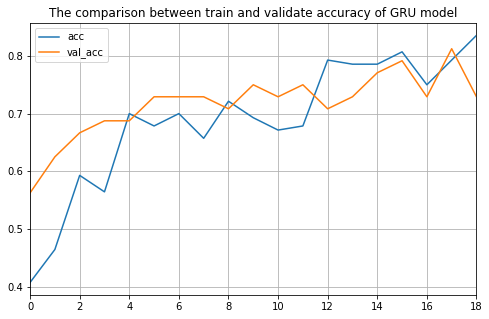

In [85]:
pd.DataFrame(pd.concat([pd.DataFrame(history_gru.history['acc'], columns =['acc']), pd.DataFrame(history_gru.history['val_acc'], columns =['val_acc'])], axis = 1)).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.title('The comparison between train and validate accuracy of GRU model')
plt.show()

<p style="text-indent: 2em;">
    The accuracies of the train and validate set are closed and increased gradually in the same direction shown that the model is a good fit. 

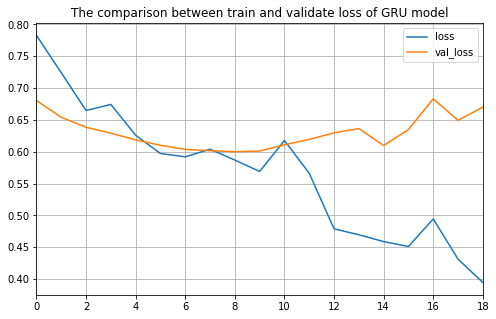

In [86]:
pd.DataFrame(pd.concat([pd.DataFrame(history_gru.history['loss'], columns =['loss']), pd.DataFrame(history_gru.history['val_loss'], columns =['val_loss'])], axis = 1)).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.title('The comparison between train and validate loss of GRU model')
plt.show()

<p style="text-indent: 2em;">
The evaluation cannot account on loss metric because the model applies dropout layer, which occurs only in the train set.

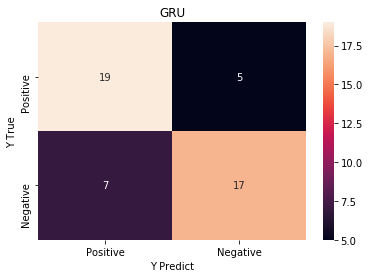

<Figure size 432x288 with 0 Axes>

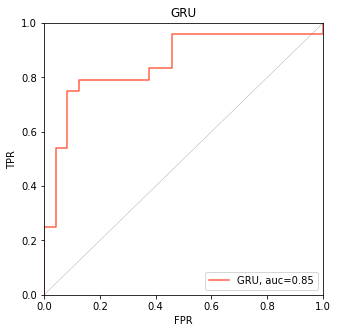

<Figure size 432x288 with 0 Axes>

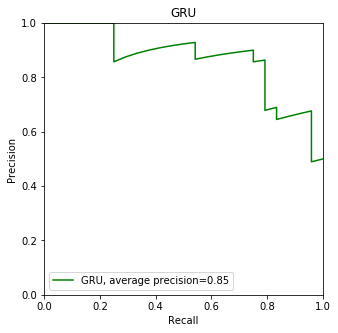

In [87]:
figcm_gru, figroc_gru, figpr_gru = visualize(dic_eva_gru, model_type[0])

In [88]:
print ("The accuracy for train set of GRU model is " + str((round(dic_eva_gru["evaluation factors"]['acc_trn'][1],2))))
print ("The accuracy for test set of GRU model is " + str((round(dic_eva_gru["evaluation factors"]['acc'][1],2))))

The accuracy for train set of GRU model is 0.82
The accuracy for test set of GRU model is 0.75


<p style="text-indent: 2em;">
The high number of train set's accuracy (0.82) indicates that this model is fit for the dataset.
<p>

<p style="text-indent: 2em;">
The high number of test set's accuracy (0.75) indicates that this model is more likely to generalize to other dataset.
<p>

<p style="text-indent: 2em;">
However, the accuracy of both dataset (train and test set) is around 80%. The increasing of sample's number and additional regularization methods may lead to earning higher performance.

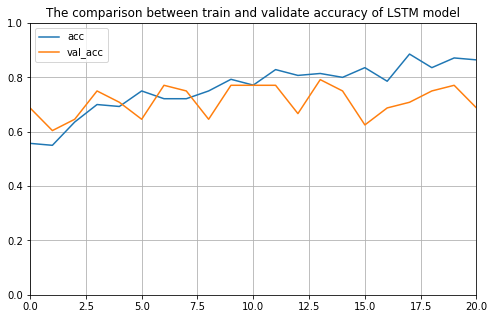

In [89]:
pd.DataFrame(pd.concat([pd.DataFrame(history_lstm.history['acc'], columns =['acc']), pd.DataFrame(history_lstm.history['val_acc'], columns =['val_acc'])], axis = 1)).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('The comparison between train and validate accuracy of LSTM model')
plt.show()

<p style="text-indent: 2em;">
    The accuracies of the train and validate set are closed and increased gradually in the same direction shown that the model is a good fit. 

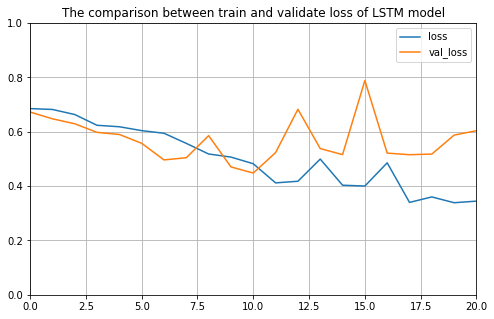

In [91]:
pd.DataFrame(pd.concat([pd.DataFrame(history_lstm.history['loss'], columns =['loss']), pd.DataFrame(history_lstm.history['val_loss'], columns =['val_loss'])], axis = 1)).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('The comparison between train and validate loss of LSTM model')
plt.show()

<p style="text-indent: 2em;">
The evaluation cannot account on loss metric because the model applies dropout layer, which occurs only in the train set.

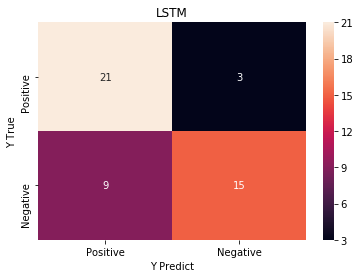

<Figure size 432x288 with 0 Axes>

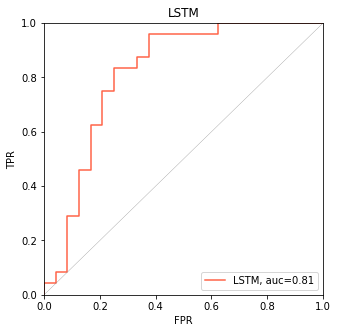

<Figure size 432x288 with 0 Axes>

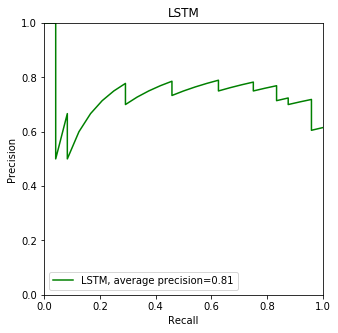

In [92]:
figcm_lstm, figroc_lstm, figpr_lstm = visualize(dic_eva_lstm, model_type[1])

In [93]:
print ("The accuracy for train set of LSTM model is " + str((round(dic_eva_lstm["evaluation factors"]['acc_trn'][1],2))))
print ("The accuracy for test set of LSTM model is " + str((round(dic_eva_lstm["evaluation factors"]['acc'][1],2))))

The accuracy for train set of LSTM model is 0.86
The accuracy for test set of LSTM model is 0.75


<p style="text-indent: 2em;">
The high number of train set's accuracy (0.86) indicates that this model is fit for the dataset.
<p>

<p style="text-indent: 2em;">
The high number of test set's accuracy (0.75) indicates that this model is generalized for other dataset.
<p>

<p style="text-indent: 2em;">
However, the accuracy of both dataset (train and test set) is around 80%. The increasing of sample's number and additional regularization methods may lead to earning higher performance.

<Figure size 432x288 with 0 Axes>

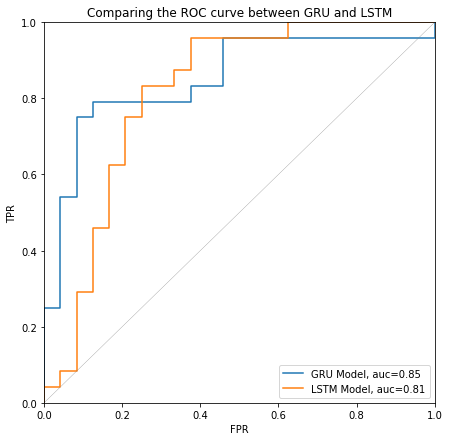

In [94]:
# Comparing the ROC curve 
plt.figure(0).clf() 
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(dic_eva_gru["evaluation factors"]['fpr'],dic_eva_gru["evaluation factors"]['tpr'],label="GRU Model, auc=" + str(round(dic_eva_gru["evaluation factors"]['auc'],2)))
ax.plot(dic_eva_lstm["evaluation factors"]['fpr'],dic_eva_lstm["evaluation factors"]['tpr'],label="LSTM Model, auc=" + str(round(dic_eva_lstm["evaluation factors"]['auc'],2)))
ax.plot(ax.get_ylim(), ax.get_xlim(), color="gray", linewidth=0.3)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("Comparing the ROC curve between GRU and LSTM")
ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=0, top=1)
plt.legend(loc="lower right")

<Figure size 432x288 with 0 Axes>

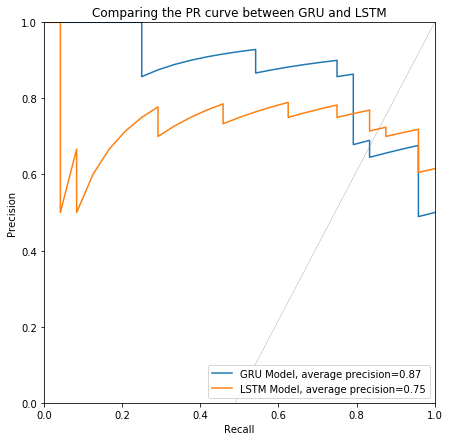

In [95]:
# Comparing the PR curve of Neural network Models
plt.figure(0).clf() 
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(dic_eva_gru["evaluation factors"]['rec'],dic_eva_gru["evaluation factors"]['prec'],label="GRU Model, average precision=" + str(round(dic_eva_gru["evaluation factors"]['ap'],2)))
ax.plot(dic_eva_lstm["evaluation factors"]['rec'],dic_eva_lstm["evaluation factors"]['prec'],label="LSTM Model, average precision=" + str(round(dic_eva_lstm["evaluation factors"]['ap'],2)))
ax.plot(ax.get_ylim(), ax.get_xlim(), color="gray", linewidth=0.3)
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Comparing the PR curve between GRU and LSTM")
ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=0, top=1)
plt.legend(loc="lower right")

<p style="text-indent: 2em;">
    GRU Model provides the highest AUC score (0.85) and AP score (0.87) with 0.75 test accuracy, while LSTM model provides the AUC score (0.81) and AP score (0.75) with 0.75 test accuracy. As a result, the GRU is the best model.

## 9) Analysis of Errors

In [96]:
# create a dataframe of misclassification of GRU model
compare_y_gru = pd.concat([pd.DataFrame(ytst), pd.DataFrame(dic_eva_gru["evaluation factors"]['yhat'])], axis = 1, ignore_index = True)
compare_y_gru.columns = ['y_true', 'y_predict']
compare_y_gru['correctness'] = compare_y_gru['y_true'] == compare_y_gru['y_predict']
compare_y_gru = compare_y_gru[compare_y_gru['correctness'] == False]
compare_y_gru = pd.merge(compare_y_gru, Xtst_raw[['comment', 'en_com', 'finalprep']], left_index = True, right_index = True, how='left')

In [97]:
# create a dataframe of misclassification of LSTM model
compare_y_lstm = pd.concat([pd.DataFrame(ytst), pd.DataFrame(dic_eva_lstm["evaluation factors"]['yhat'])], axis = 1, ignore_index = True)
compare_y_lstm.columns = ['y_true', 'y_predict']
compare_y_lstm['correctness'] = compare_y_lstm['y_true'] == compare_y_lstm['y_predict']
compare_y_lstm = compare_y_lstm[compare_y_lstm['correctness'] == False]
compare_y_lstm = pd.merge(compare_y_lstm, Xtst_raw[['comment', 'en_com', 'finalprep']], left_index = True, right_index = True, how='left')

In [98]:
# create index for the misclassification of both models
temp = list(compare_y_lstm.index) + list(compare_y_gru.index)
temp = list(set([x for x in temp if temp.count(x) > 1]))
temp

[2, 37, 7, 40, 10, 13, 45, 24, 27]

In [99]:
# misclassification cases in both models
pd.concat([pd.DataFrame(ytst, columns =['y_true']).loc[temp], pd.DataFrame(dic_eva_lstm["evaluation factors"]['yhat'], columns =['y_predict']).loc[temp], Xtst_raw[['comment', 'en_com', 'finalprep']].loc[temp]], axis = 1)

,y_true,y_predict,comment,en_com,finalprep
2,0,1,\nนานเกิ๊น\n,Nung Goan,nung goan
37,1,0,\nวันที่ 13-25 นี้ มีการฉีดวัณซีนไข้หวัดใหญ่ คือถ้าเราอยู่ในกลุ่มเสี่ยง ทานยาเพนนิโซโลน นี่เข้าข่ายใช่มั้ยคะ เพราะเป็นที่โรคเกี่ยวกับภูมิคุ้มกัน\n,"The 13th-25th day of this flu vaccine is injected. Is if we are in a risk group Take pills, peninosolone This is right? Because it is an immune disease",13th25th day flu vaccine injected risk group take pills peninosolone right immune disease
7,0,1,\nหาที่จอดรถยากมาก เบื่อที่ใช้แพทย์ฝึกหัดตรวจคนไข้แถมเป็นคนไข้นัดตามตรวจอยู่แล้วทุกสามเดือนแต่กลับไม่รู้อะไรเลย\n,"Find parking very difficult Tired of using a practicing doctor to check the patient and be a check-up patient every three months, but don&#39;t know anything at all?",find parking difficult tired using practicing doctor check patient checkup patient every three months know anything
40,0,1,\nพาย่าไปรักษาที่ ER รพ.รามาธบดีค่ะ แพทย์จะฉีดสี แต่คนไข้ 80 แล้ว เราเลยไม่อยากให้ทำ แต่คนไข้ยังคงต้องรับการรักษาโดยให้ยาฆ่าเชื้ออยู่ นักศึกษาแพทย์พูดว่าในเมื่อคนไข้ไม่รักษาเราก็ไม่จำเป็นต้องรักษา\n,"Paya went to treatment at ER Ramathibodi Hospital. The doctor will inject color but 80 patients. So we don&#39;t want to do it. But patients still have to be treated with disinfectants. Medical students say that when patients do not treat, we do not need treatment.",paya went treatment er ramathibodi hospital doctor inject color 80 patients want patients still treated disinfectants medical students say patients treat need treatment
10,0,1,\nการรักษาถือว่าโอเครนะคร๊ แต่เรื่องที่จอดรถควรปรับปรุงเป้นอย่างมาก เพราะผู้ป่วยมาหาหมอแต่ละทีไม่มีที่จอดรถเลย ในโรงบาลก้อบอกให้จอดได้แต่เจ้าหน้า ตายห่าพอดีแระ คนป่วยรึญาติมาเยี่ยมผู้ป่วยต้องไปรถไว้ปั้มน้ำมันแล้วนั่งแท็กซี่มา แล้วจะมารถส่วนตัวไว้เพื่อ โรงบาลก้อใหญ่ แระ รวย แนะนำนะคร๊ทำที่รถเหมือนในห้างเลยคร๊ ทำหลายๆชั้นเพื่อรองรับคุนหมอ พยาบาลแระเจ้าหน้า ผู้ป่วยไม่ต้องสนใจหรอกคร๊\n,"Treatment is considered okay. But the parking lot should be greatly improved Because the patient came to the doctor each time there was no parking In the hospital Die hard Sick people, relatives come to visit, patients have to go to the car to pump oil and take a taxi And will come to a private car for Large, wealthy hospitals. Recommended to do at the car like in the mall. Do many layers to support the doctor Nursing Officer Patients do not have to pay attention.",treatment considered okay parking lot greatly improved patient came doctor time parking hospital die hard sick people relatives come visit patients go car pump oil take taxi come private car large wealthy hospitals recommended car like mall many layers support doctor nursing officer patients pay attention
13,1,0,\nผิดกับที่คิดไว้คับเจ้าหน้าที่ดีมากชอบป้าคนที่กดบัตรคิวให้จังคับ ใจดีมากกดหลายครั้งไม่ขึ้นก็ไม่มีบ่นเลยคับแถมป้าแกมายืนกดให้คำแนะนำตั้งแต่ตีห้า ไปครั้งหน้าจะเอาขนมไปฝากนะครับ\n,"Wrong with the thought. Very good staff. Like aunt who presses the queue card. Very kind, press many times, no more, no complain Next time, take the candy to leave.",wrong thought good staff like aunt presses queue card kind press many times complain next time take candy leave
45,0,1,\nรู้สึก แย่ ค่ะ\n,Feel bad,feel bad
24,0,1,\nทำฟันฝีมือเยี่ยม คุณหมอ คุณพยาบาลก็มีคุณภาพนี่นา แล้วอะไรที่ไม่ดี แจ้งหัวหน้าเจ้าหน้าทีไปเลยค่ะ\n,"Doing good work, visiting the doctor, the nurse is quality. Then what is bad Inform the chief officer",good work visiting doctor nurse quality bad inform chief officer
27,0,1,\nก็ดีนะดีมากๆ\n,"Good, very good",good good


#### There are six types of errors that occurred in both models
<p>
    
> 1) Unable to translate
<p style="text-indent: 5em;">
    Google API translates the word "นานเกิ๊น" to Nun Goan, which has no meaning instead of "the waiting time very long." 
    
> 2) Sarcastic word
<p style="text-indent: 5em;">
    The models cannot understand the sarcastic word "ก็ดีนะ ดีมากๆ," which is "Good very good." However, the patient who comments speak sarcastically.
    
> 3) Non-negative word
<p style="text-indent: 5em;">
     After text preprocessing, some negation words are removed from the sentence (such as no, not, don't). As a result, the models cannot predict the class precisely when the comment like this case occurring. For example, see in comments index 7, 10, and 40.

> 4) Contain negative word
<p style="text-indent: 5em;">
    In example index 13, it is a positive comment. The word "wrong" is contained in the final preprocessing data. As a result, the model makes a misinterpretation when dealing with a negative word.
    
> 5) Model misclassification
<p style="text-indent: 5em;">
    In example index 45, both models cannot make the right prediction with unknown reason. It may happen by inadequate model complexity. 

> 6) Non-corresponding class
<p style="text-indent: 5em;">
    The example index 24 and 37 are not negative nor positive opinion, which may confuse the model prediction.

In [103]:
# misclassification cases in only LSTM model
compare_y_lstm.loc[list(set(compare_y_lstm.index) - set(temp))]

,y_true,y_predict,correctness,comment,en_com,finalprep
20,0,1,False,\nการวินิจฉันโรคของหมอ เข้าใจว่าหมอเจอคนไข้ที่ป่วยด้วยเป็นโรคมะเร็งและอยู่ในระยะสุดท้ายมาเยอะ ต้องพูดซ้ำแล้วซ้ำอีกทำให้อาจเบื่อที่จะต้องพูดอ้อมโรคกับคนไข้ระยะสุดท้าย แต่ด้วยจรรยาบรรณของหมอก็ไม่ควรพูดเพื่อหยุดการรักษาแล้วบอกว่ารักษาไปก็ไม่หาย ก็ได้ถือว่ารักษาแล้ว ด้วยน้ำเสียงตะคอกและเสียงน้ารำคาญอย่างนั้นกับคนไข้ ควรจะบอกดีๆหรือไม่ก็แจ้งข่าวกับญาติก็ได้ คนไข้ที่รู้ตัวเองมันก็สิ้นหวังพออยู่แล้ว มาเจอหมอพูดแบบนี้จะทำให้คนไข้อยู่ต่อด้วยความสิ้นหวัง คุณชั่งเป็นหมอที่ไร้ความเมตตาเสียจริงๆ ควรปรับปรุงด้านการใช้วาทะในการพูดกับคนไข้เป็นอย่างมาก\n,"Winning my doctor&#39;s disease Understood that the doctor had found a patient with cancer and was in the final stage Having to repeat again and again, may be tired of having to talk about the disease to the end-patient But with the doctor&#39;s ethics, he should not speak to stop the treatment and say that treatment is not healed. Was considered to be treated With a shouting tone and an annoying sound like that to the patient Should tell you well or inform the relatives The patient who knew it was hopeless enough. Come to see the doctor, say this to make the patient stay in despair Khun Chung is a really merciless doctor. Should improve the use of words in speaking to patients very much",winning doctors disease understood doctor found patient cancer final stage repeat may tired talk disease endpatient doctors ethics speak stop treatment say treatment healed considered treated shouting tone annoying sound like patient tell well inform relatives patient knew hopeless enough come see doctor say make patient stay despair khun chung really merciless doctor improve use words speaking patients much
21,0,1,False,\nมาถึงคนแรกตกใจ!เลย ใบคิวเสียบไว้เป็นหลายสิบ\n,"Arrived, the first person was shocked! The queue is inserted into dozens.",arrived first person shocked queue inserted dozens
22,1,0,False,\nส่วนที่ไปทำการรักษาคือแผนกจิตเวช โดยรวมแล้วระบบของที่นี่ก่อนหน้านี้ค่อนข้างน่าสับสน แต่ระยะหลังศิริราชปรับให้เป็นระเบียบและเข้าใจง่ายขึ้นมาก การนำเทคโนโลยีเข้ามาปรับปรุงเพื่อแก้ไขปัญหาคนแน่นอย่างบันไดเลื่อนและแบ่งพาร์ตโรงพยาบาลให้มีส่วนที่ให้บริการคล้ายเอกชน ทำให้ประทับใจเรื่องของตัวเลือกในการเข้าถึง(ถึงแม้ส่วนนี้จะดูเป็นการให้บริการแบบต่างมาตรฐาน แต่พอทำความเข้าใจได้เมื่อพิจารณาค่าครองชีพและคุณภาพชีวิตอื่นๆของคนไทย) หน่วยจิตเวชมีการให้บริการดีและเจ้าหน้าที่ทั้งแพทย์และพยาบาลเป็นมิตร การใช้ท่าทาง ภาษากาย และสีหน้าที่ไม่ทำให้ผู้รับบริการรู้สึกอึดอัด ในส่วนของการรับยา เกิดปัญหาขึ้นค่อนข้างบ่อย การส่งใบยาไปไม่ถึง ลืมส่งใบยา การให้บริการของเจ้าหน้าที่ที่บางครั้งมีการเสียมารยาท (โดยรวมไม่ต้องการให้คะแนนน้อย เมื่อปัญหาใหญ่คือทางเลือกด้านสาธารณสุขในประเทศไม่ได้มีมากพอ ฉันจึงมองว่า ปัญหาการจัดการของรัฐต่างหากที่ทำให้โรงพยาบาลรัฐที่มีคุณภาพอย่างศิริราชต้องมาแบกรับมากกว่าโรงพยาบาลอื่นๆ)\n,"The treatment section is the psychiatric department. Overall, the system here before is quite confusing. But after Siriraj adjusted to be more organized and easier to understand Adopting technology to improve the problem of people like escalators and partitioning hospitals to have services that are similar to private ones. Impressed with the accessibility options (although this section looks like a standardized service But understandable when considering the cost of living and other quality of life of Thai people In the case of receiving drugs Problems occur quite often. The delivery of the drug is not to forget the delivery of the drug, the service of the staff, sometimes with bad manners. (Overall, not wanting to give a low rating When the big problem is that there are not enough public health options in the country, I think that the state&#39;s management problems that make quality public hospitals like Siriraj have to bear more than other hospitals)",treatment section psychiatric department overall system quite confusing siriraj adjusted organized easier understand adopting technology improve problem people like escalators partitioning hospitals services simi

#### There are two additional types of errors that occurred in LSTM model
<p>
    
> 1) Complexity of sentence
<p style="text-indent: 5em;">
    The example index 22 contains both positive and negative opinions which lead to confusing the model, especially when the model was trained by small dataset like this study.
    
> 2) Model misclassification
<p style="text-indent: 5em;">
    The example index 20 and 21 are misclassification that might happen from inadequate model complexity.

In [104]:
# misclassification cases in only GRU model
compare_y_gru.loc[list(set(compare_y_gru.index) - set(temp))]

,y_true,y_predict,correctness,comment,en_com,finalprep
0,1,0,False,\nฉันต้องไปตรวจร่างกายที่นี่ทุกๆ3 เดือนเป็น รพ.รัฐบาลที่ดูแลคนป่วยได้ดีที่สุดขอบคุณคุณหมอทุกๆท่านค่ะ\n,I have to go to the physical examination here every 3 months. It is the government hospital that takes care of the sick most. Thank you to every doctor.,go physical examination every 3 months government hospital takes care sick thank every doctor
11,1,0,False,\nได้มีโอกาสไปพบหมอมา 2 คลินิก คือ คลินิกผิวหนัง กับคลินิกนารีเวช ประทับใจทุกขั้นตอนการบริการของบุคลากรที่นี่มากๆค่ะ ไม่ว่าจะถาม หรือสงสัย ในส่วนใหน บุคลากรทุกท่านตอบด้วยความเต็มใจ ยิ้มแย้ม ยิ่งหมอนี่ประทับใจมาก ตรวจละเอียด ถามจนกว่าจะแน่ใจว่าคนไข้เป็นอะไรมา ไม่ใช่ถามแบบรีบถามรีบสรุป เหมือนหลายๆโรงพยาบาลที่เคยไปมา คือเข้าพบหมอประมาณเกือบๆครึ่งชั่วโมงเลยค่ะ นั่งซักถามอาการของเราอย่างละเอียด เพิ่งจะเคยเจอที่นี่แหละค่ะ ที่หมอคุยกับคนไข้นานๆ เจอที่ รพ.ประจำที่เคยไป 5 นาที ออกละ หมอรีบไปใหน \n,"Have a chance to see the doctor come 2 clinic is a skin clinic. With Naree Vej Clinic Impressed with every step of the service of the personnel here. Regardless of whether or not you have any questions or concerns, all personnel are willing to answer, smiling, even more. Not asking in a hurry. Like many hospitals that have been in Is about to see the doctor for almost half an hour Sit and ask our symptoms thoroughly. I&#39;ve just met here. The doctor talked to the patient for a long time. Found at the regular hospital that had been 5 minutes away. The doctor hurried to",chance see doctor come 2 clinic skin clinic naree vej clinic impressed every step service personnel regardless whether questions concerns personnel willing answer smiling even asking hurry like many hospitals see doctor almost half hour sit ask symptoms thoroughly I met doctor talked patient long time found regular hospital 5 minutes away doctor hurried
14,1,0,False,\nเคยไปผ่าตัดที่โรงพยาบาลนี้เขารักษาดูแลดีมากทั้งหมอสถาบันประสาทและรพ.นี้ช่วยกันดูแลหนูเป็นอย่างดีเลยตอนผ่าตัดมาผ่าที่รามาตอนรักษารักษาที่สถาบันประสาทมันอยู่ติดกันและตอนนี้ก็ไม่มีอาการแล้วหายแล้วแม่ก็ไปผ่าต้อที่รามาหมอฝีมือดีมากค่ะที่นี้เพื่อนก็มีโรคประจำตัวเขาเป็นไรไม่รู้แต่กินเท่าไหล่ก็ไม่อ้วนมีแต่กระตูกก็มาที่รามาหมอก็ให้คำปรึกษาอย่างดีเขาก็ดีขึ้นหุ่นเริ่มมีน้ำมีนวลขึ้นไม่เห็นกระดูกเหมือนเมื่อก่อนแล้วที่นี้ดีไม่มีคำว่าเลี้ยงไข้เคยไปมารพ.นึงก่อนจะมารักษาที่สถาบันประสาทและได้มาผ่าตัดที่นี้โดนเลี้ยงไข้มา3ปี\n,"Used to have surgery at this hospital, he maintained very well, both doctors, neuroscience institutions and this hospital helped to take care of the mice as well. The symptoms then disappeared and the mother went to work at Ramama. The doctor is very skilled. At this point, his friends have their own diseases. Well, he&#39;s better For 3 years",used surgery hospital maintained well doctors neuroscience institutions hospital helped take care mice well symptoms disappeared mother went work ramama doctor skilled point friends diseases well better 3 years


#### There are two additional types of errors that occurred in GRU model
<p>
    
> 1) Translation error
<p style="text-indent: 5em;">
    According to the example index 0, the Google API fails to translate the word "ดูแลผู้ป่วยได้ดีที่สุด" into "takes care of the sick most," instead of "The best on taking care patient." As a result, the word "sick" is likely to be a negative sentiment.
    
> 2) Complexity of sentence
<p style="text-indent: 5em;">
    The examples index 11 and 14 contain both positive and negative opinions which lead to confusing the model, especially when the model was trained by small dataset like this study.

## 10) Word Cloud

In [105]:
def Wcloud(df, name):

    df.loc[df['score'] < 3, 'sentiment'] = 0
    df.loc[df['score'] == 3, 'sentiment'] = 'nan'
    df.loc[df['score'] > 3, 'sentiment'] = 1
    df = df[df['sentiment'] != 'nan']
    df2 = df.drop(columns = ['score', 'sentiment'])
    y = df.iloc[:,3]
    y = y.astype(int).values
    
    # preprocessing
    X = prep(df2)

    # pad sequences
    tokenizer = Tokenizer(num_words = max_features, split = ' ')
    tokenizer.fit_on_texts(X)
    Xpad = tokenizer.texts_to_sequences(X)
    Xpad = pad_sequences(Xpad, maxlen=max_length)


    # Noun Phrase Chunking
    extractor = ConllExtractor()
    Xbest = pd.DataFrame(X.apply(lambda x: TextBlob(x,np_extractor=extractor).noun_phrases))
    Xbest['yhat'] = history_gru.model.predict_classes(Xpad)
    # separate noun pharse by class
    tagneg = Xbest[Xbest['yhat'] == 0]
    tagpos = Xbest[Xbest['yhat'] == 1]
    # remove list of list
    NP_neg = (sum(tagneg['finalprep'], []))
    NP_pos = (sum(tagpos['finalprep'], []))
    
    word_freq_neg = Counter(NP_neg)
    word_freq_pos = Counter(NP_pos)


    sorted_freq_neg = sorted(word_freq_neg.items(), key = lambda kv: kv[1], reverse=True)
    toptenneg = (sorted_freq_neg[:10])
    
    wordcloud_neg = WordCloud(width = 2000,
                               height = 1200,
                               background_color = 'black',
                               max_words=10).fit_words(word_freq_neg)
    figneg = plt.imshow(wordcloud_neg)
    plt.imshow(wordcloud_neg)
    plt.title('Word Cloud of negative aspect of '+ name +' Hospital', fontsize=14)
    plt.axis('off')
    plt.show()
    
    sorted_freq_pos = sorted(word_freq_pos.items(), key = lambda kv: kv[1], reverse=True)
    toptenpos = (sorted_freq_pos[:10])
    
    wordcloud_pos = WordCloud(width = 2000,
                               height = 1200,
                               background_color = 'black',
                               max_words=10).fit_words(word_freq_pos)
    figpos = plt.imshow(wordcloud_pos)
    plt.imshow(wordcloud_pos)
    plt.title('Word Cloud of positive aspect of '+ name +' Hospital', fontsize=14)
    plt.axis('off')
    plt.show()
    return toptenneg, toptenpos, figneg, figpos

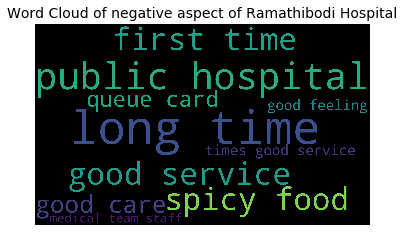

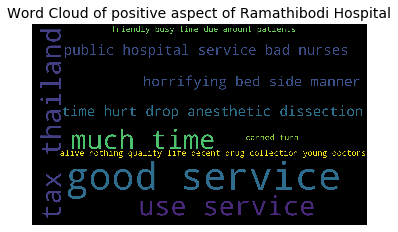

In [106]:
toptenneg_rama, toptenpos_rama, figneg_rama, figpos_rama = Wcloud(rama, 'Ramathibodi')

In [107]:
# top 10 negative words
toptenneg_rama

[('long time', 4),
 ('public hospital', 3),
 ('good service', 2),
 ('spicy food', 2),
 ('first time', 2),
 ('good care', 2),
 ('queue card', 2),
 ('times good service', 2),
 ('good feeling', 2),
 ('medical team staff', 2)]

In [108]:
# top 10 positive words
toptenpos_rama

[('good service', 5),
 ('much time', 2),
 ('tax thailand', 2),
 ('use service', 2),
 ('time hurt drop anesthetic dissection', 1),
 ('public hospital service bad nurses', 1),
 ('horrifying bed side manner', 1),
 ('alive nothing quality life decent drug collection young doctors', 1),
 ('friendly busy time due amount patients', 1),
 ('canned tuna', 1)]

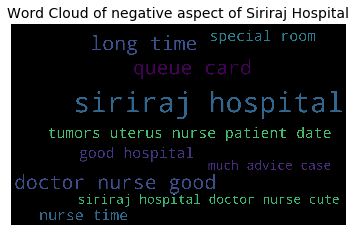

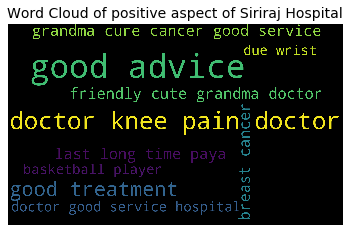

In [109]:
toptenneg_siri, toptenpos_siri, figneg_siri, figpos_siri = Wcloud(siri, 'Siriraj')

In [110]:
# top 10 negative words
toptenneg_siri

[('siriraj hospital', 5),
 ('doctor nurse good', 2),
 ('long time', 2),
 ('queue card', 2),
 ('good hospital', 1),
 ('tumors uterus nurse patient date', 1),
 ('special room', 1),
 ('nurse time', 1),
 ('siriraj hospital doctor nurse cute', 1),
 ('much advice case', 1)]

In [111]:
# top 10 positive words
toptenpos_siri

[('good advice', 4),
 ('doctor knee pain doctor', 3),
 ('good treatment', 2),
 ('grandma cure cancer good service', 1),
 ('friendly cute grandma doctor', 1),
 ('breast cancer', 1),
 ('last long time paya', 1),
 ('doctor good service hospital', 1),
 ('due wrist', 1),
 ('basketball player', 1)]

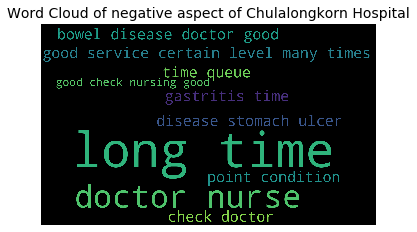

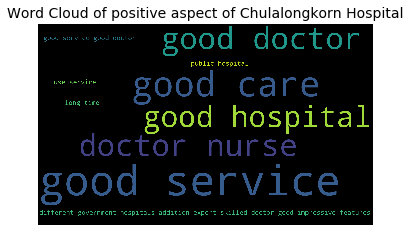

In [112]:
toptenneg_chula, toptenpos_chula, figneg_chula, figpos_chula = Wcloud(chula, 'Chulalongkorn')

In [113]:
# top 10 negative words
toptenneg_chula

[('long time', 10),
 ('doctor nurse', 3),
 ('good service certain level many times', 2),
 ('time queue', 2),
 ('disease stomach ulcer', 2),
 ('gastritis time', 2),
 ('check doctor', 2),
 ('bowel disease doctor good', 2),
 ('point condition', 2),
 ('good check nursing good', 2)]

In [114]:
# top 10 positive words
toptenpos_chula

[('good service', 6),
 ('good care', 4),
 ('doctor nurse', 3),
 ('good doctor', 3),
 ('good hospital', 3),
 ('different government hospitals addition expert skilled doctor good impressive features',
  2),
 ('use service', 2),
 ('long time', 2),
 ('good service good doctor', 2),
 ('public hospital', 2)]

## 11) Conclusions, Suggestions, and Limitations

#### Conclusions
<p style="text-indent: 2.5em;">
    The study aims to understand about patient's voice from three university hospitals in Thailand and provides the recommendation to improve hospital services and operations quality. The patient's comments on social media are retrieved, then summarize into two groups, positive, and negative sentiments. The patient's comments are feed to the preprocessing method then vectorization in order to feed to the deep learning model. The deep learning approach, sequence modeling, which include GRU and LSTM model, are used to create models to predict the patient's opinion.
<p style="text-indent: 2.5em;">
    The GRU model performs better than LSTM model when using evaluation matrices such as AUC (GRU 0.83 : LSTM 0.79), AP (GRU 0.84 : LSTM 0.73), but the accuracy of both models are the same (0.73). However, the GRU model is more likely to overfit model due to the high number of validating loss compare to trainIng loss. As a result, the LSTM model is the best and has more generalization when applying the model with another dataset. 
    
<p>
<p>

#### Suggestions
<p style="text-indent: 2.5em;">
    The suggestion for the hospital business improvement can be acquired from more often negative comments. In general, all three hospitals sentiment analysis contain negative noun phrase "long time". Firstly, there are some correlations between the words that express to the queuing services such as "queue card" and "time queue" with the noun phrase "long time". The improving of healthcare services queuing system should be considered. For example, the application that alerts to the patient's device about their queuing status. This can alleviate the patient's uncomfortable emotion when they have to wait for long, or they can do personal business while waiting for their queue. This could improve their experience during their visit to the hospital. Secondly, increasing the efficiency of the workflow by reducing the workload of healthcare workers (both clinical and non-clinical staffs). For example, adoption of the Computerized Provider Order Entry (CPOE) system instead of using the paper-based system to reduce duplication tasks (doctor write the patient history and drug/lab prescription then other staff entry them into the electronic healthcare service systems). Lastly, requesting the use of data in Personal Identifiers (PID) card. At the patient registration unit, the registration form is distributed to the patient to fulfill the form (with their hand-writing) then sent to the staff to entry such information into the patient registration database. Requesting the Ministry of Interior for the use of data in Personal Identifiers (PID) card (patient demographic data) to fill up registration form automatically could prevent redundant work and unnecessary duplication of the tasks.
    

<p style="text-indent: 2.5em;">
    For Ramathibodi hospital, the noun phrase that appears most in negative sentiment is "long time" (about four times), this indicates that the Ramathibodi hospital healthcare services are bad in waiting time management. In addition, the noun phrase "first times" appears about two times. This indicates that patient who comes to visit Ramathibodi hospital first time is not appreciated for the service for example "Is the first time Come to get medicine for relatives in other provinces Come to contact from 1 pm straight Now still sitting and waiting" and "Nurses say badly, barbaric, do like us, not people, we used to go for the first time, don't know what to ask, do not speak well.". These indicate that the hospital staffs (include both healthcare professionals and non-health background workers) have to improve communication and service skills to enhance customer impression.

<p style="text-indent: 2.5em;">
    For Siriraj hospital, the noun phrase "Siriraj hospital" appears most (about five times). This keyword does not useful to tell much about the weakness of Siriraj hospital healthcare services because the number of negative comments of Siriraj hospital is too low (about six samples) and the data preprocessing process doesn't remove the hospital name. However,  the noun phrase "long time" appears about two times. For example, "Service is slow, long queue, clear, low time Pay attention to improve the service" This indicates that Siriraj hospitals should improve the waiting time of service to increase the patient's experience when they come to receive the services.

<p style="text-indent: 2.5em;">
    Lastly, the Chulalongkorn hospital, which is also "long time" phrase. It appears about ten times. For example, "It takes a long time in every point of contact", "Very bad .. The patient waited very long .. The system is delayed ... How many times is the same .. If paid by yourself .. call very fast .. if free .. wait very long", and "Waiting for a long time !!". These indicate that Chulalongkorn hospital healthcare service system is not good enough in making the patient wait for a long time. Notably, the patient who is under universal health services scheme which gets free of charge for the service. 
    
<p style="text-indent: 2.5em;">    
    These are a fact that happen in all public, but there is no clear evidence to confirm these situations. Using sentiment analysis from online data can be used as explicit evidence to show the hospital's manager for planning the action plan to improve the quality of healthcare services and improve the patient impression.
   
<p>
<p>
    
#### Limitations   
<p style="text-indent: 2.5em;">
    There are some limitations in this study. Firstly, the small number of sample and single data source, the training data set contains only 140 comments which derive from only www.honestdocs.co website. These affect the model performance and the model generalization when applying with other data sources. Secondly, the language translation error, in this study, the author uses Google Cloud API to translate comment in Thai to English. The mistranslation may occur during this phase. The model performance will increase greatly if using NLP tools that compatible with Thai language to perform the data preprocessing before vectorization and feed into the deep learning model. Lastly, the performance of the author laptop is not good enough to build the large and complex deep learning model. This lead to a low quality of hyperparameter tunning process. It can not perform fine-tune hyperparameter with a wide range and a high number of hyperparameter. The use of cloud computing instead of a personal computer is a solution for this study and other future work.